In [1]:
!pip install h2o

  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=c8011749fd66407cddfbf3e98d0aff84d1218fa56b69b0b61ca9336519ded4c3
  Stored in directory: c:\users\sri\appdata\local\pip\cache\wheels\f7\74\3d\645d819eab17de3e8158807b48d75ffff86f58a3ec8a89c66c
Successfully built h2o


In [1]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 18.0.2+9-61, mixed mode, sharing)
  Starting server from C:\Users\sri\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\sri\AppData\Local\Temp\tmp1elh_4a1
  JVM stdout: C:\Users\sri\AppData\Local\Temp\tmp1elh_4a1\h2o_sri_started_from_python.out
  JVM stderr: C:\Users\sri\AppData\Local\Temp\tmp1elh_4a1\h2o_sri_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.4
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_sri_896tfa
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    990 Mb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.8 final
--------------------------  -----------------------------

### importing data

In [4]:
day = h2o.import_file("day.csv")

hour = h2o.import_file("hour.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
#target column

y = "cnt"

### Split into train & test

In [6]:
# splitting day dataset
splits_day = day.split_frame(ratios = [0.8], seed = 1)
train_day = splits_day[0]
test_day = splits_day[1]

#splitting hour dataset
splits_hour = day.split_frame(ratios = [0.8], seed = 1)
train_hour = splits_hour[0]
test_hour = splits_hour[1]

### testing models on Day dataset

#### model 1

In [7]:
# Run AutoML for 10 minutes
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(y=y, training_frame=train_day)

AutoML progress: |
12:00:47.154: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

12:10:51.265: GBM_lr_annealing_selection_AutoML_1_20220907_120046 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_1_20220907_120046

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1460.2194126026566
RMSE: 38.21281738635162
MAE: 26.05261432210439
RMSLE: 0.11424117207019883
R^2: 0.9996161200528048
Mean Residual Deviance: 1460.2194126026566
Null degrees of freedom: 581
Residual degrees of freedom: 578
Null deviance: 2213837175.773192
Residual deviance: 849847.6981347462
AIC: 5902.295488511342

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation d

mean            sd    cv_1_valid  \
0                     mae  7.187669e+01  4.969530e+00  7.614853e+01   
1  mean_residual_deviance  1.279381e+04  3.463693e+03  1.775967e+04   
2                     mse  1.279381e+04  3.463693e+03  1.775967e+04   
3           null_deviance  4.438386e+08  4.686818e+07  5.185790e+08   
4                      r2  9.966537e-01  6.533163e-04  9.958888e-01   
5       residual_deviance  1.495290e+06  4.388468e+05  2.131160e+06   
6                    rmse  1.122937e+02  1.516332e+01  1.332654e+02   
7                   rmsle  8.636472e-02  1.218559e-01  4.245856e-02   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  7.057756e+01  6.533833e+01  6.980326e+01  7.751577e+01  
1  1.281228e+04  9.813570e+03  9.297920e+03  1.428563e+04  
2  1.281228e+04  9.813570e+03  9.297920e+03  1.428563e+04  
3  4.447762e+08  3.909163e+08  4.240999e+08  4.408214e+08  
4  9.963971e-01  9.972227e-01  9.974412e-01  9.963185e-01  
5  1.601535e+06  1.079493e+06  1.078559e+06  1.585705e+06  
6  1.131913e+02  9.906347e+01  9.642573e+01  1.195225e+02  
7  2.986348e-02  2.148872e-02  3.408593e-02  3.039269e-01

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220907_120046 113.442 12869 71.7478 0.136026 12869 135 0.038672 StackedEnsemble 
 GBM_grid_1_AutoML_1_20220907_120046_model_170 116.614 13598.9 72.5635 0.135252 13598.9 476 0.022915 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_119 118.467 14034.3 72.1934 0.133282 14034.3 473 0.024988 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_144 119.997 14399.2 75.3739 0.134049 14399.2 515 0.02895 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_160 125.164 15666 76.854 0.130777 15666 442 0.024674 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_199 128.715 16567.5 80.6804 0.152363 16567.5 504 0.033355 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_130 128.745 16575.2 87.5051 0.141222 16575.2 252 0.018221 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_12 129.436 16753.7 81.1774 0.14207 16753.7 362 0.023858 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_58 129.673 16815.1 82.1813 0.136208 16815.1 1152 0.038154 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_32 134.593 18115.3 85.4334 0.155214 18115.3 448 0.033173 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_42 135.066 18242.9 90.5244 0.152135 18242.9 352 0.024331 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_112 135.286 18302.3 86.8393 0.16457 18302.3 388 0.027562 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_98 136.104 18524.4 88.0104 0.155452 18524.4 534 0.032005 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_181 137.609 18936.2 84.6463 0.157829 18936.2 371 0.023087 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_135 139.291 19401.9 89.6327 0.160469 19401.9 433 0.028824 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_120 139.333 19413.8 86.556 0.142031 19413.8 341 0.01906 GBM 
 GBM_grid_1_AutoML_1_20220907_120046_model_5 140.643 19780.4 88.0981 0.145773 19780.4 433 0.022479 GBM 
 StackedEnsemble_AllModels_1_AutoML_1_20220907_120046 141.617 20055.3 90.5924 0.17251 20055.3 271 0.056235 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220907_120046 142.201 20221.2 91.5813 0.171904 20221.2 279 0.031954 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220907_120046 142.254 20236.1 91.2729 0.172245 20236.1 291 0.057263 StackedEnsemble

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

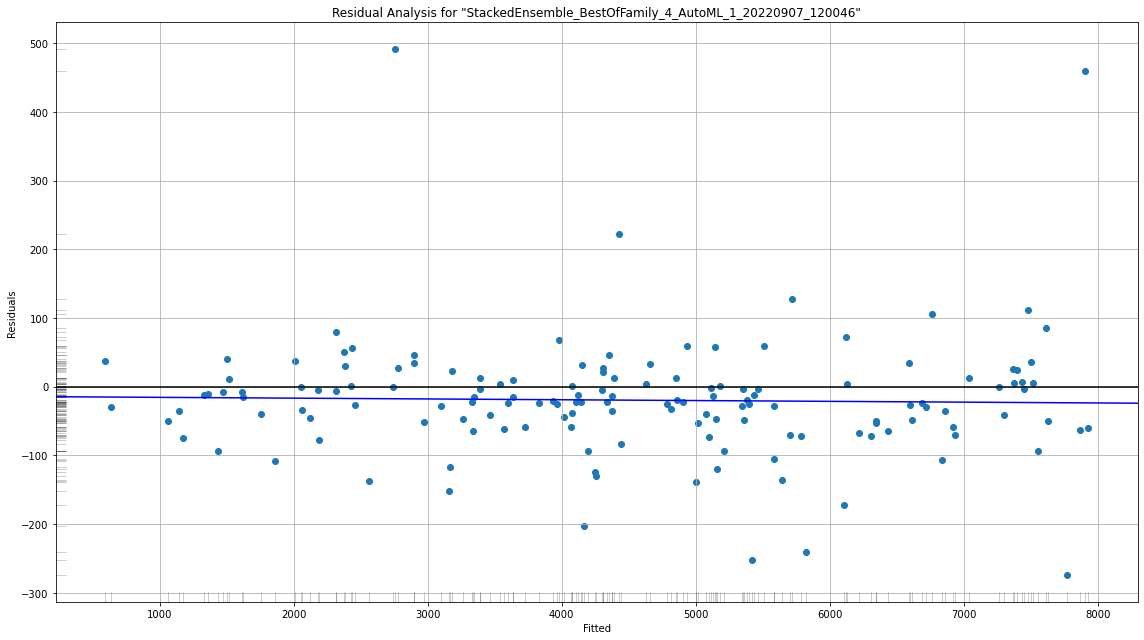

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

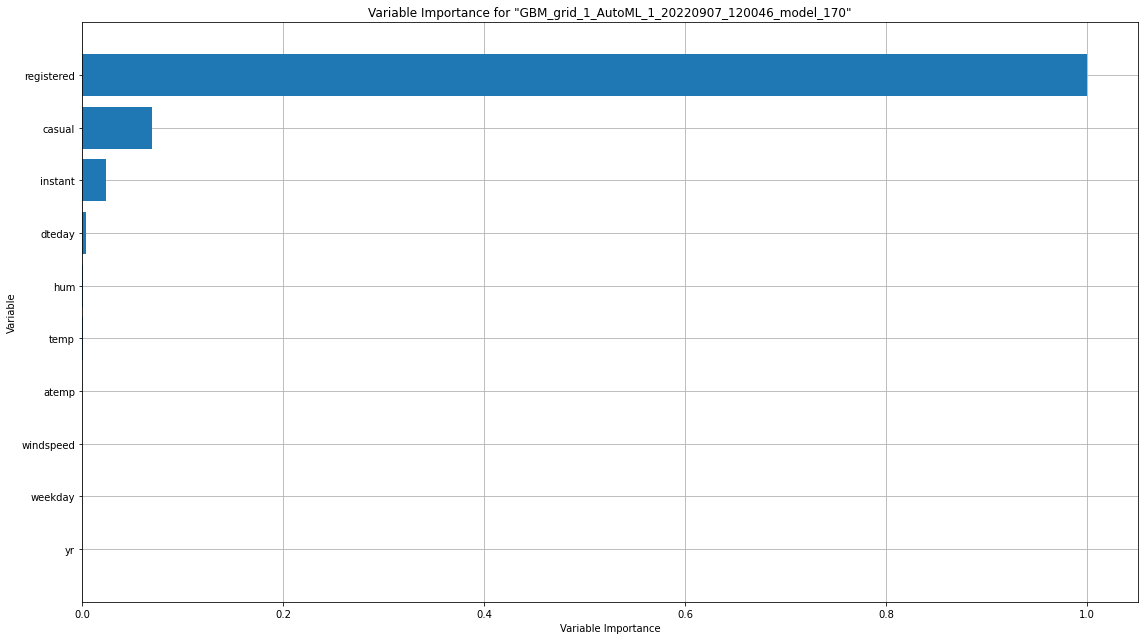

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

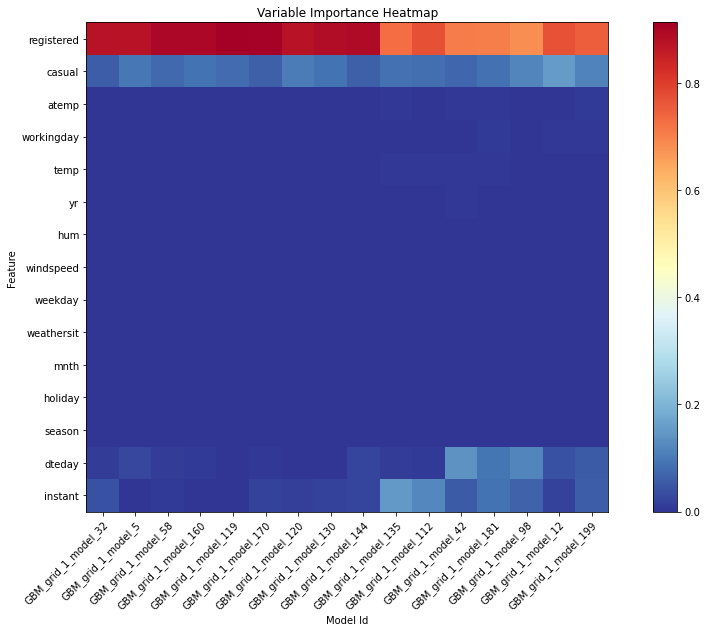

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

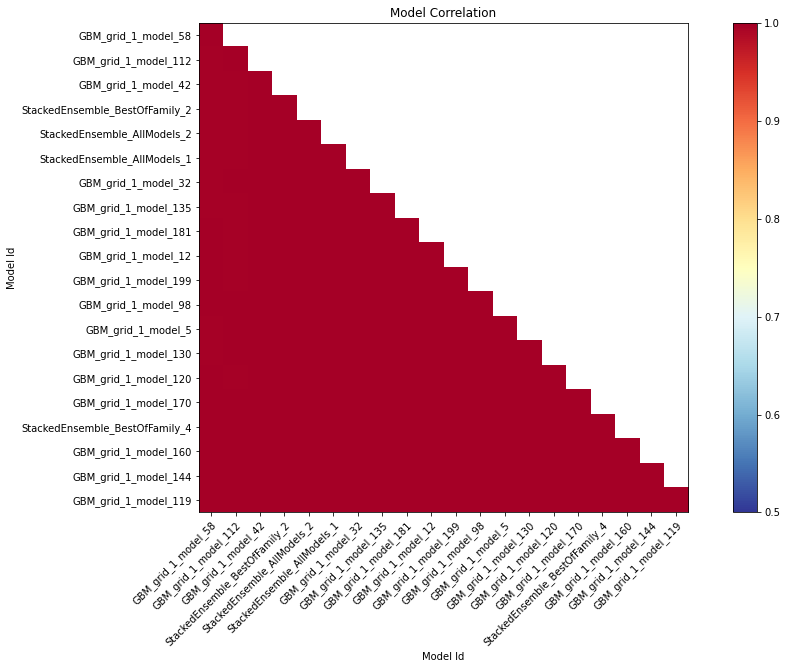

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

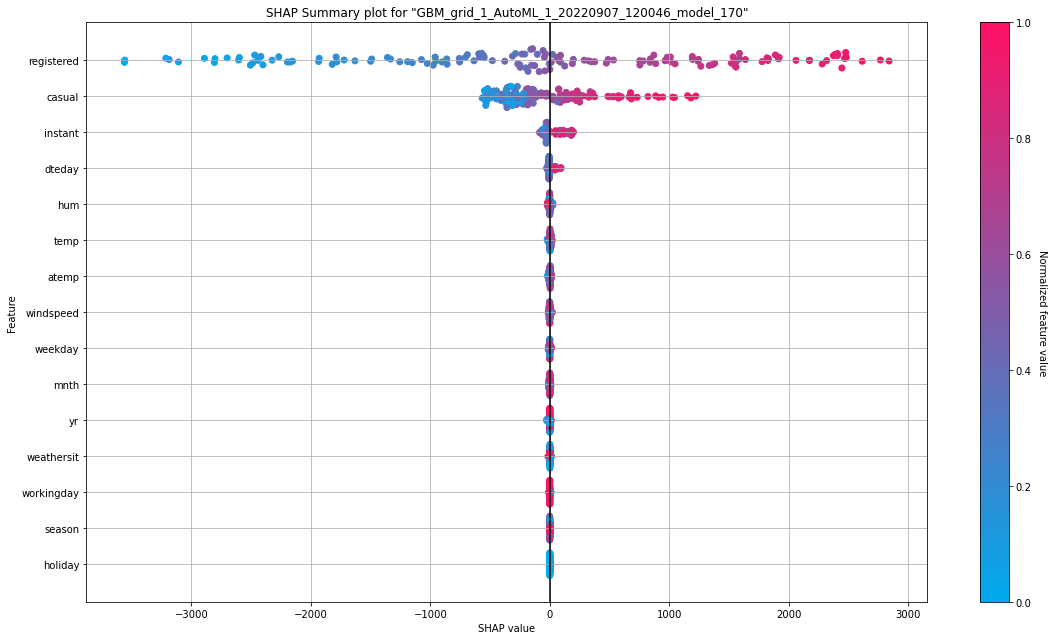

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

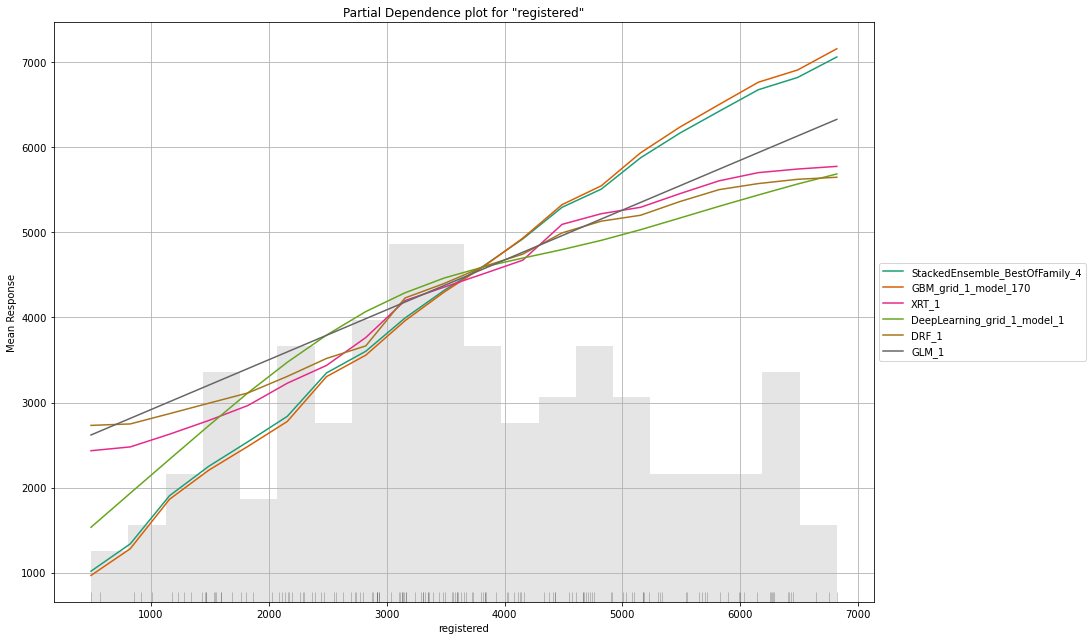

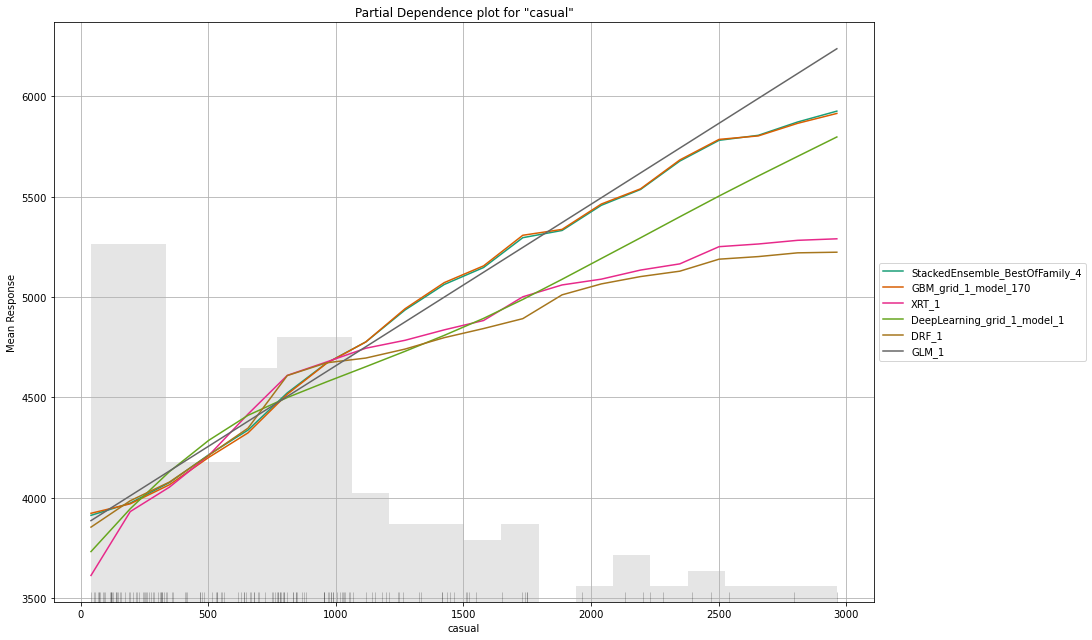

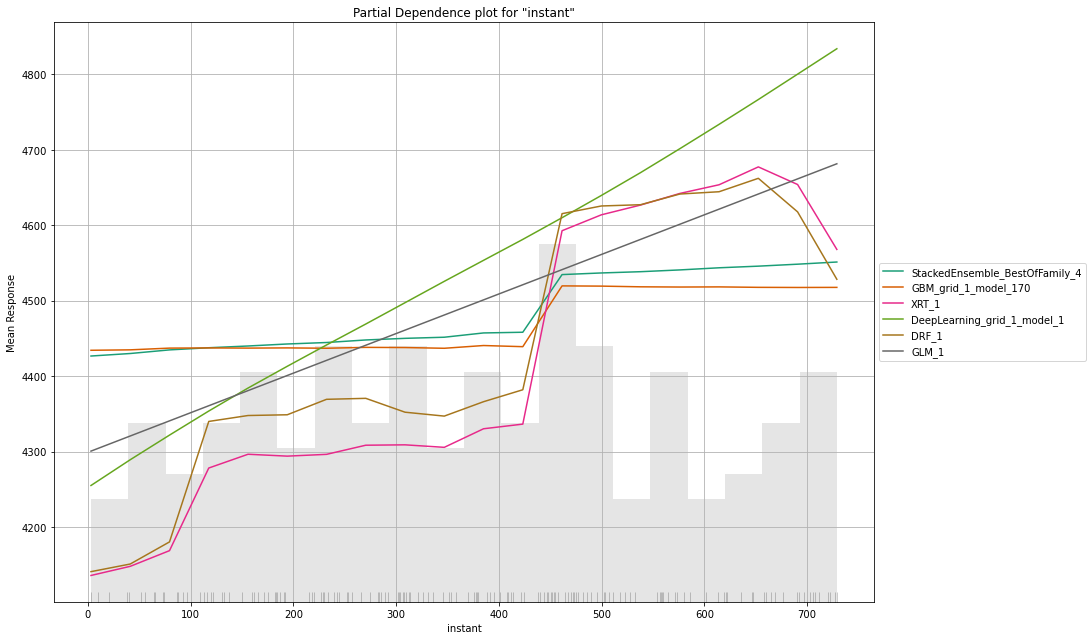

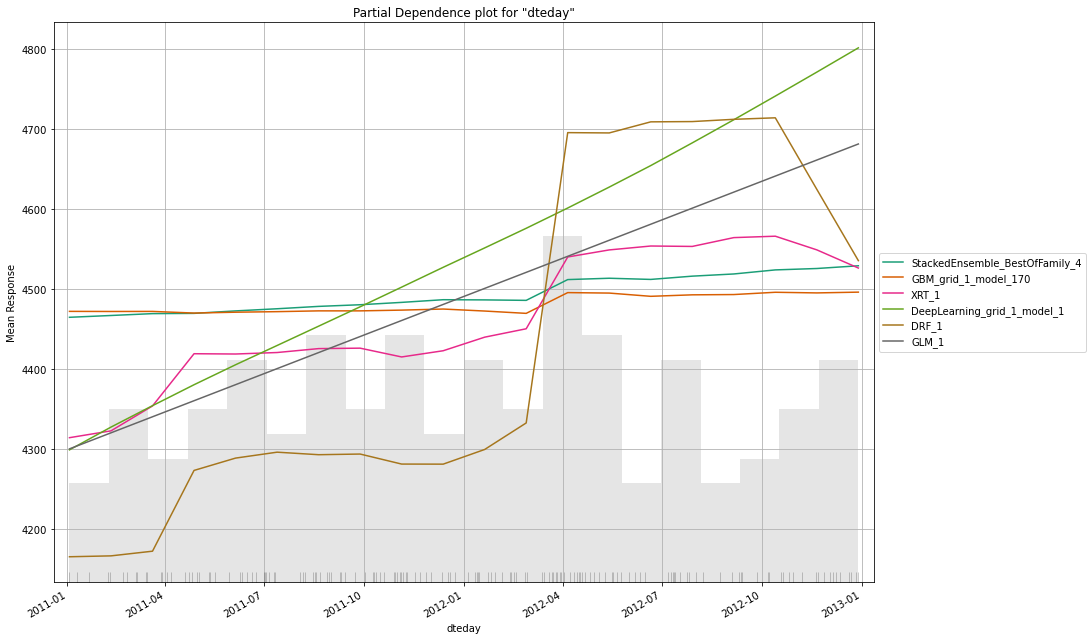

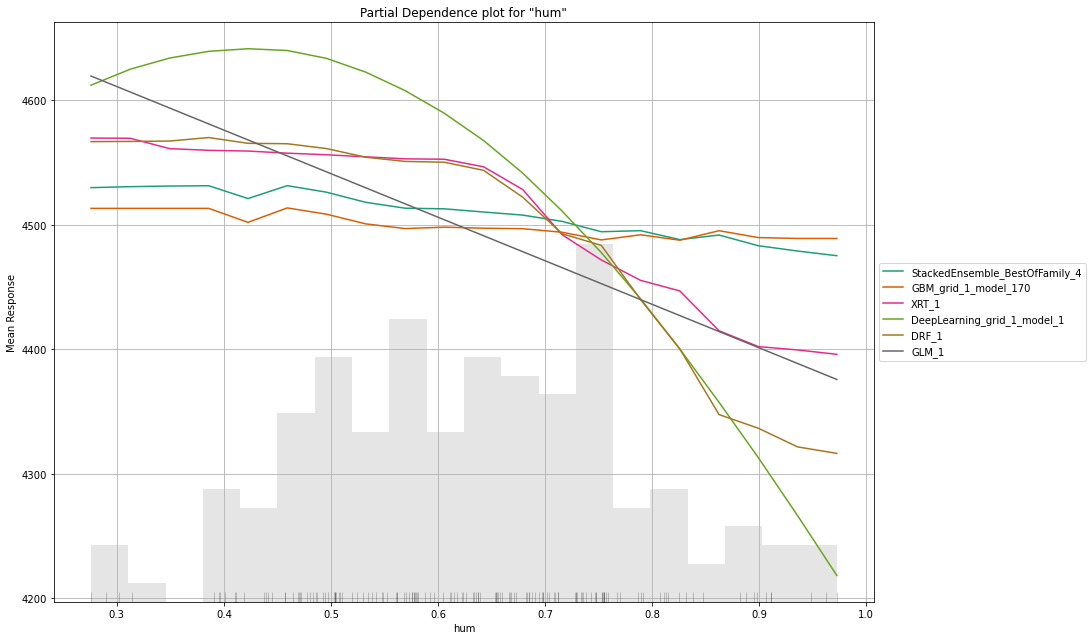

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

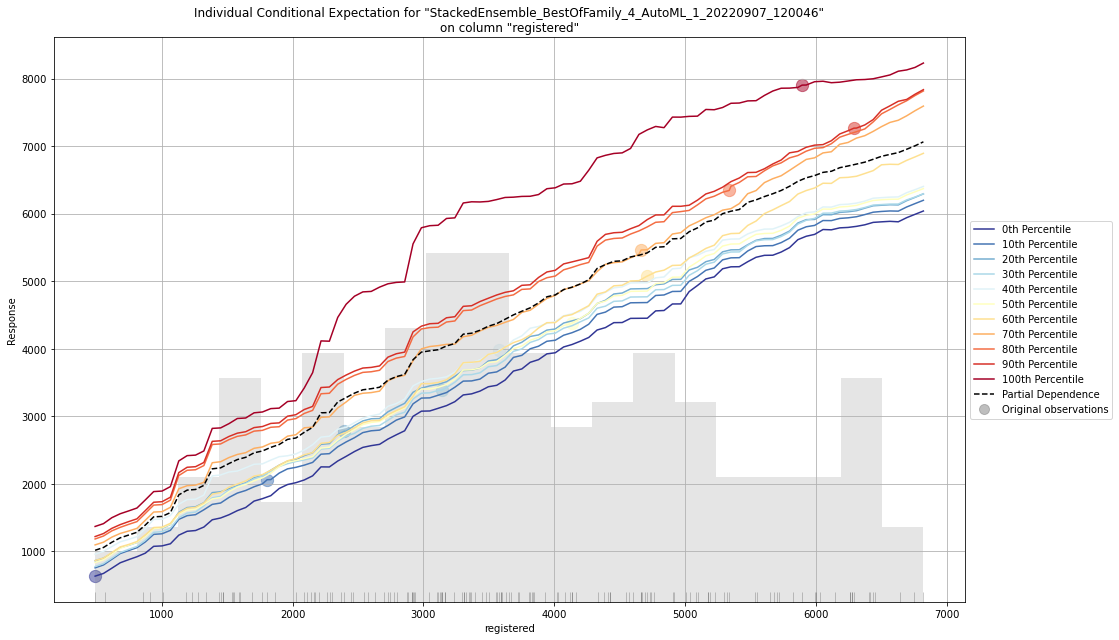

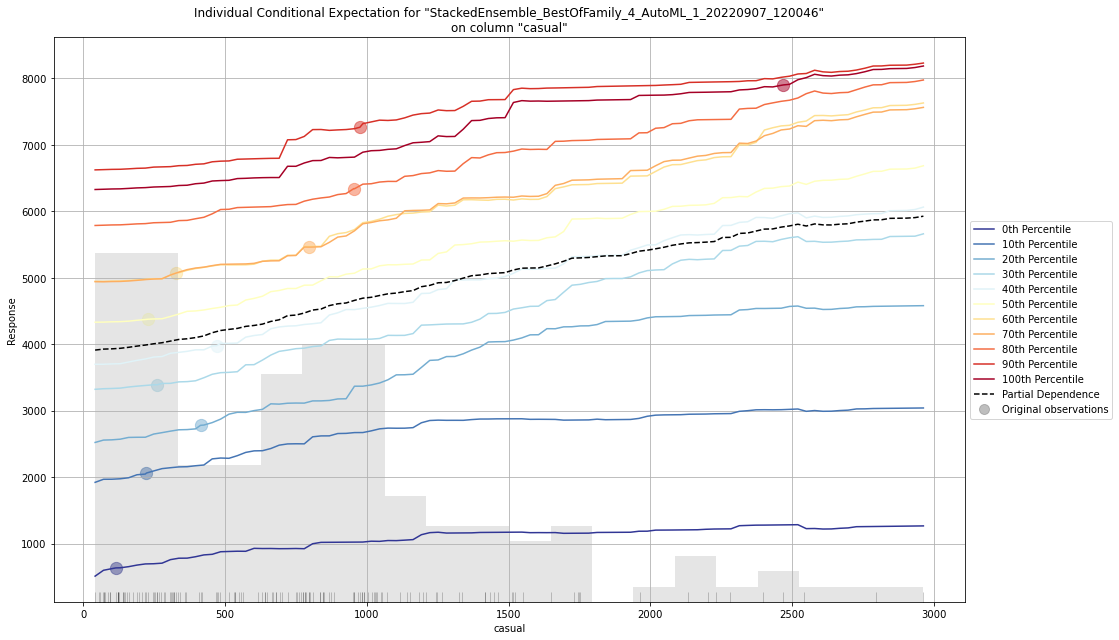

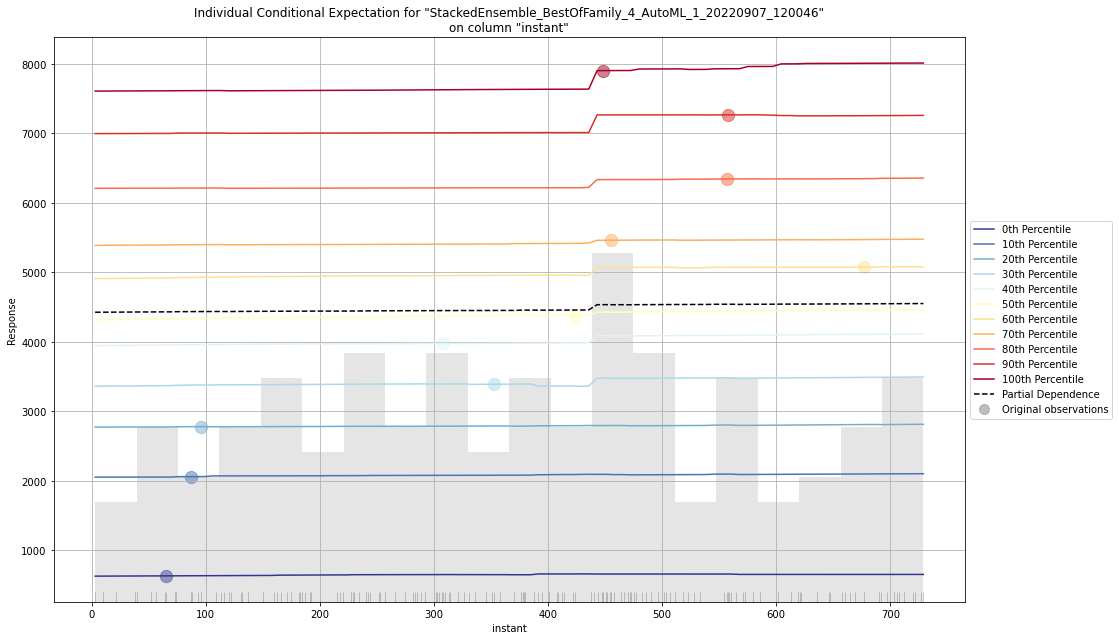

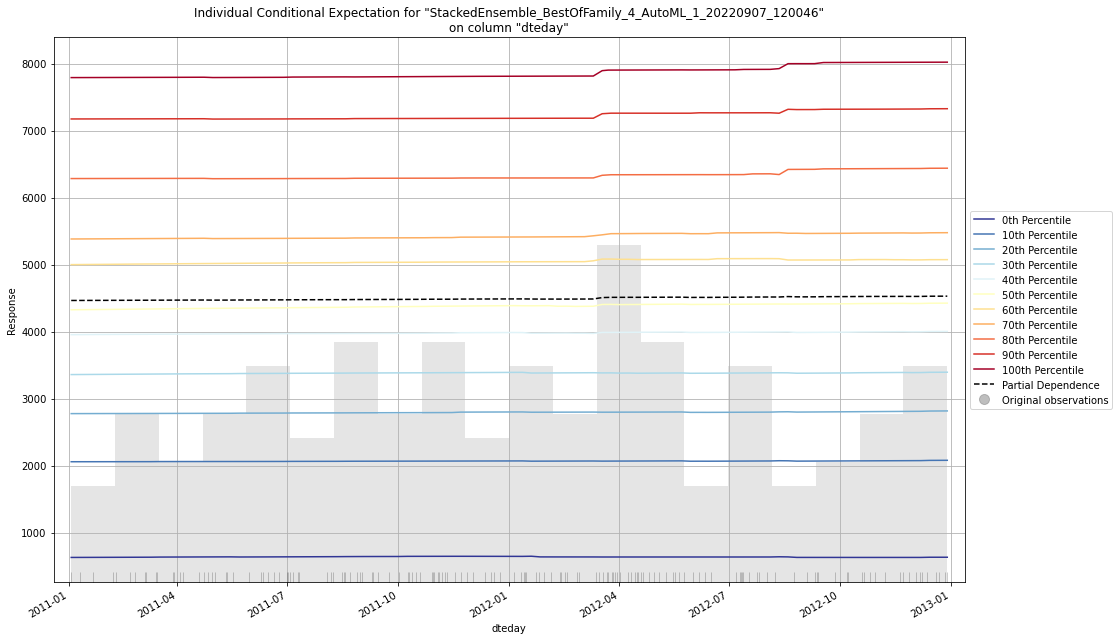

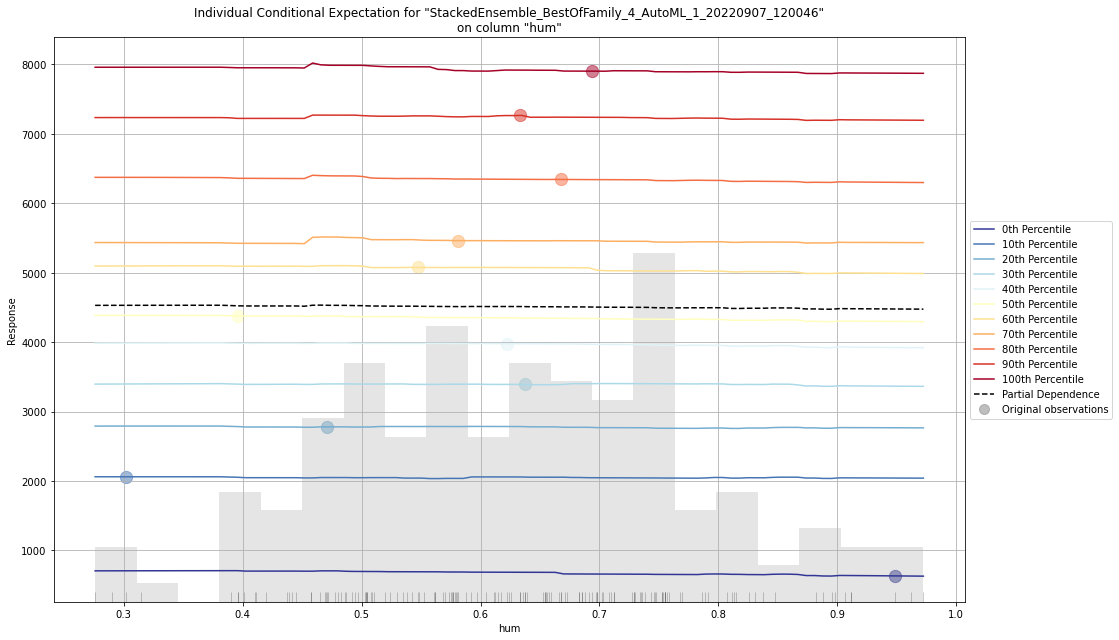

In [9]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(test_day)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

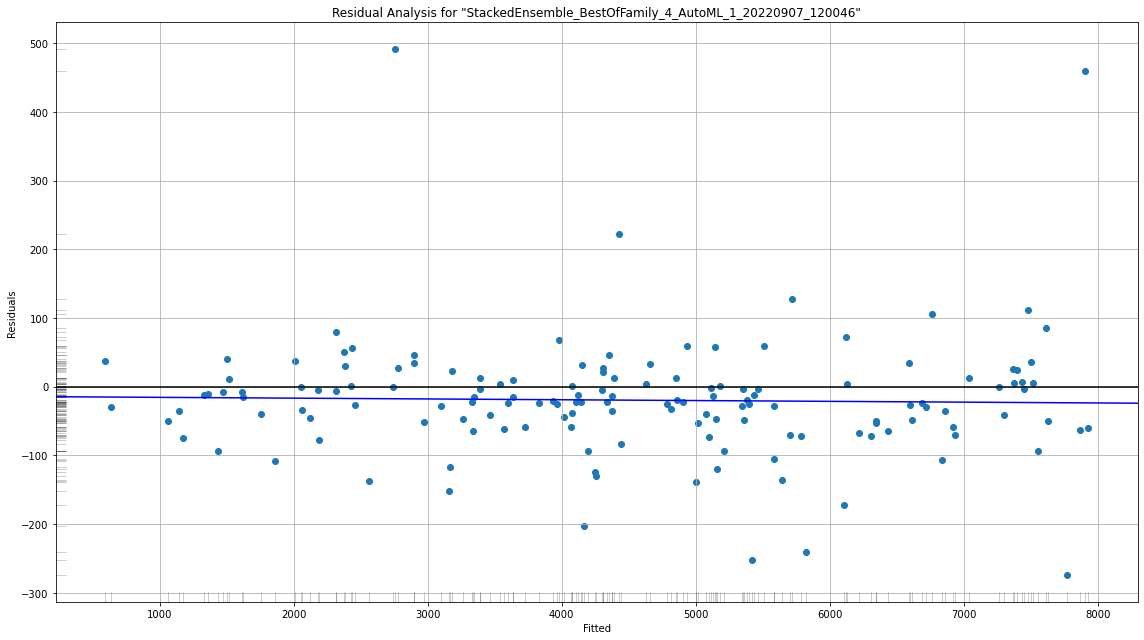

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

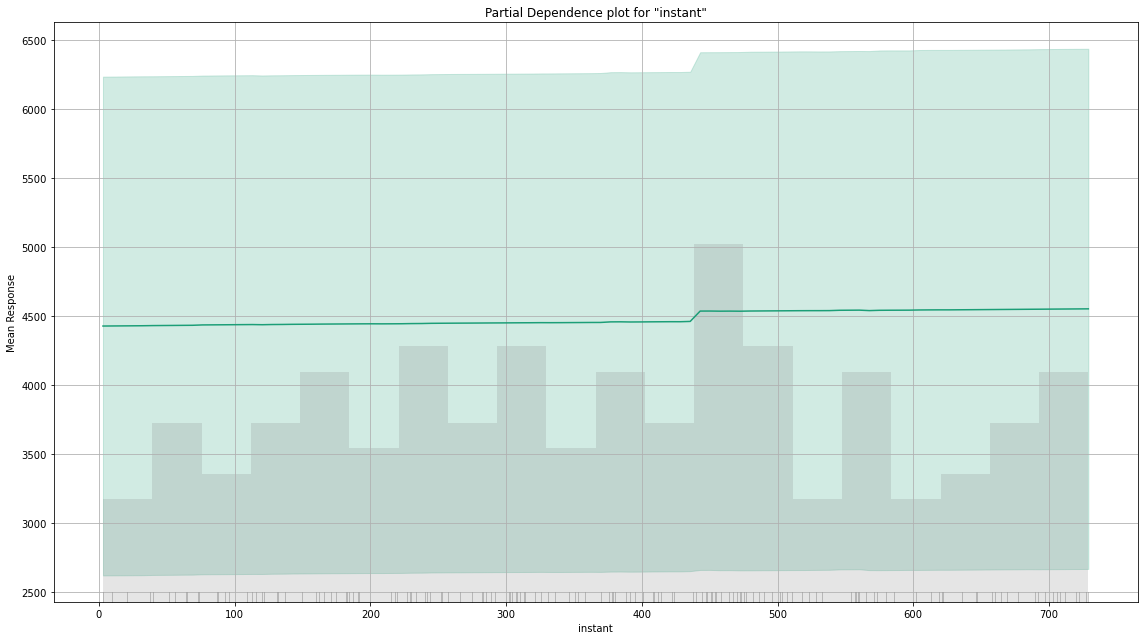

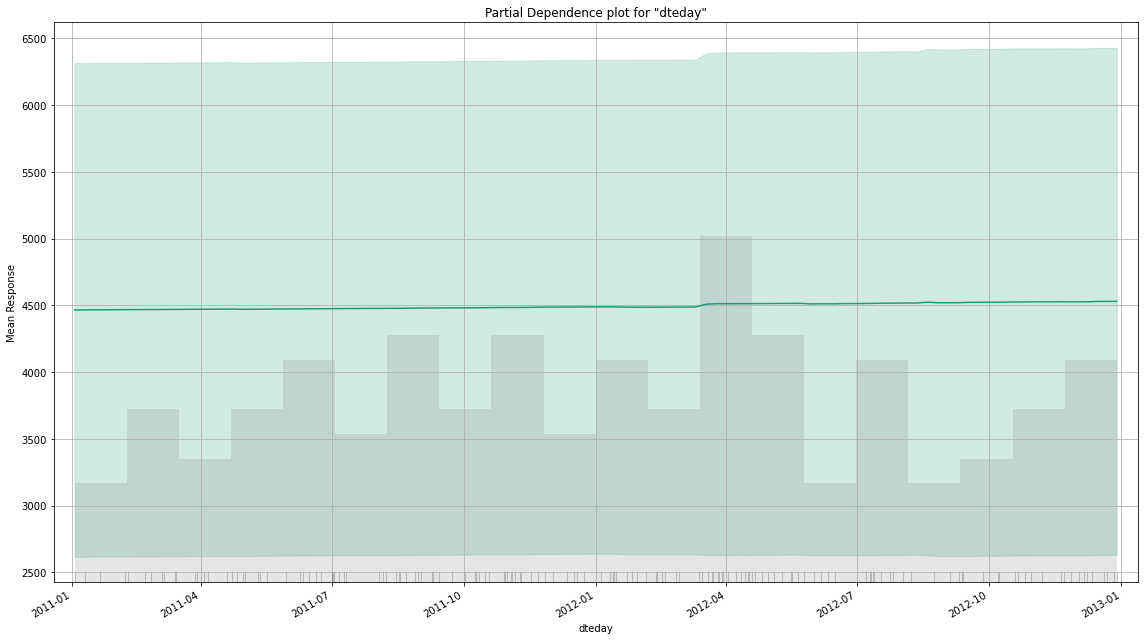

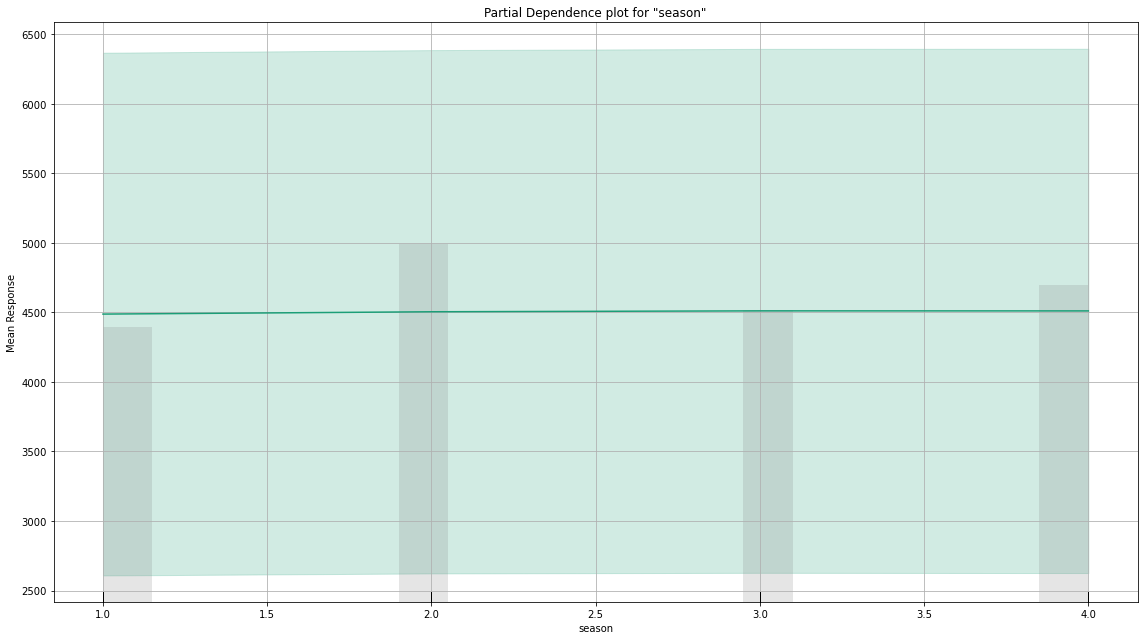

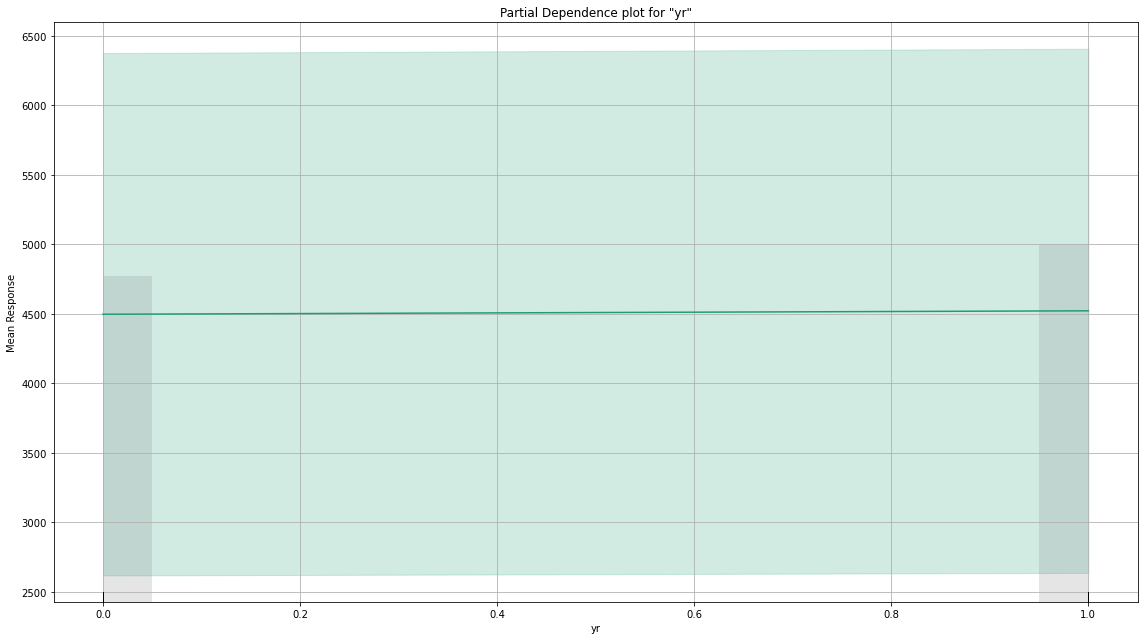

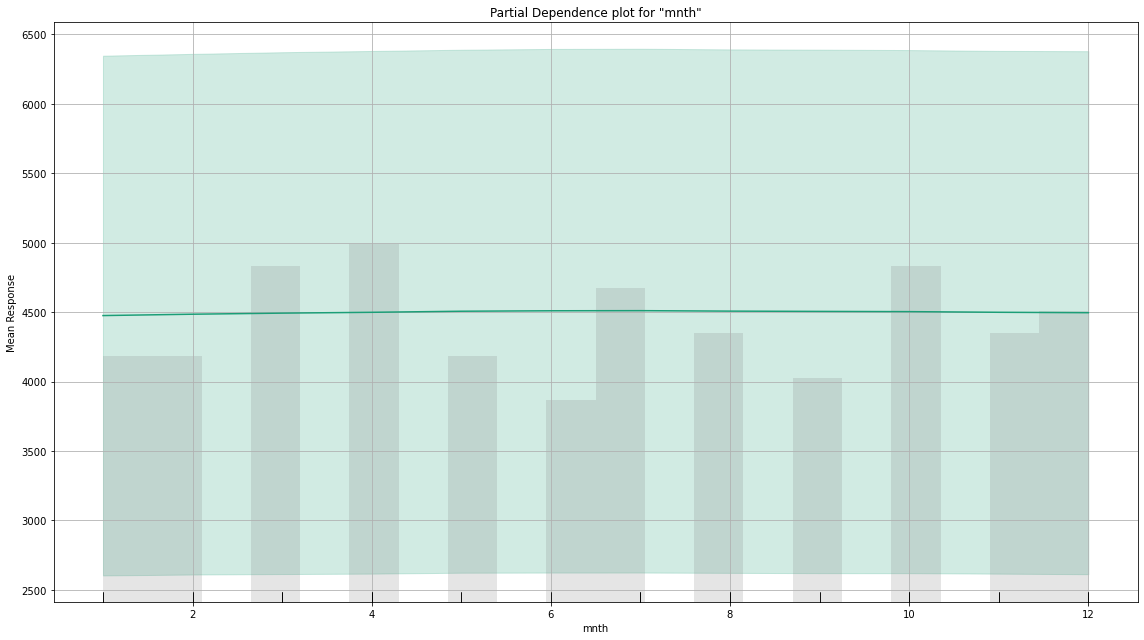

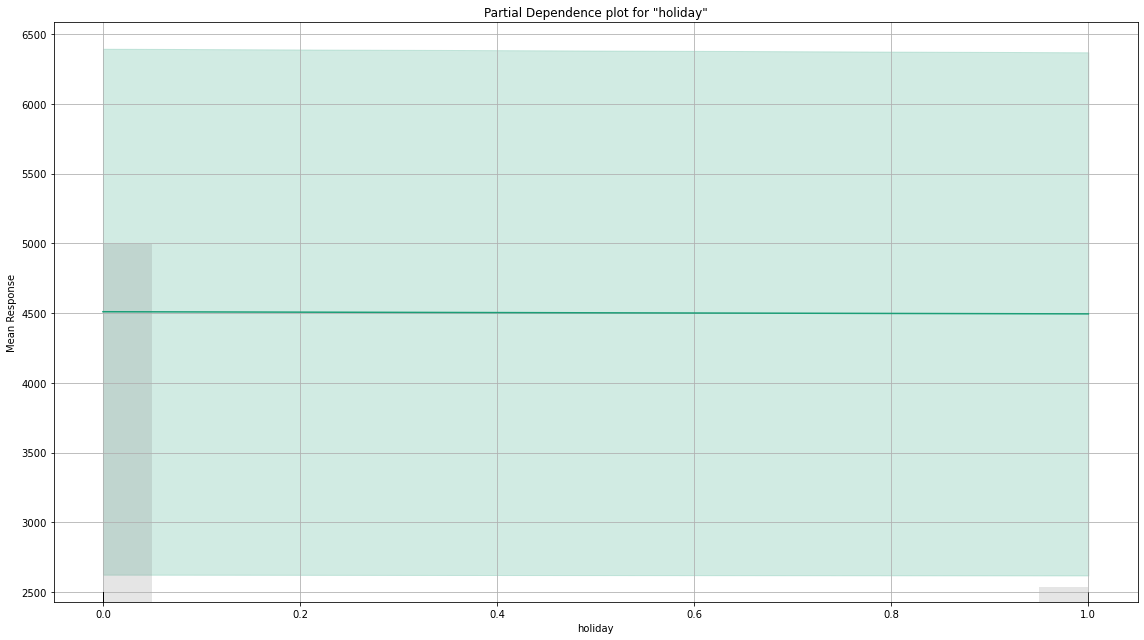

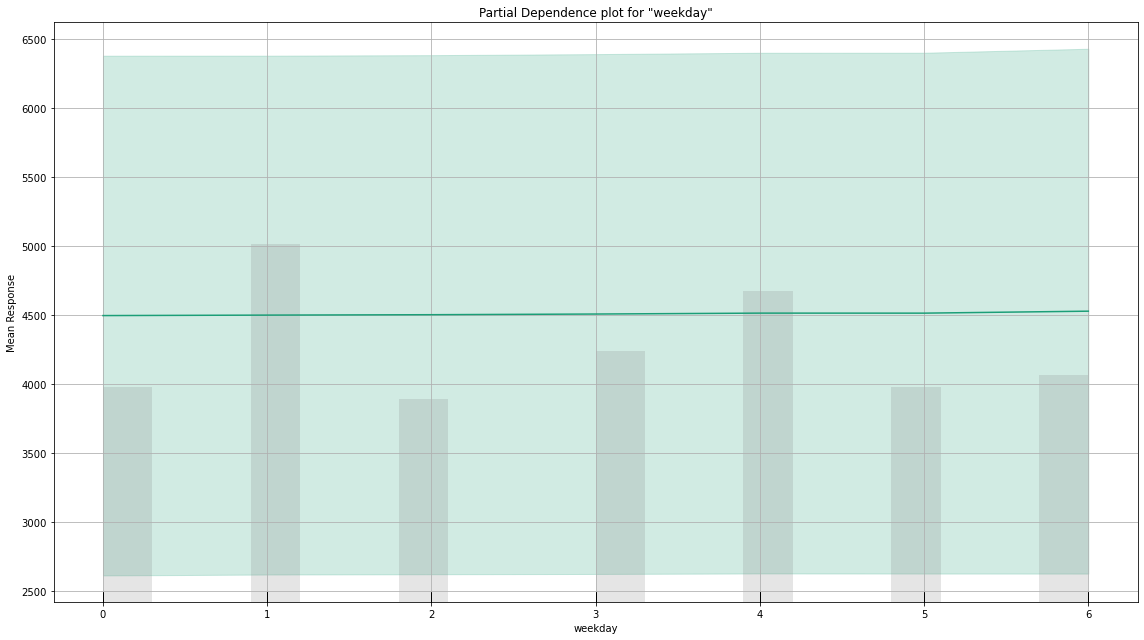

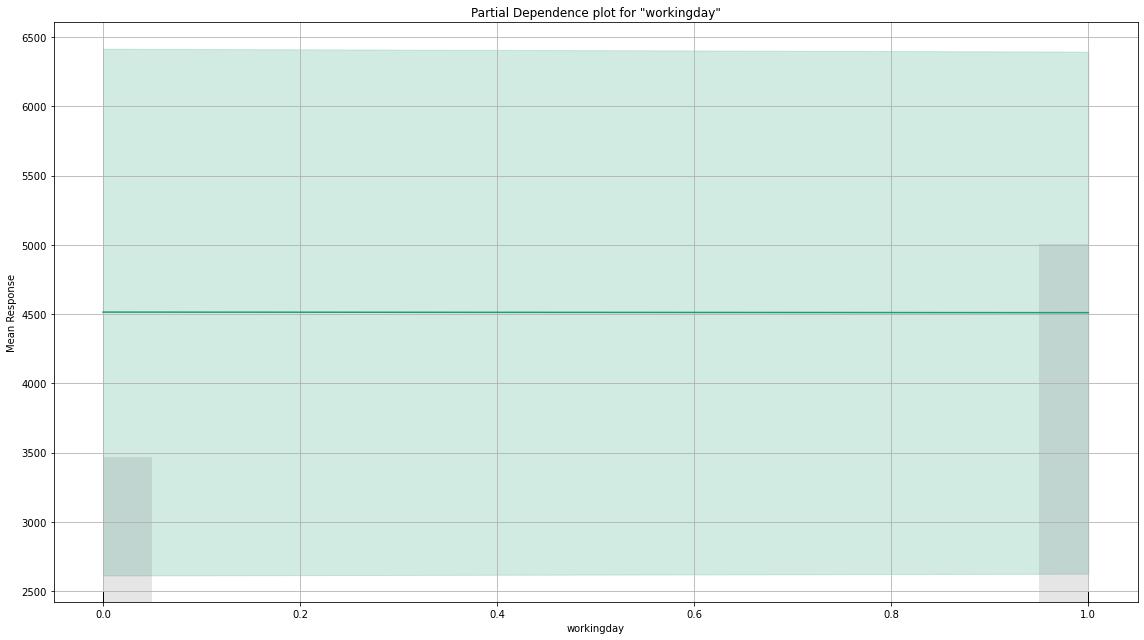

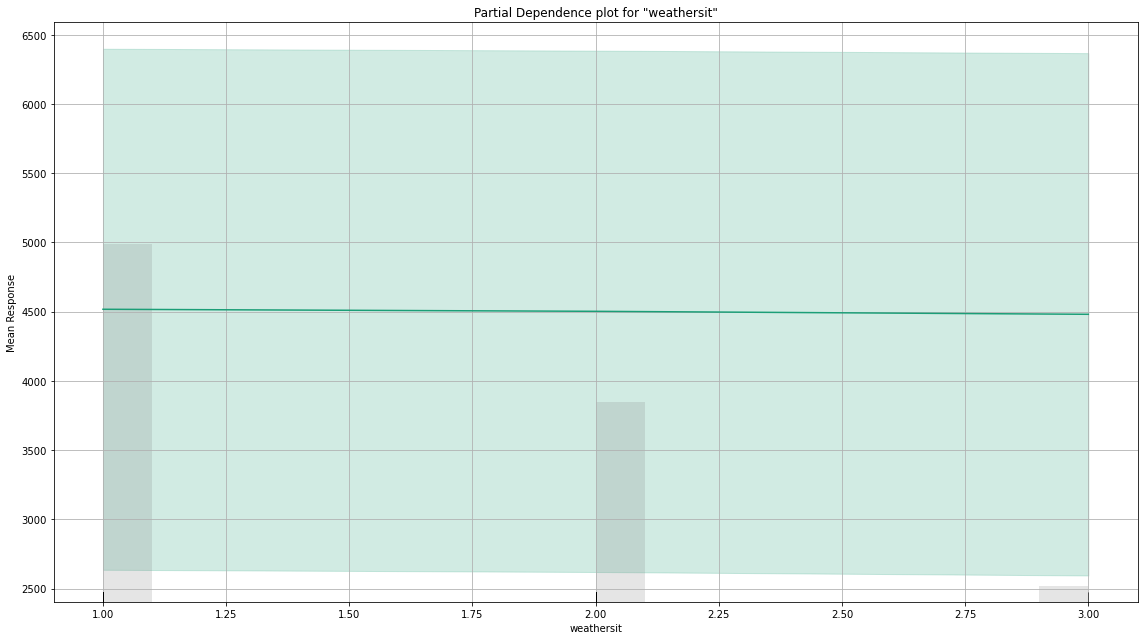

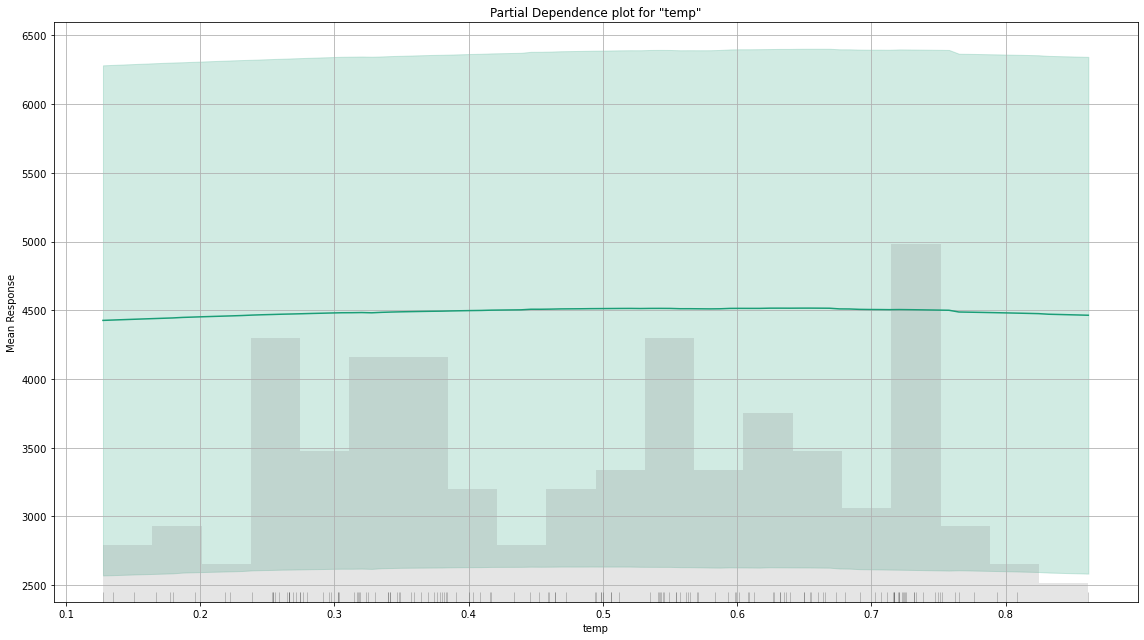

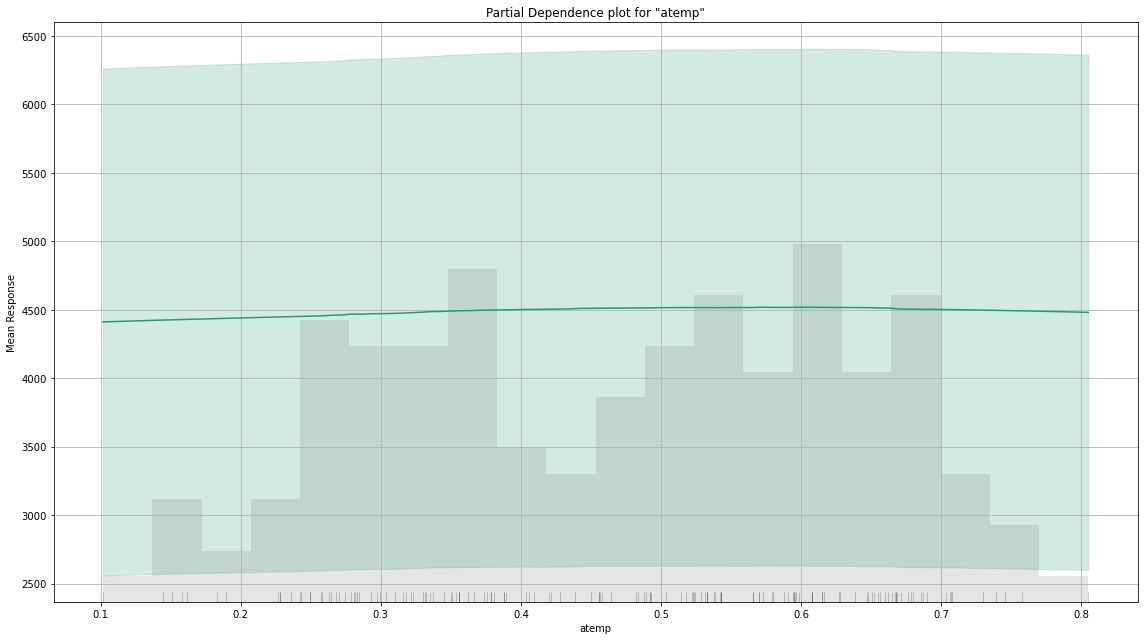

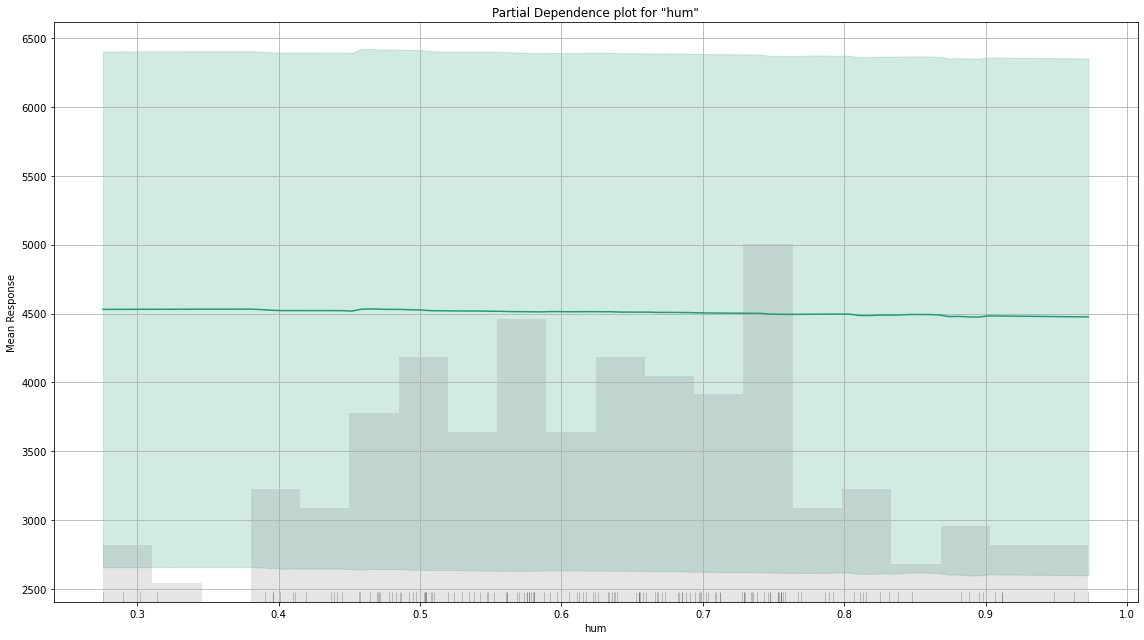

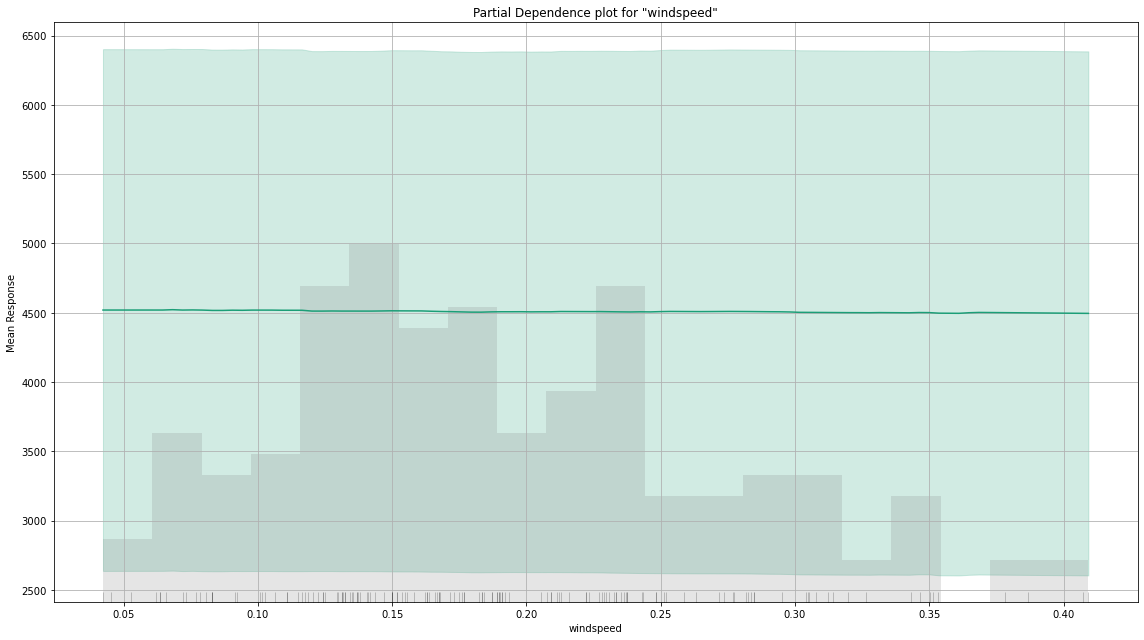

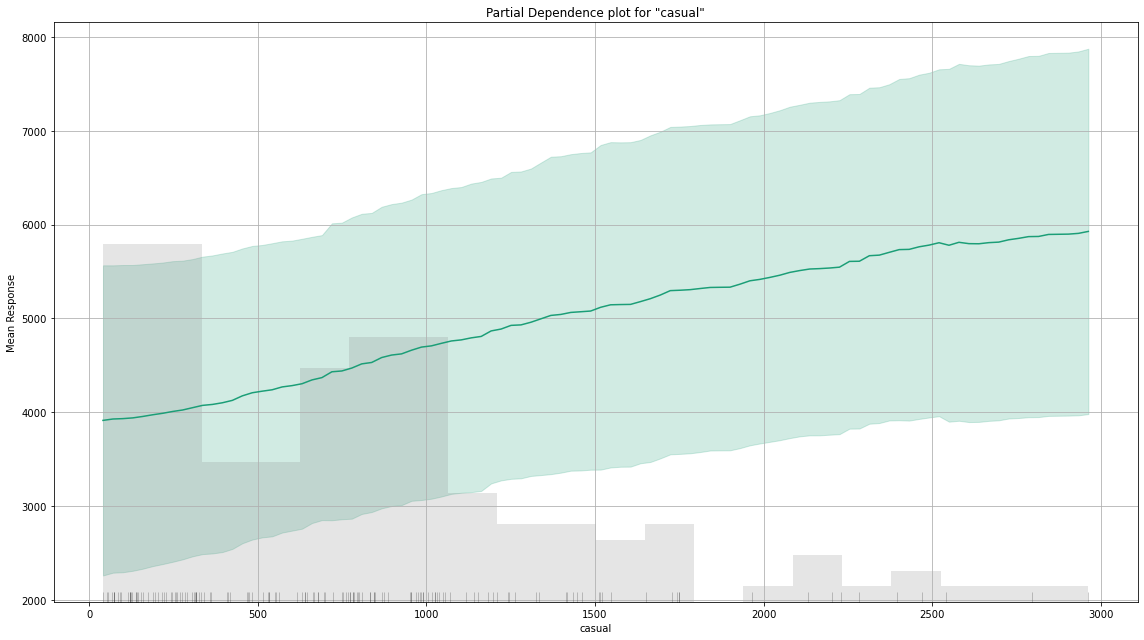

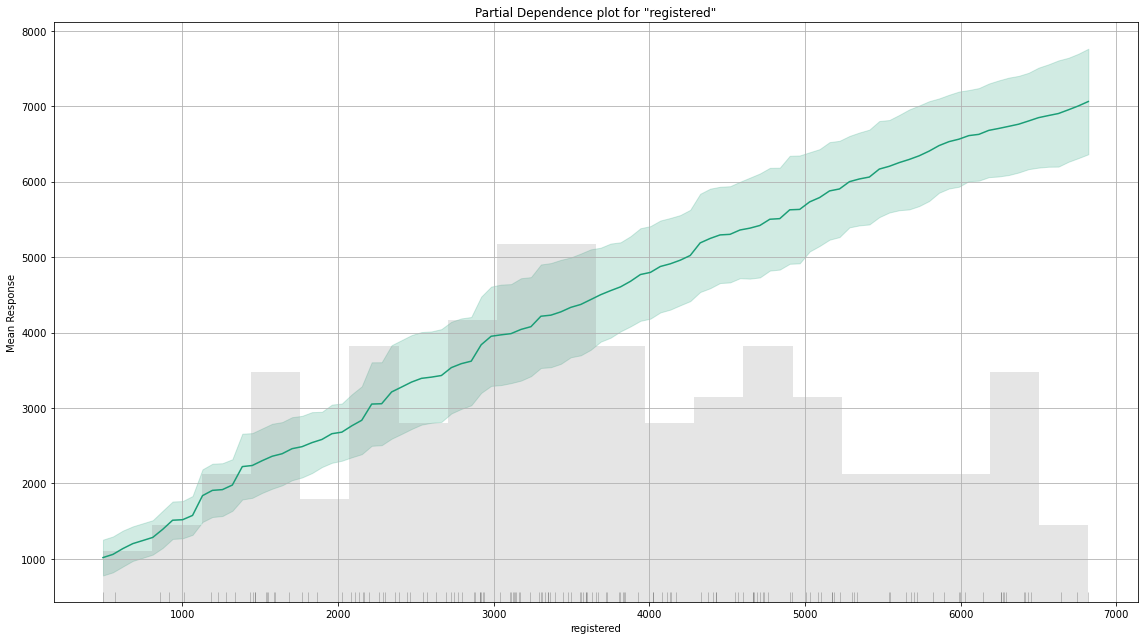

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

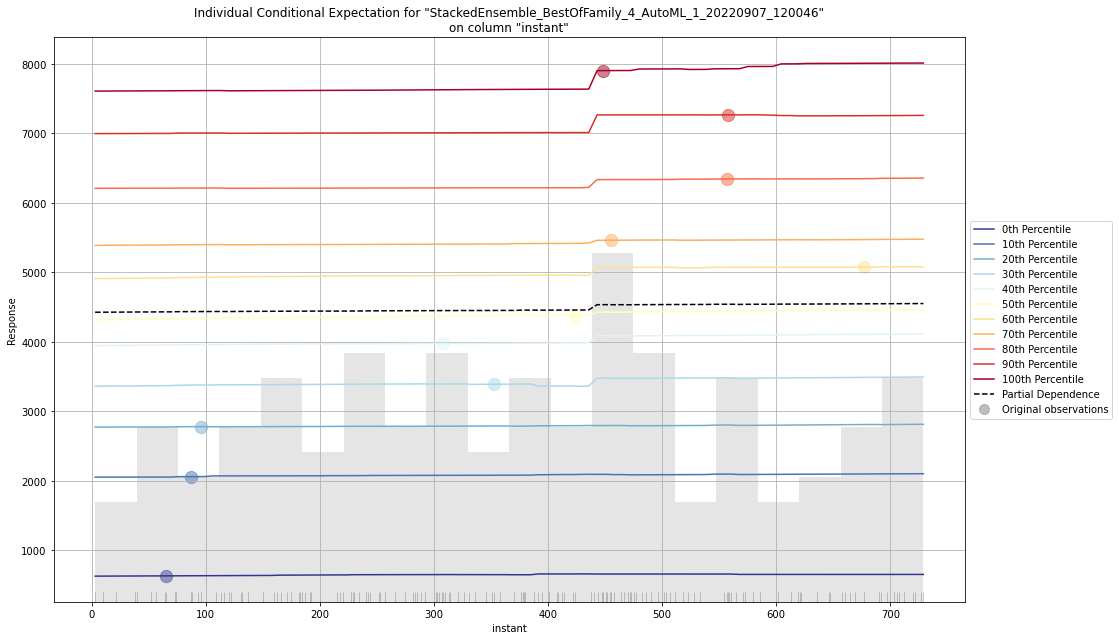

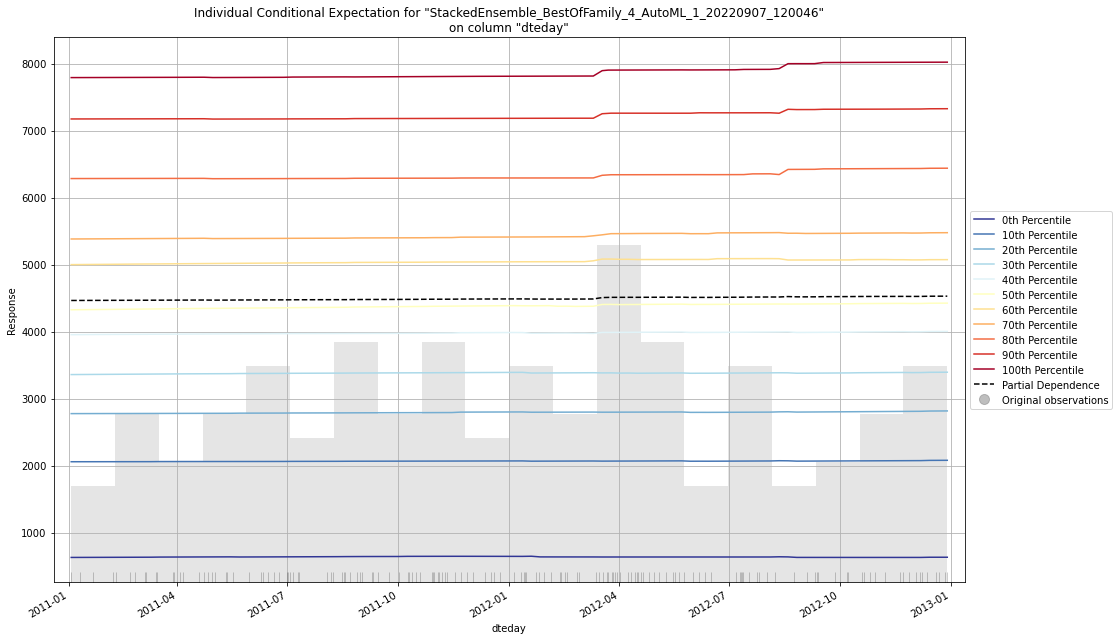

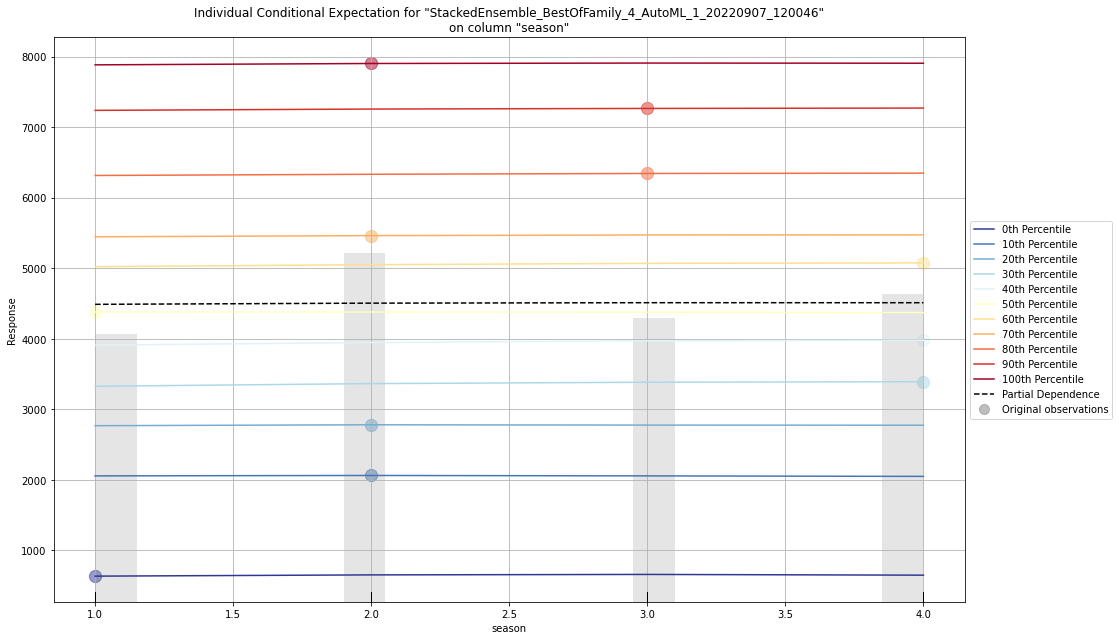

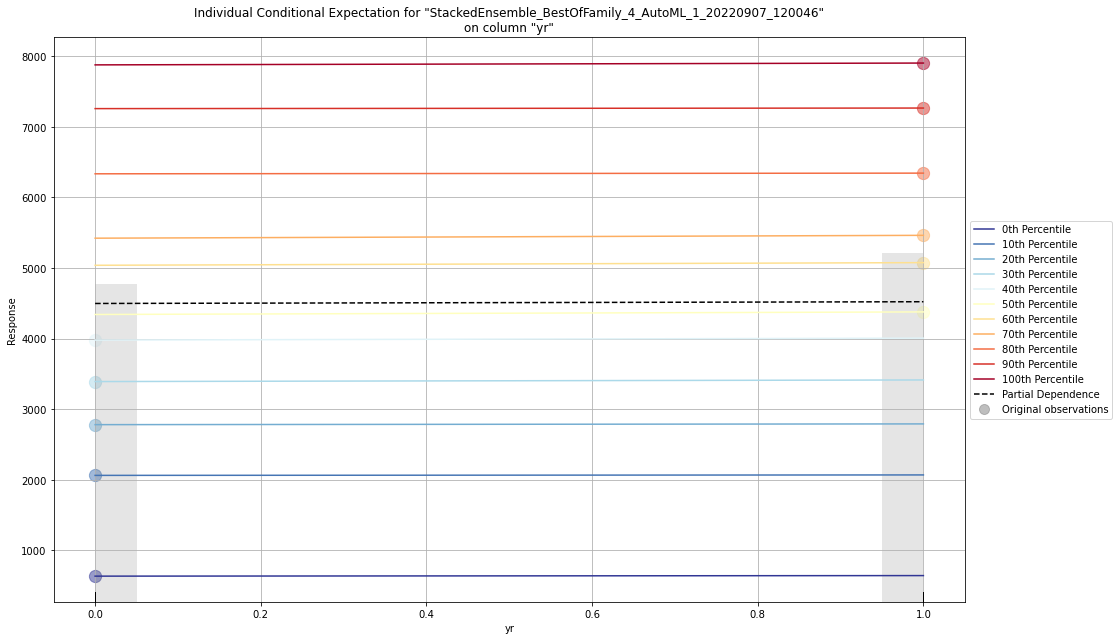

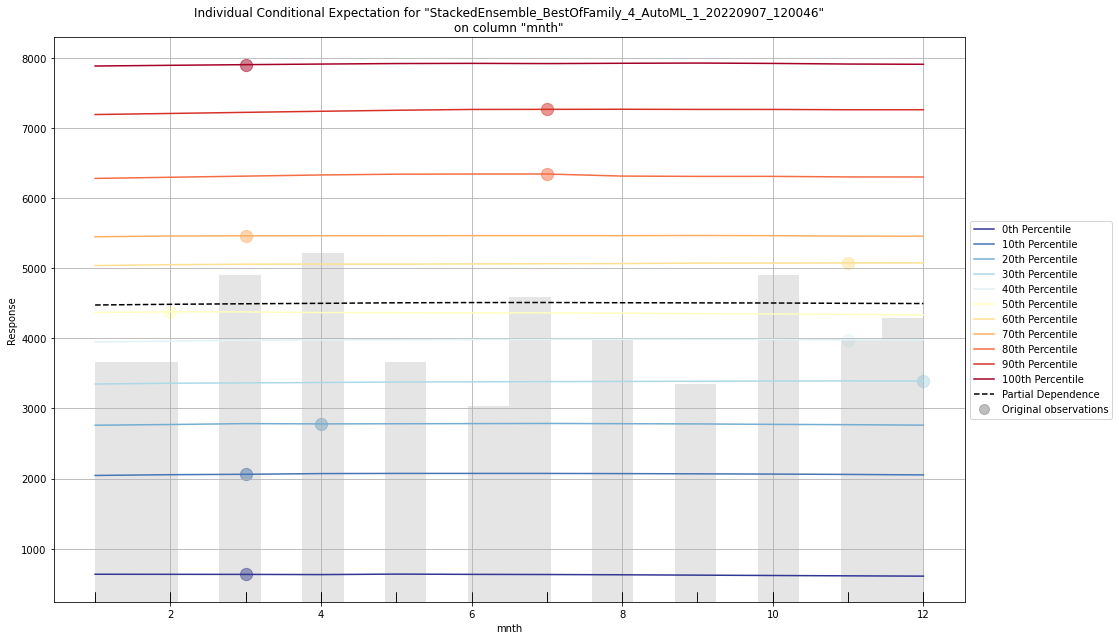

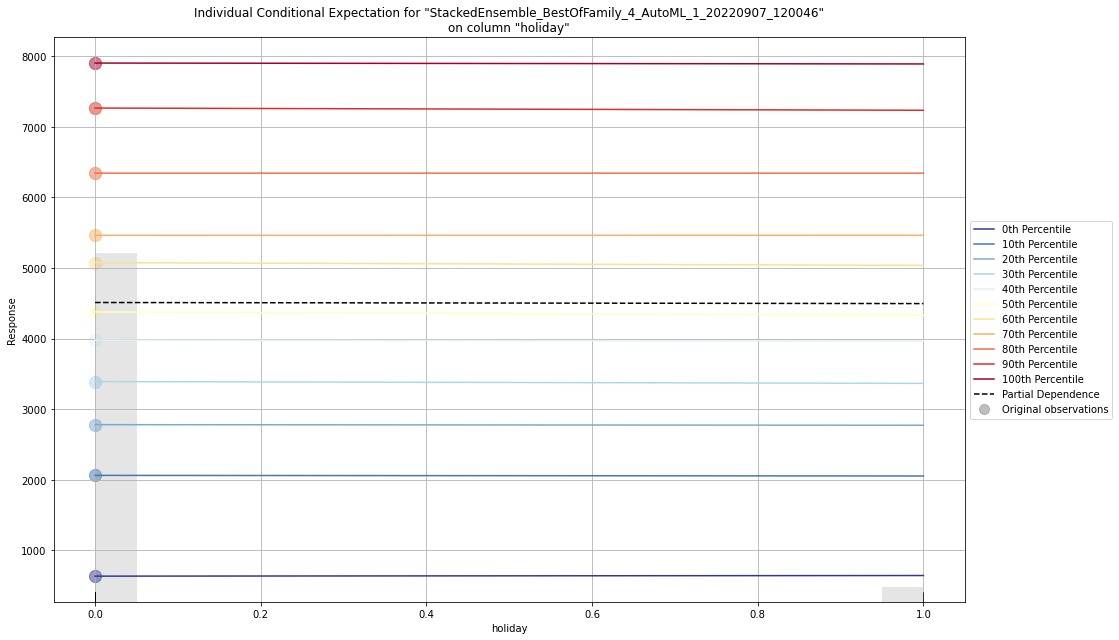

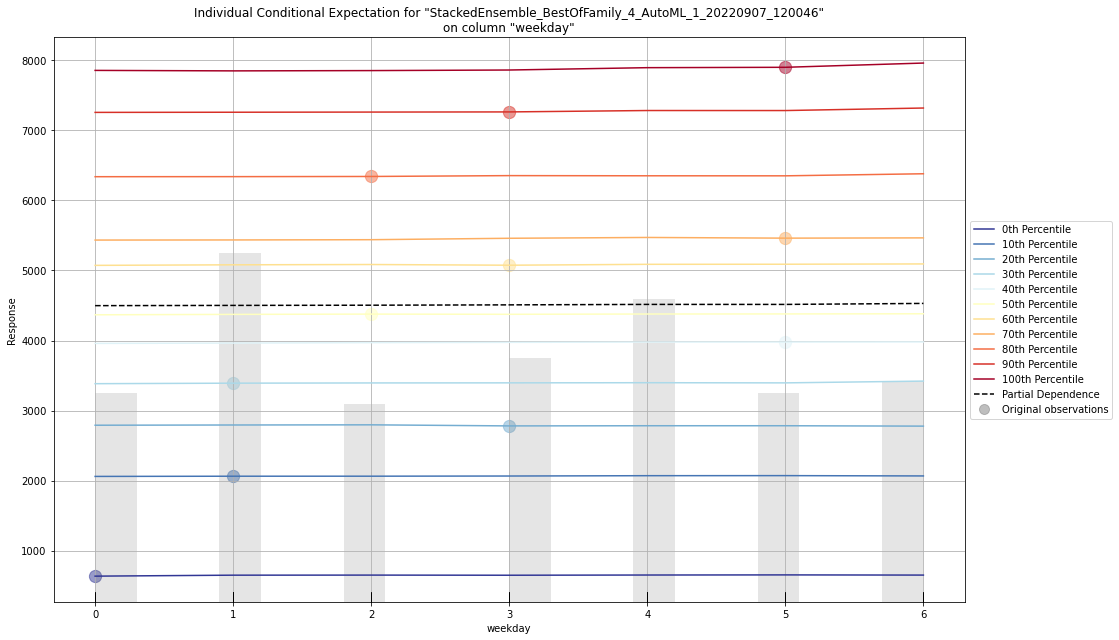

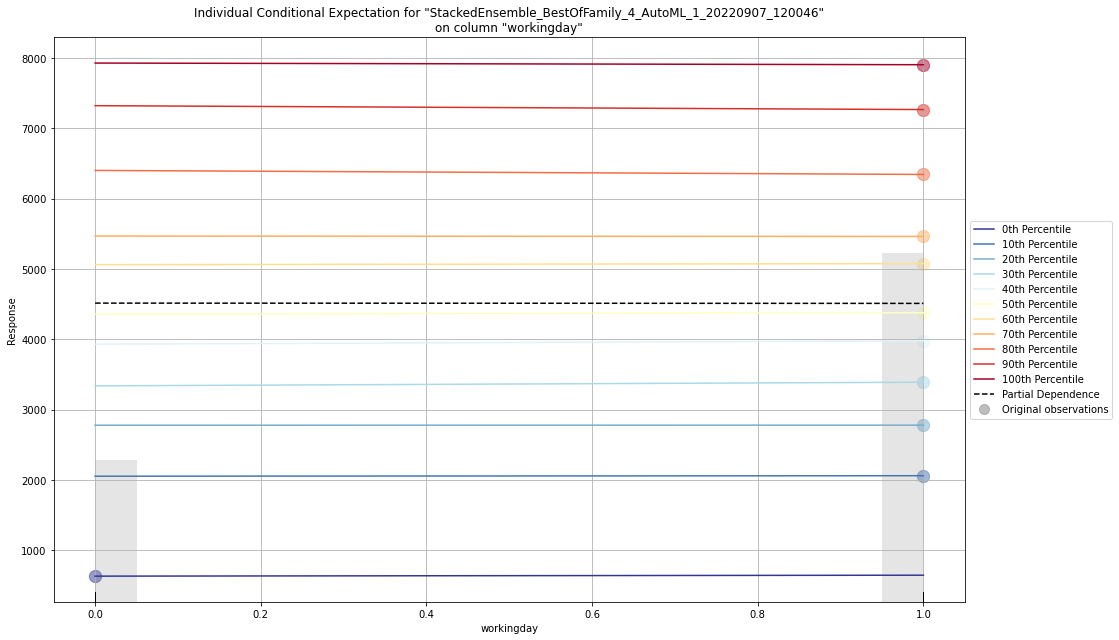

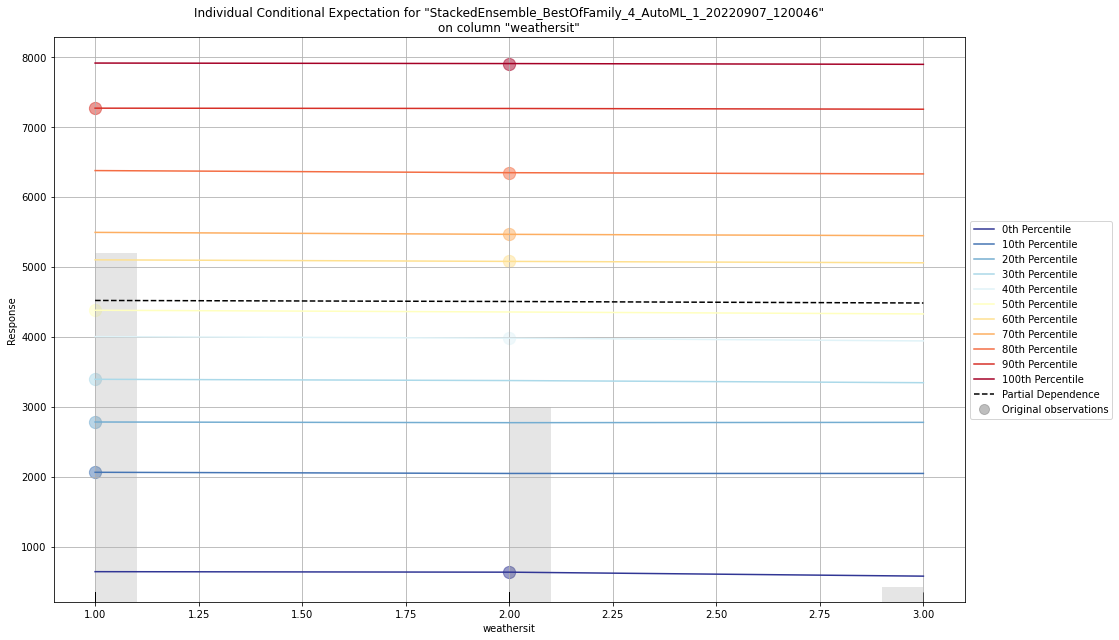

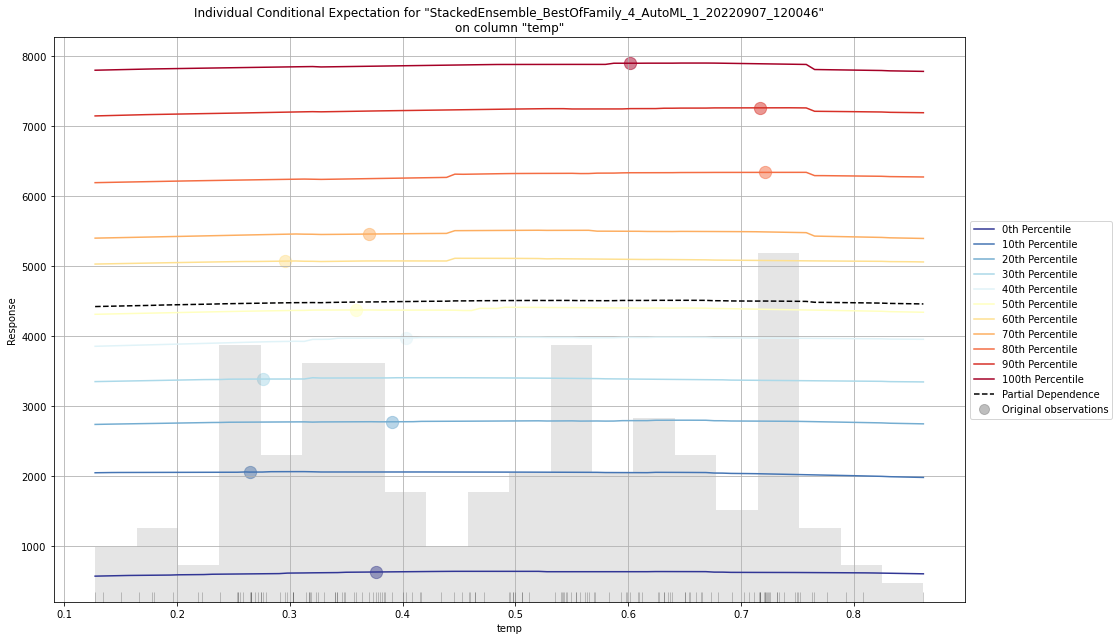

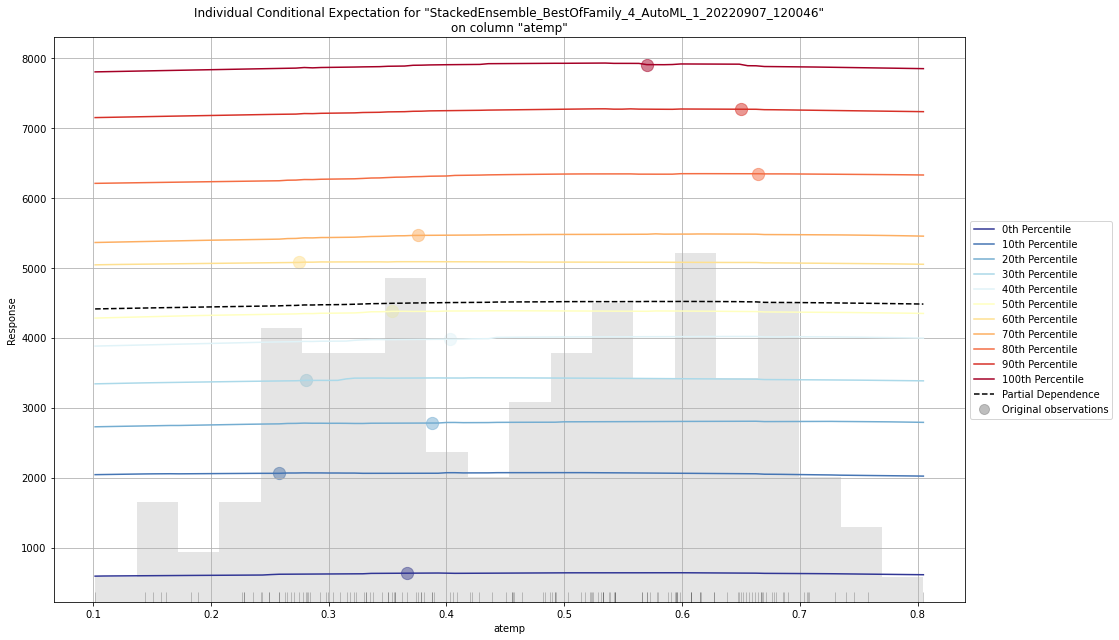

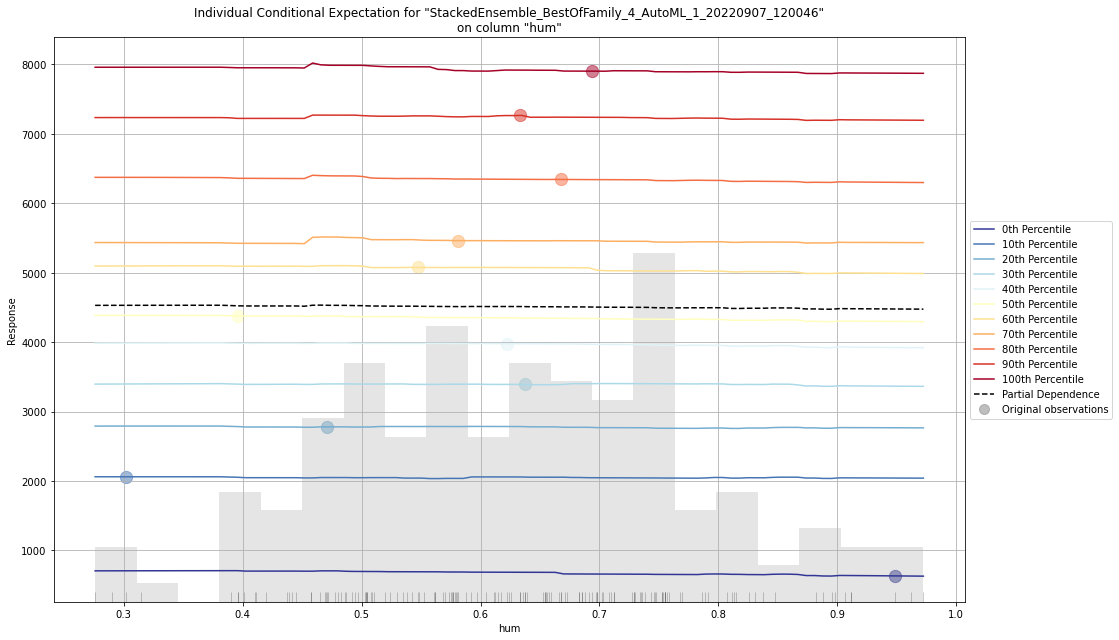

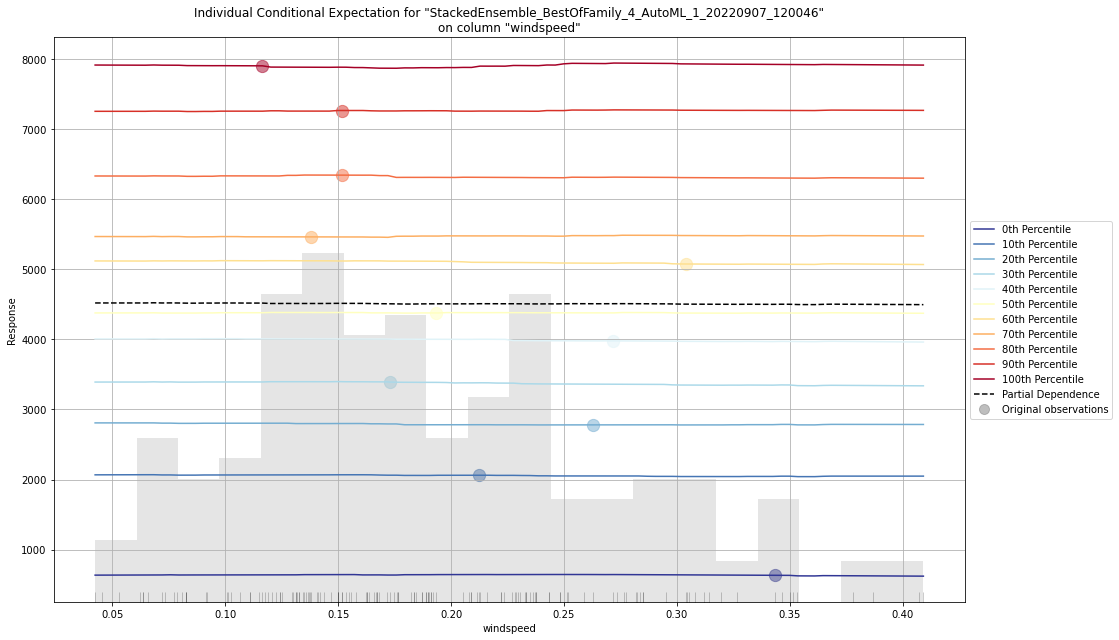

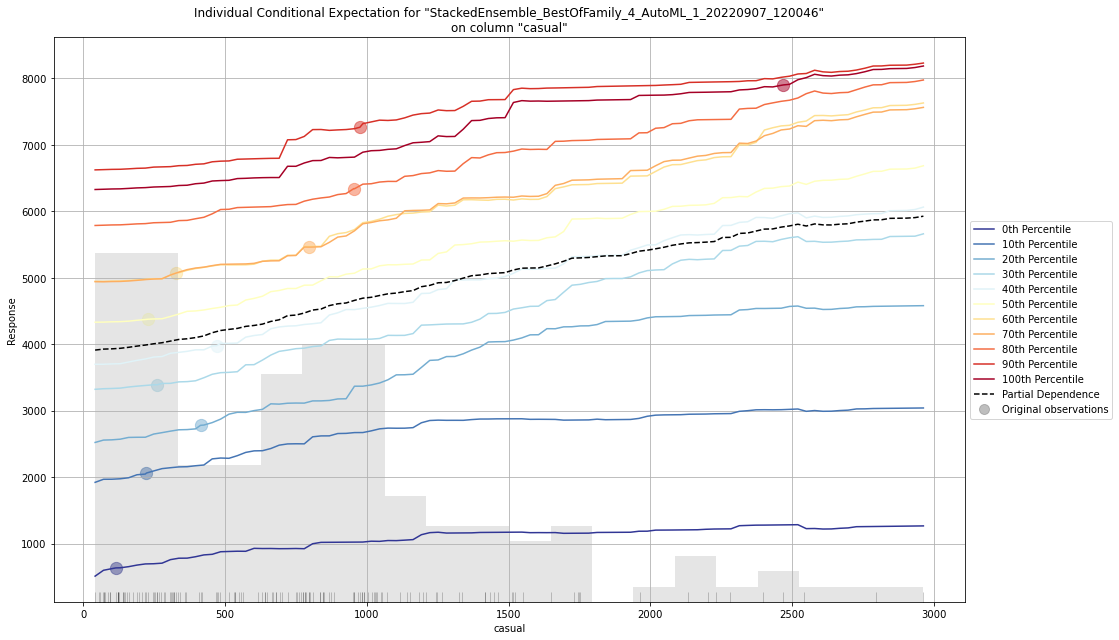

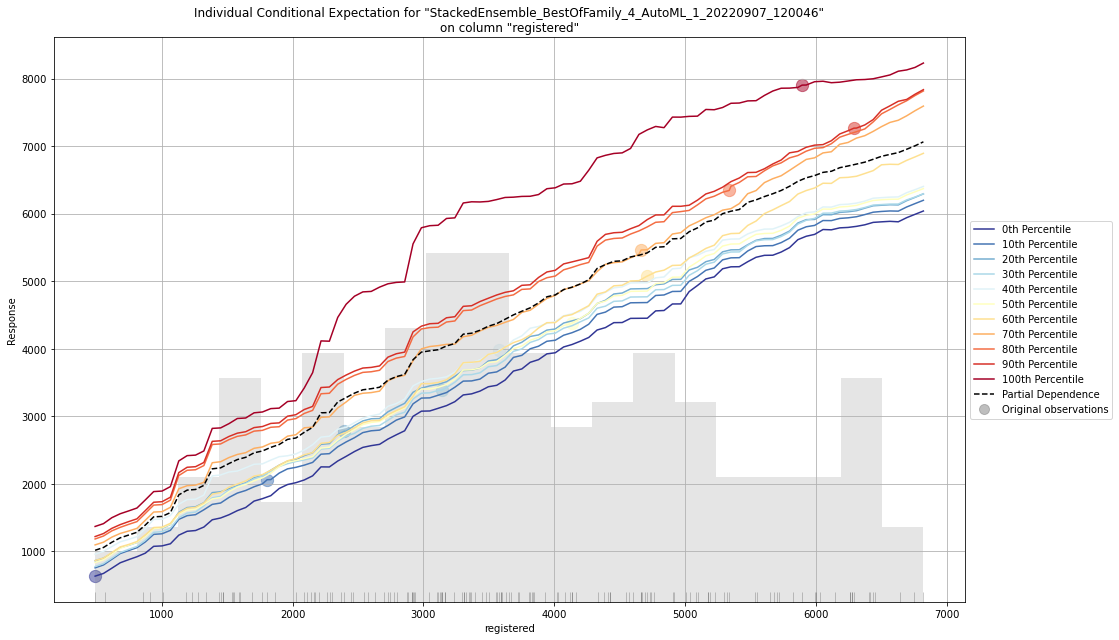

In [10]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test_day)

In [11]:
pred = aml.predict(test_day)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [12]:
pred

predict 
 
 
 1359.22 
 1333.06 
 1502.78 
 1751.97 
 1612.07 
 1142.82 
 1469.07 
 2122.38 
 634.202 
 2009.12

### model 2

In [15]:
from h2o.estimators import H2ORandomForestEstimator

In [16]:
day_drf = H2ORandomForestEstimator()

day_drf.train(y=y, training_frame=train_day)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1662531438760_22


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0             234037.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       14.0       20.0       17.04       351.0       385.0       368.18



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 62326.14284087241
RMSE: 249.65204353434083
MAE: 165.077141119547
RMSLE: 0.20839974594870989
Mean Residual Deviance: 62326.14284087241

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-09-07 12:45:29   0.017 sec              0.0            NaN   
1     2022-09-07 12:45:29   0.050 sec              1.0     507.817885   
2     2022-09-07 12:45:29   0.066 sec              2.0     436.339297   
3     2022-09-07 12:45:29   0.117 sec              3.0     429.707350   
4     2022-09-07 12:45:29   0.129 sec              4.0     444.983402   
5     2022-09-07 12:45:29   0.142 sec              5.0     441.603541   
6     2022-09-07 12:45:29   0.153 sec              6.0     394.310477   
7     2022-09-07 12:45:29   0.166 sec              7.0     362.931209   
8     2022-09-07 12:45:29   0.177 sec              8.0     383.200042   
9     2022-09-07 12:45:29   0.190 sec              9.0     363.014676   
10    2022-09-07 12:45:29   0.202 sec             10.0     344.345647   
11    2022-09-07 12:45:29   0.214 sec             11.0     327.605959   
12    2022-09-07 12:45:29   0.226 sec             12.0     325.372951   
13    2022-09-07 12:45:29   0.238 sec             13.0     309.098529   
14    2022-09-07 12:45:29   0.249 sec             14.0     303.290049   
15    2022-09-07 12:45:29   0.261 sec             15.0     306.468292   
16    2022-09-07 12:45:29   0.274 sec             16.0     304.715296   
17    2022-09-07 12:45:29   0.287 sec             17.0     303.476900   
18    2022-09-07 12:45:29   0.300 sec             18.0     308.488280   
19    2022-09-07 12:45:29   0.312 sec             19.0     303.515468   

    training_mae  training_deviance  
0            NaN                NaN  
1     374.114679      257879.004587  
2     296.257639      190391.982118  
3     285.670479      184648.406938  
4     288.877500      198010.228208  
5     292.646622      195013.687305  
6     261.969795      155480.752471  
7     244.562418      131719.062589  
8     249.259028      146842.272234  
9     236.951994      131779.654705  
10    231.407941      118573.924394  
11    215.997063      107325.664083  
12    213.807973      105867.556932  
13    207.058426       95541.900867  
14    201.536346       91984.854038  
15    202.347889       93922.814278  
16    202.697807       92851.411590  
17    202.026248       92098.228565  
18    201.976949       95165.018953  
19    197.169829       92121.639486


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   registered         4.292676e+10           1.000000    0.472819
1      instant         1.604260e+10           0.373720    0.176702
2       casual         1.151465e+10           0.268240    0.126829
3       dteday         5.554698e+09           0.129399    0.061183
4        atemp         4.804760e+09           0.111929    0.052922
5         temp         3.446448e+09           0.080287    0.037961
6           yr         2.623944e+09           0.061126    0.028902
7         mnth         9.810035e+08           0.022853    0.010805
8          hum         6.395802e+08           0.014899    0.007045
9       season         4.949148e+08           0.011529    0.005451
10  weathersit         4.782626e+08           0.011141    0.005268
11   windspeed         4.628112e+08           0.010781    0.005098
12  workingday         4.419620e+08           0.010296    0.004868
13     weekday         3.488624e+08           0.008127    0.003843
14     holiday         2.770975e+07           0.000646    0.000305

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

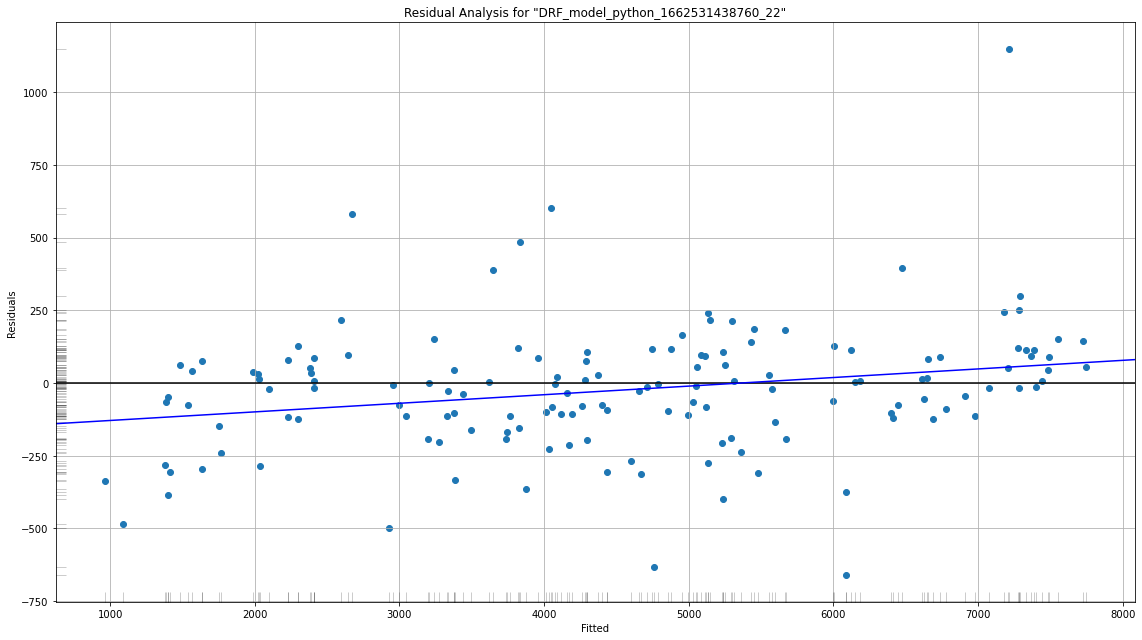

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

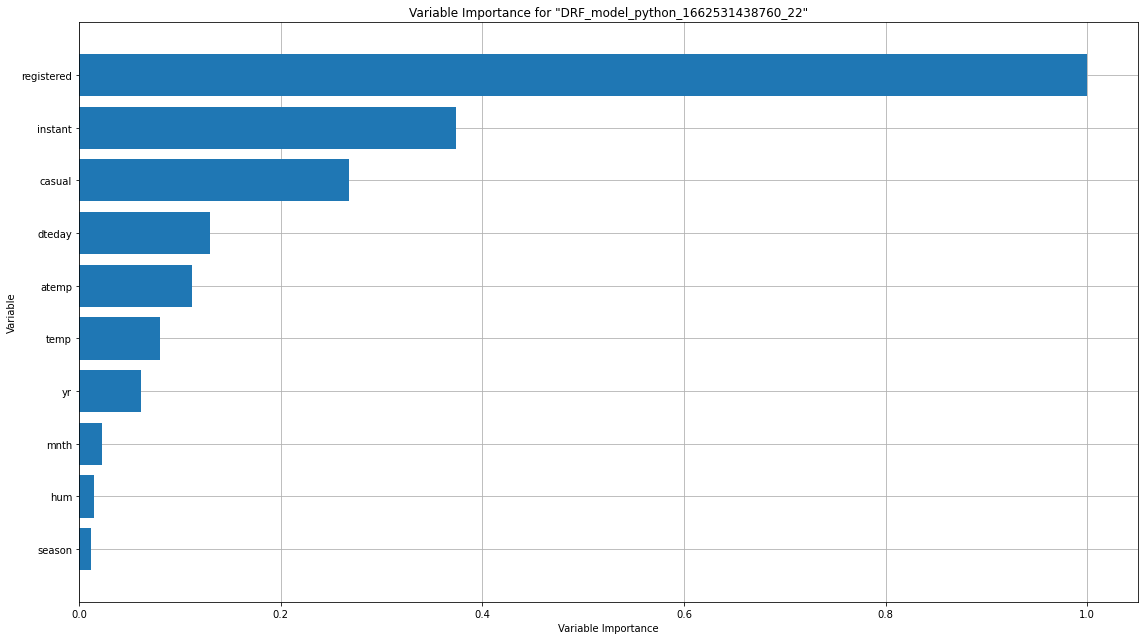

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

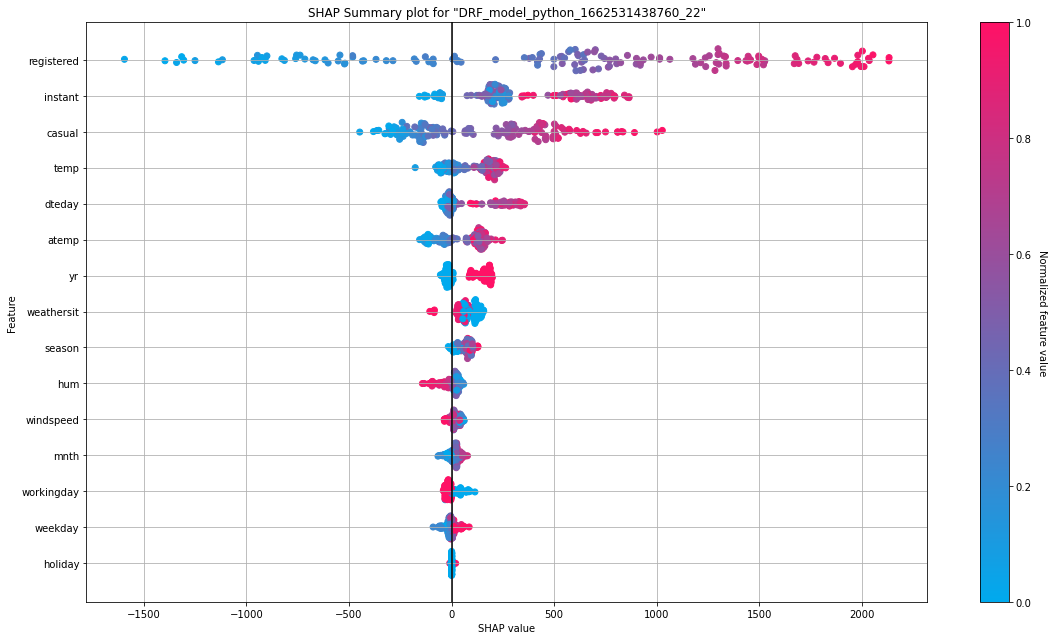

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

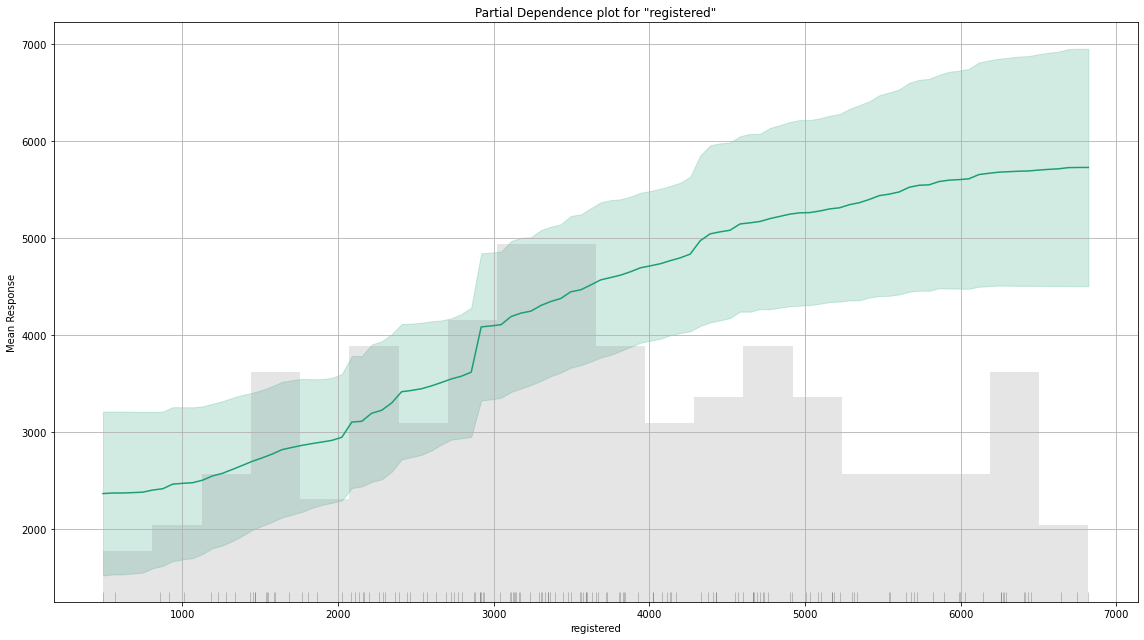

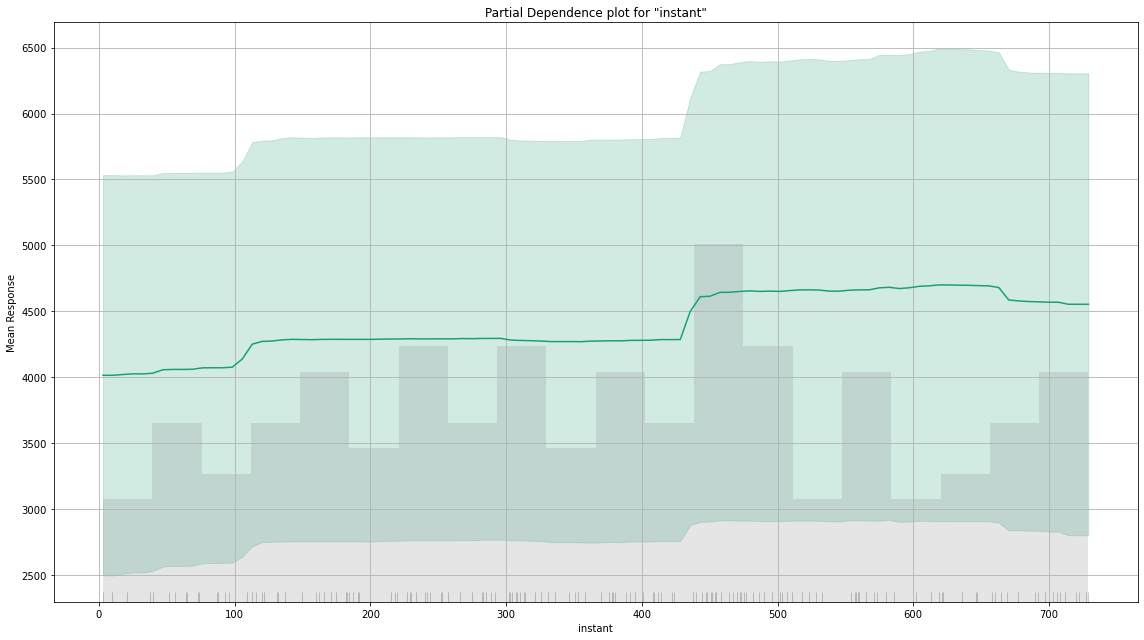

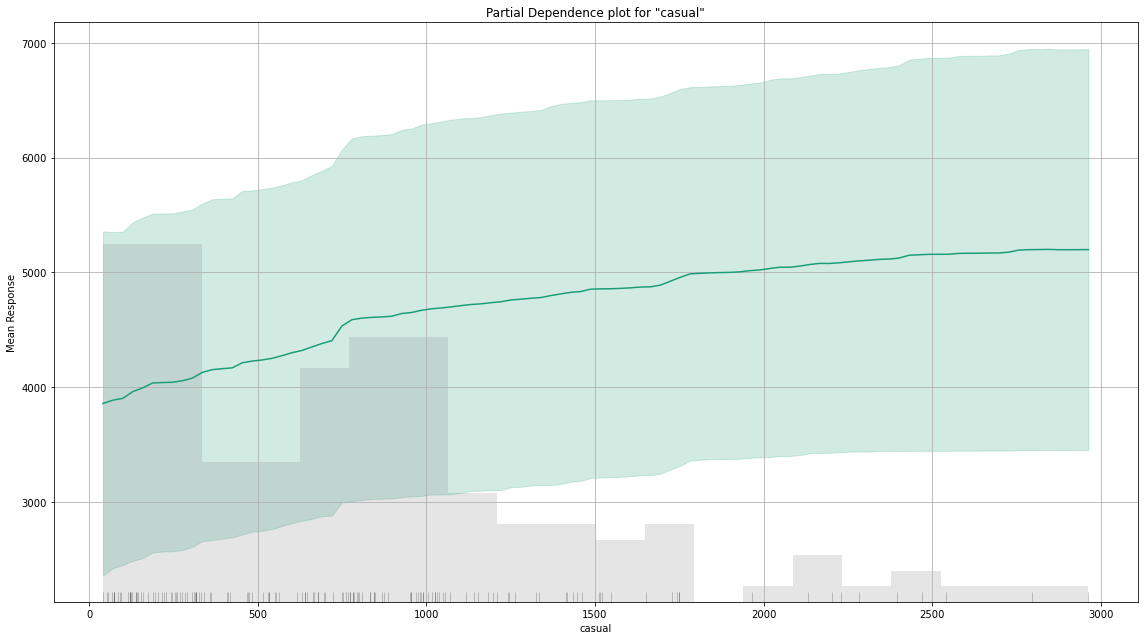

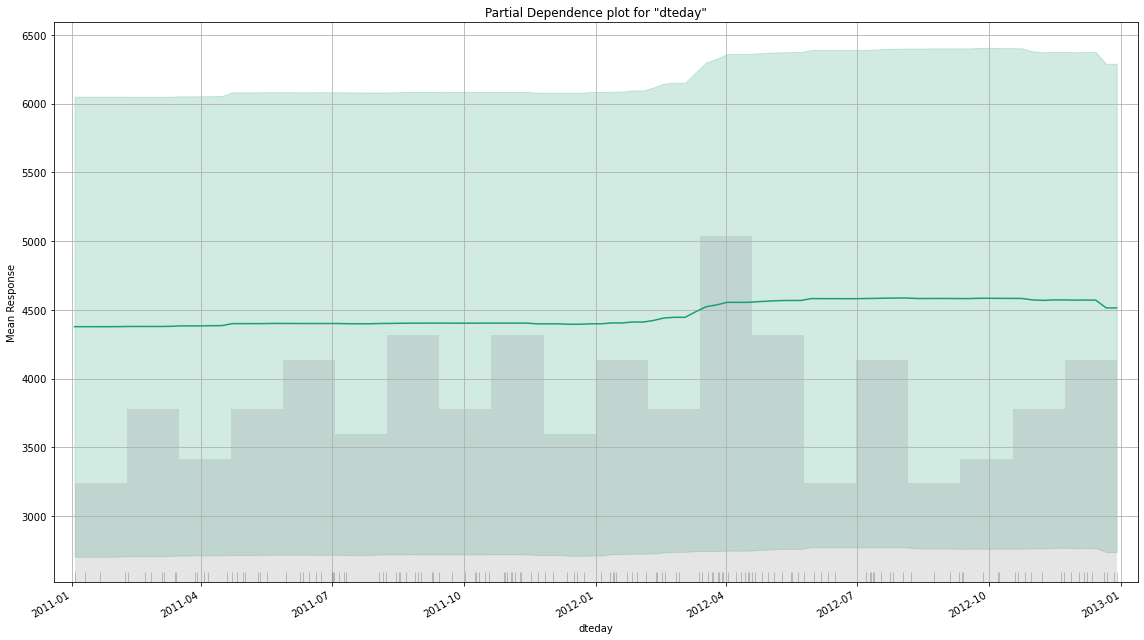

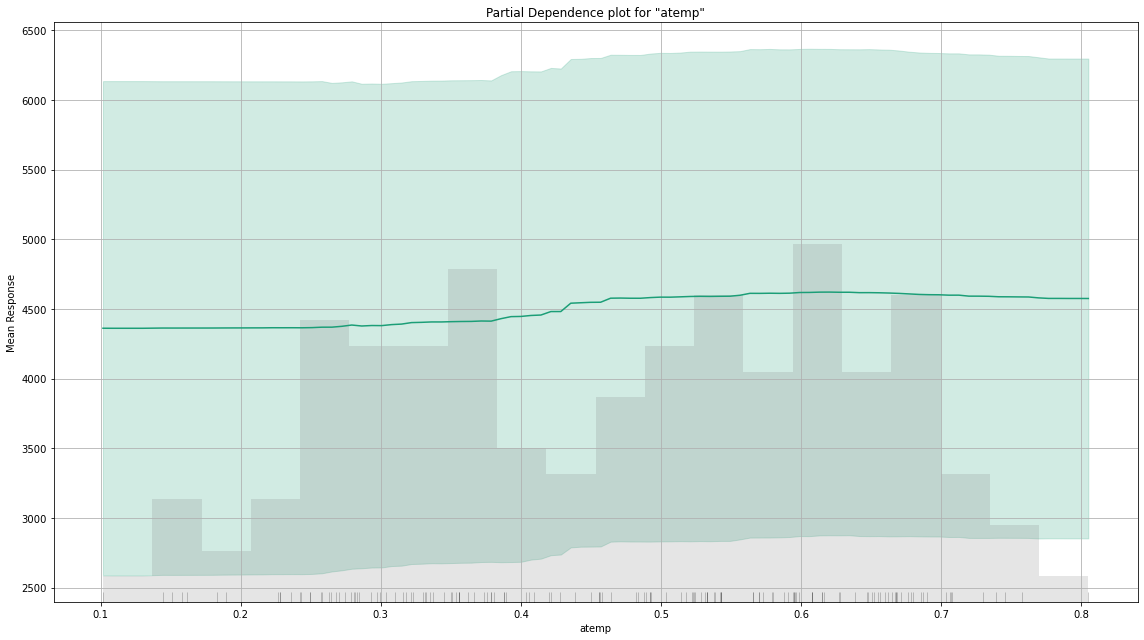

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

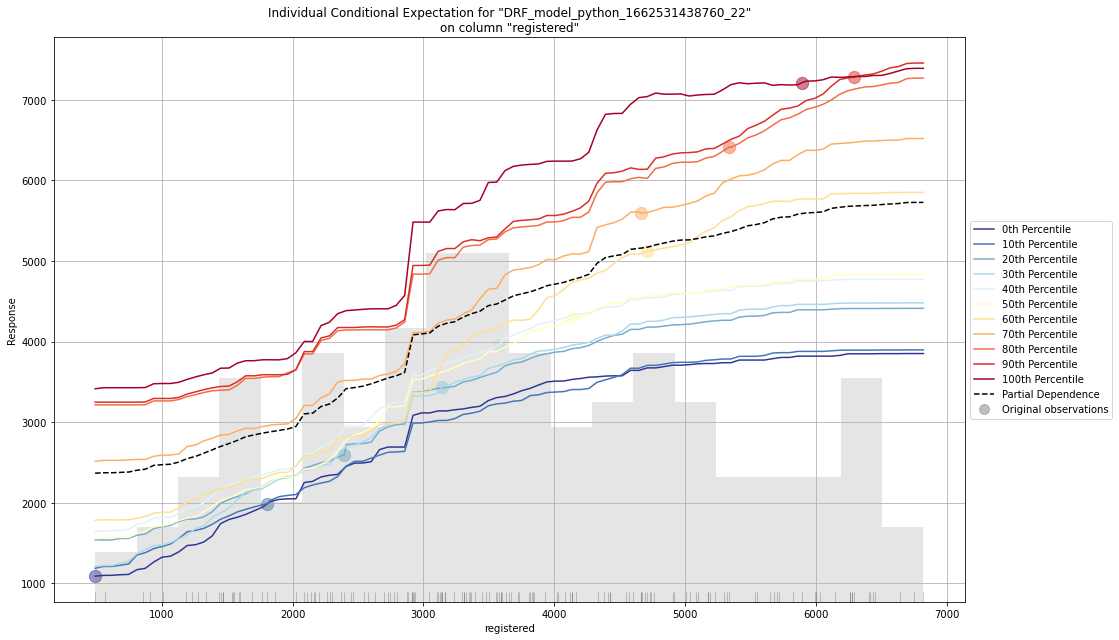

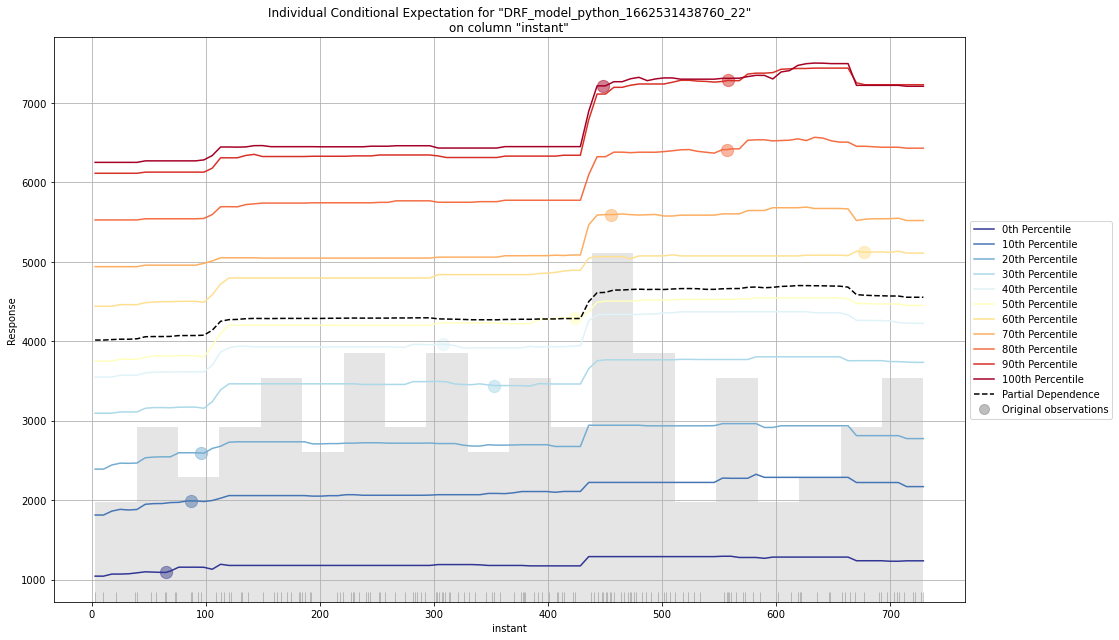

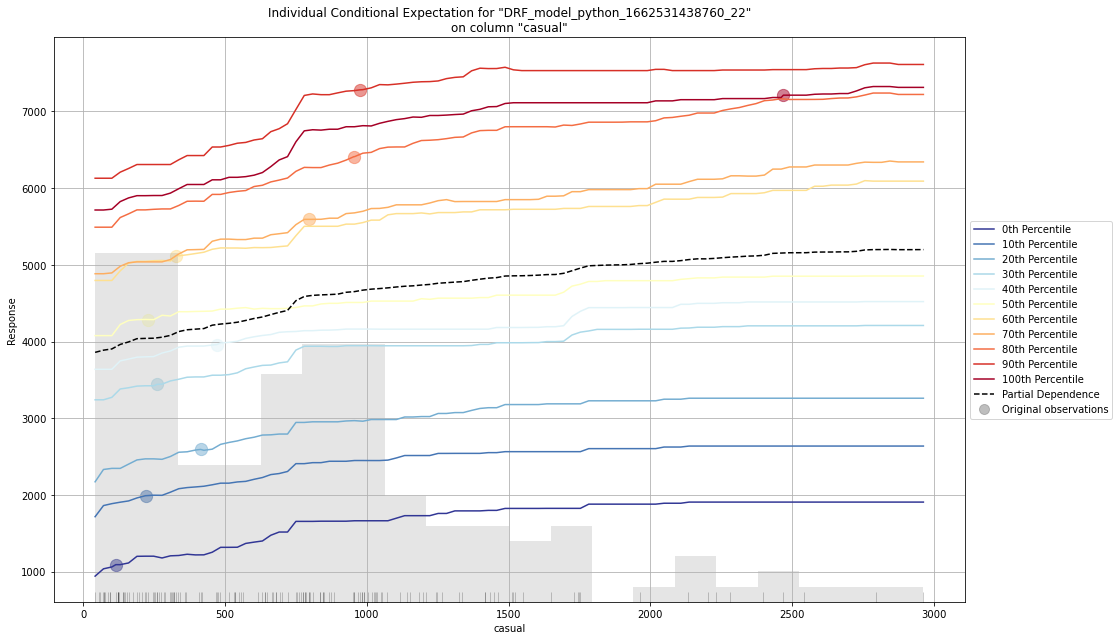

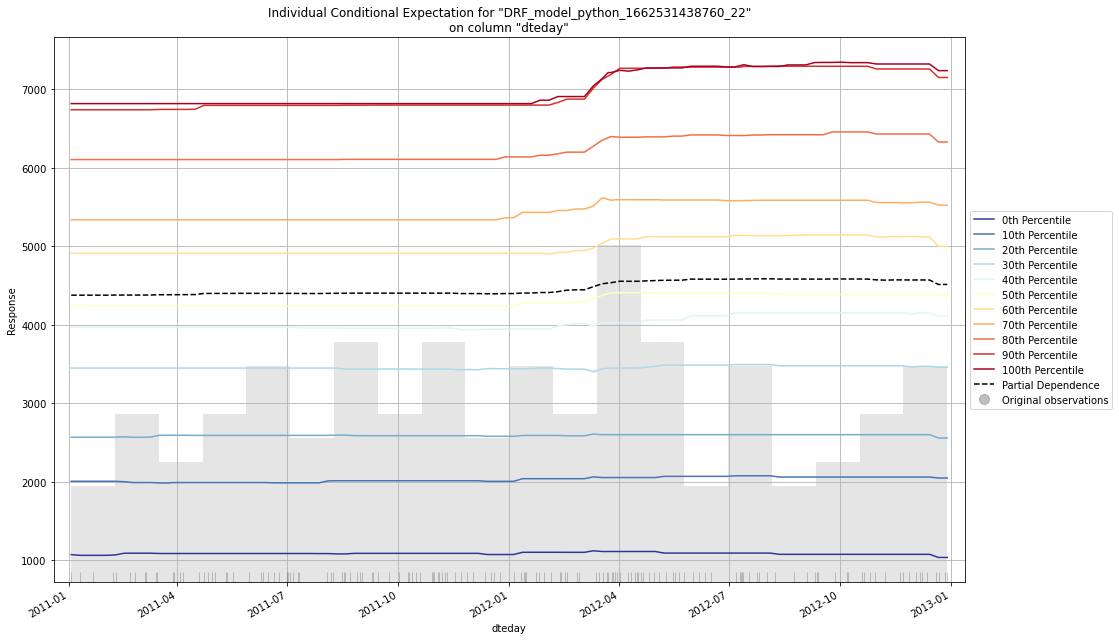

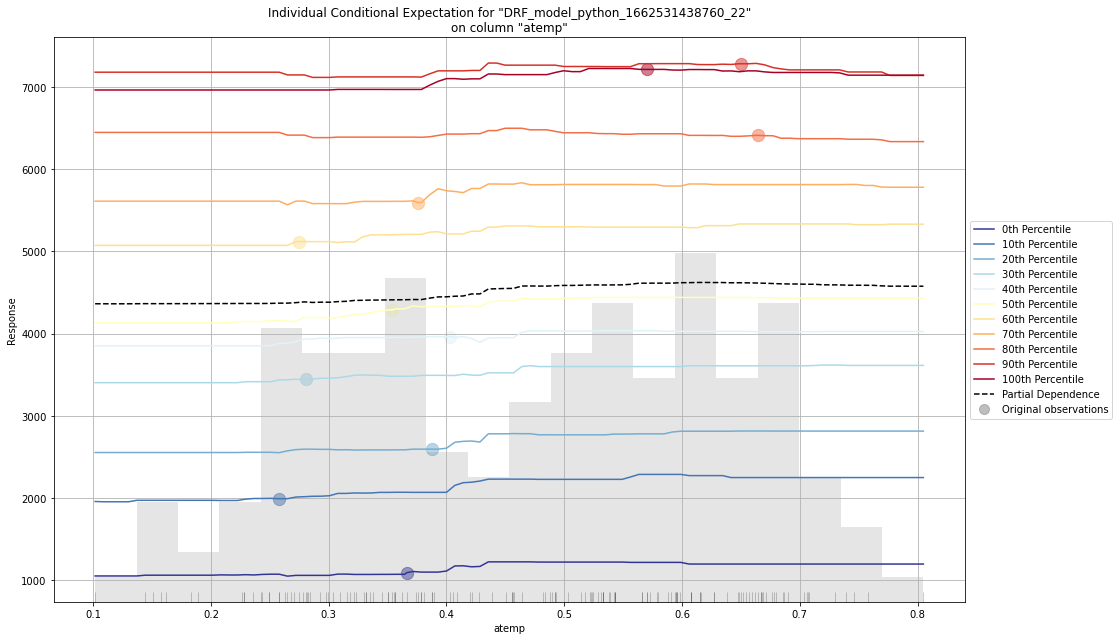

In [18]:
exp = day_drf.explain(test_day)

In [19]:
perf = day_drf.model_performance()

In [20]:
perf


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 62326.14284087241
RMSE: 249.65204353434083
MAE: 165.077141119547
RMSLE: 0.20839974594870989
Mean Residual Deviance: 62326.14284087241


In [21]:
pred1 = day_drf.predict(test_day)

pred1

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict 
 
 
 1397.74 
 1387.14 
 1481.84 
 1637.42 
 1565.3 
 1414.7 
 1537.84 
 2097.98 
 1090.4 
 2031.74

### testing model on hour dataset

In [24]:
# Run AutoML for 10 minutes
aml1 = H2OAutoML(max_runtime_secs=600, seed=1)
aml1.train(y=y, training_frame=train_hour)

AutoML progress: |
13:09:22.206: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████
13:19:09.886: GBM_lr_annealing_selection_AutoML_3_20220907_130922 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

██| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_3_20220907_130922

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1258.9476291990875
RMSE: 35.48165200775025
MAE: 24.896512727043255
RMSLE: 0.10600362528522075
R^2: 0.9996690327869583
Mean Residual Deviance: 1258.9476291990875
Null degrees of freedom: 581
Residual degrees of freedom: 578
Null deviance: 2213837175.773192
Residual deviance: 732707.5201938689
AIC: 5815.978748424268

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation 

mean            sd    cv_1_valid  \
0                     mae  7.137226e+01  5.809484e+00  7.783733e+01   
1  mean_residual_deviance  1.247567e+04  3.592655e+03  1.777188e+04   
2                     mse  1.247567e+04  3.592655e+03  1.777188e+04   
3           null_deviance  4.438386e+08  4.686818e+07  5.185790e+08   
4                      r2  9.967412e-01  6.805248e-04  9.958859e-01   
5       residual_deviance  1.458895e+06  4.542699e+05  2.132625e+06   
6                    rmse  1.107929e+02  1.583539e+01  1.333112e+02   
7                   rmsle  8.615576e-02  1.208886e-01  4.658548e-02   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  6.952254e+01  6.440047e+01  6.816872e+01  7.693224e+01  
1  1.241277e+04  9.174656e+03  9.184521e+03  1.383456e+04  
2  1.241277e+04  9.174656e+03  9.184521e+03  1.383456e+04  
3  4.447762e+08  3.909163e+08  4.240999e+08  4.408214e+08  
4  9.965095e-01  9.974034e-01  9.974725e-01  9.964347e-01  
5  1.551596e+06  1.009212e+06  1.065404e+06  1.535636e+06  
6  1.114126e+02  9.578442e+01  9.583591e+01  1.176204e+02  
7  2.936268e-02  2.132209e-02  3.171847e-02  3.017901e-01

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_4_AutoML_3_20220907_130922 112.153 12578.3 71.201 0.135255 12578.3 131 0.040794 StackedEnsemble 
 GBM_grid_1_AutoML_3_20220907_130922_model_170 116.614 13598.9 72.5635 0.135252 13598.9 456 0.022113 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_119 118.467 14034.3 72.1934 0.133282 14034.3 543 0.025207 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_144 119.997 14399.2 75.3739 0.134049 14399.2 617 0.027906 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_160 125.164 15666 76.854 0.130777 15666 486 0.032489 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_130 128.745 16575.2 87.5051 0.141222 16575.2 324 0.016242 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_12 129.436 16753.7 81.1774 0.14207 16753.7 444 0.021597 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_58 129.673 16815.1 82.1813 0.136208 16815.1 1331 0.028942 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_32 134.593 18115.3 85.4334 0.155214 18115.3 487 0.02582 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_42 135.066 18242.9 90.5244 0.152135 18242.9 355 0.020614 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_112 135.286 18302.3 86.8393 0.16457 18302.3 451 0.02315 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_98 136.104 18524.4 88.0104 0.155452 18524.4 503 0.028021 GBM 
 StackedEnsemble_BestOfFamily_5_AutoML_3_20220907_130922 137.219 18829 90.5517 0.153147 18829 1155 0.049753 StackedEnsemble 
 GBM_grid_1_AutoML_3_20220907_130922_model_181 137.609 18936.2 84.6463 0.157829 18936.2 487 0.019056 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_135 139.291 19401.9 89.6327 0.160469 19401.9 421 0.029253 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_120 139.333 19413.8 86.556 0.142031 19413.8 448 0.018657 GBM 
 GBM_grid_1_AutoML_3_20220907_130922_model_5 140.643 19780.4 88.0981 0.145773 19780.4 493 0.036455 GBM 
 StackedEnsemble_AllModels_1_AutoML_3_20220907_130922 141.617 20055.3 90.5924 0.17251 20055.3 143 0.05361 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_3_20220907_130922 142.045 20176.7 91.0217 0.172198 20176.7 153 0.058569 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_3_20220907_130922 142.201 20221.2 91.5813 0.171904 20221.2 140 0.030556 StackedEnsemble

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

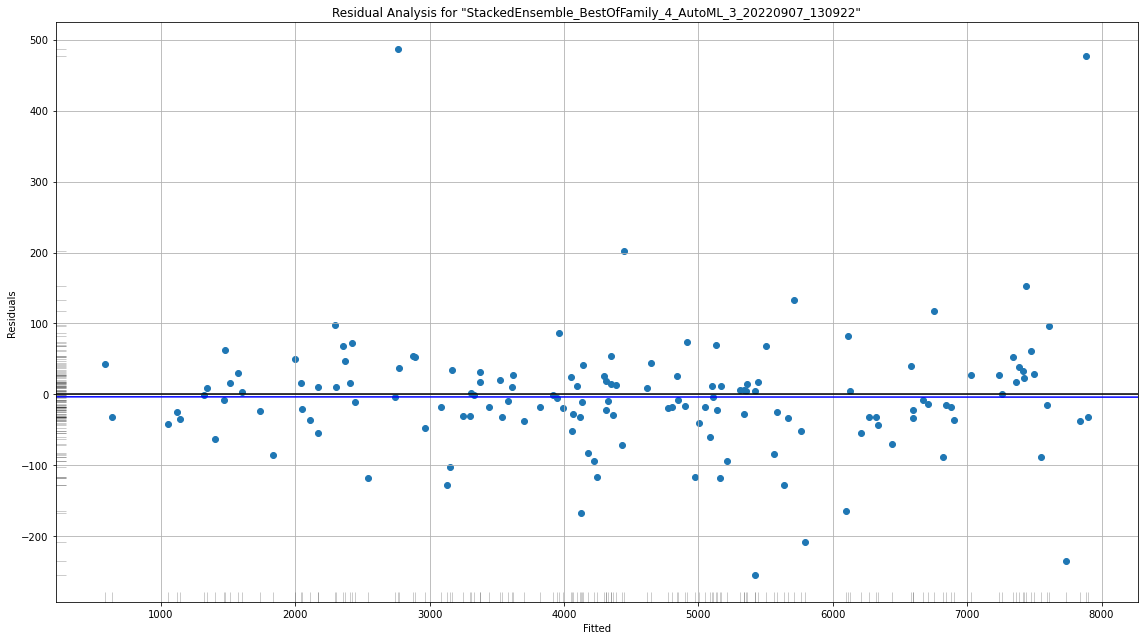

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

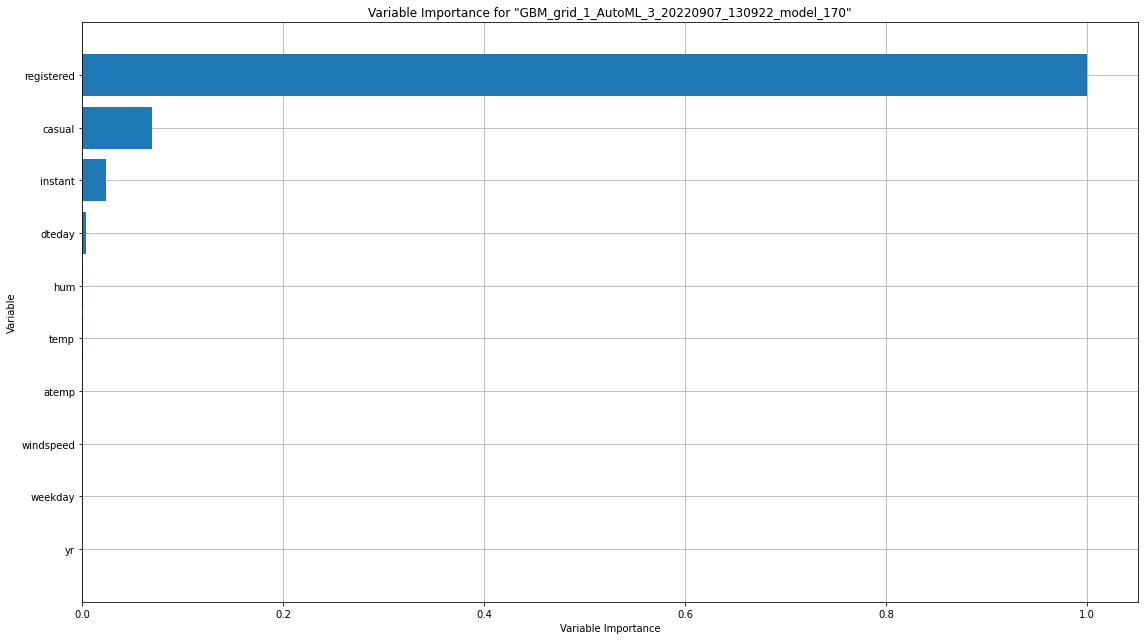

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

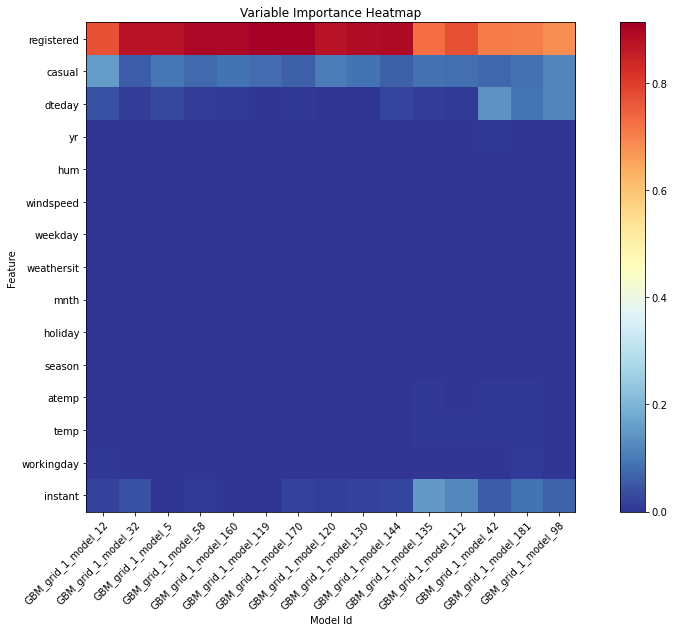

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

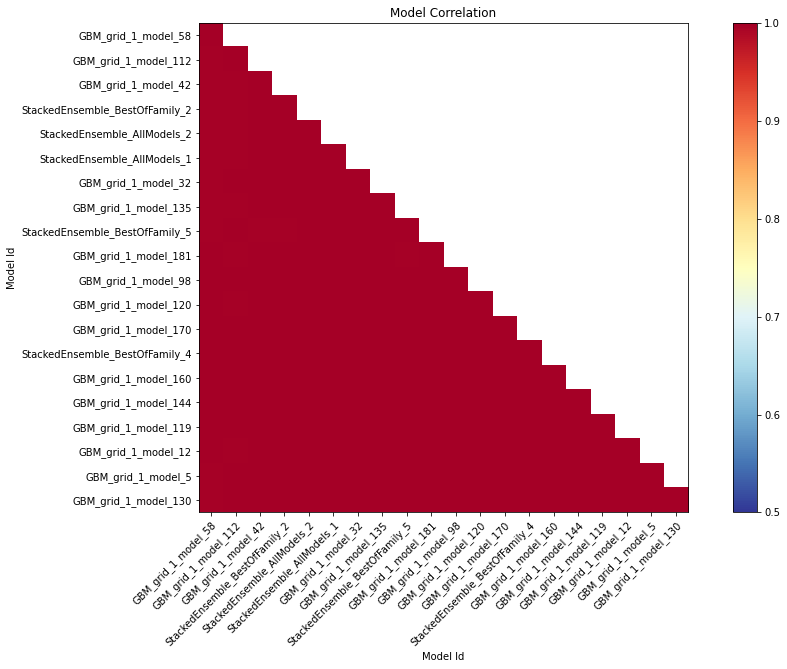

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

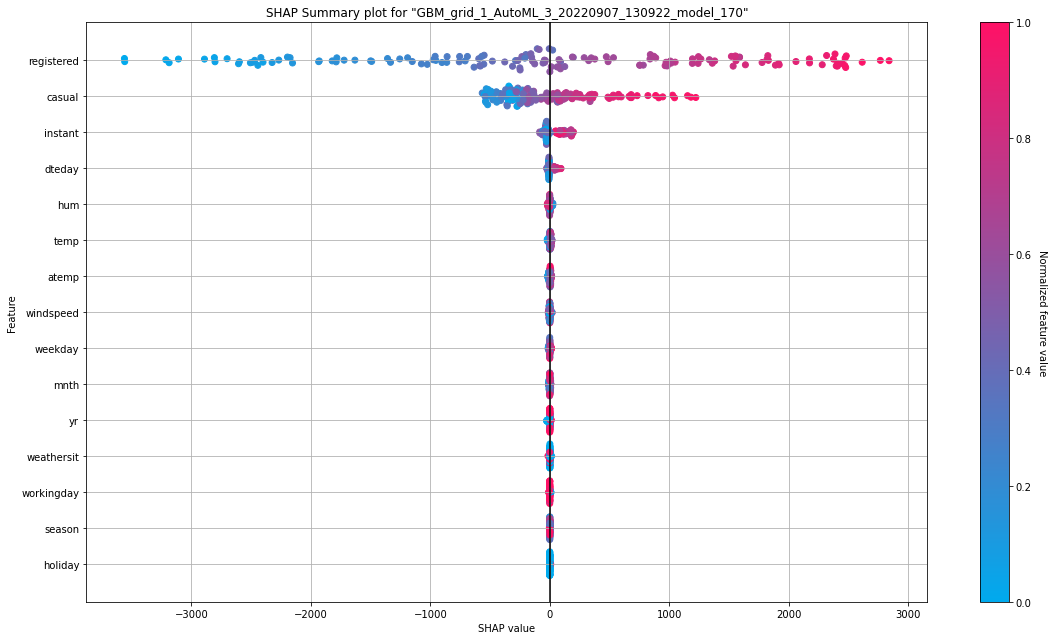

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

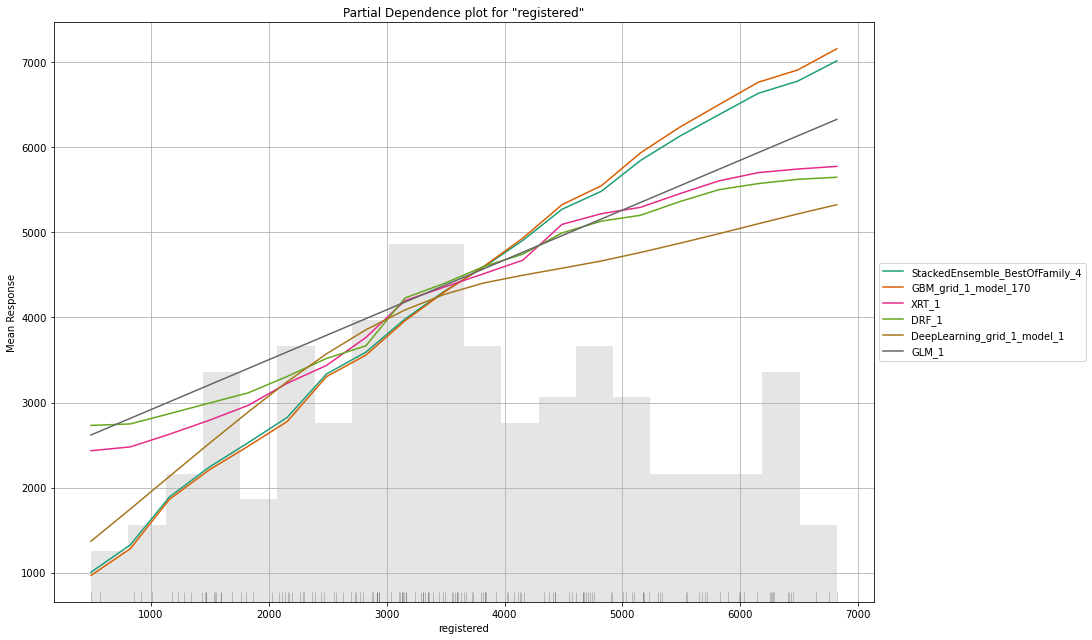

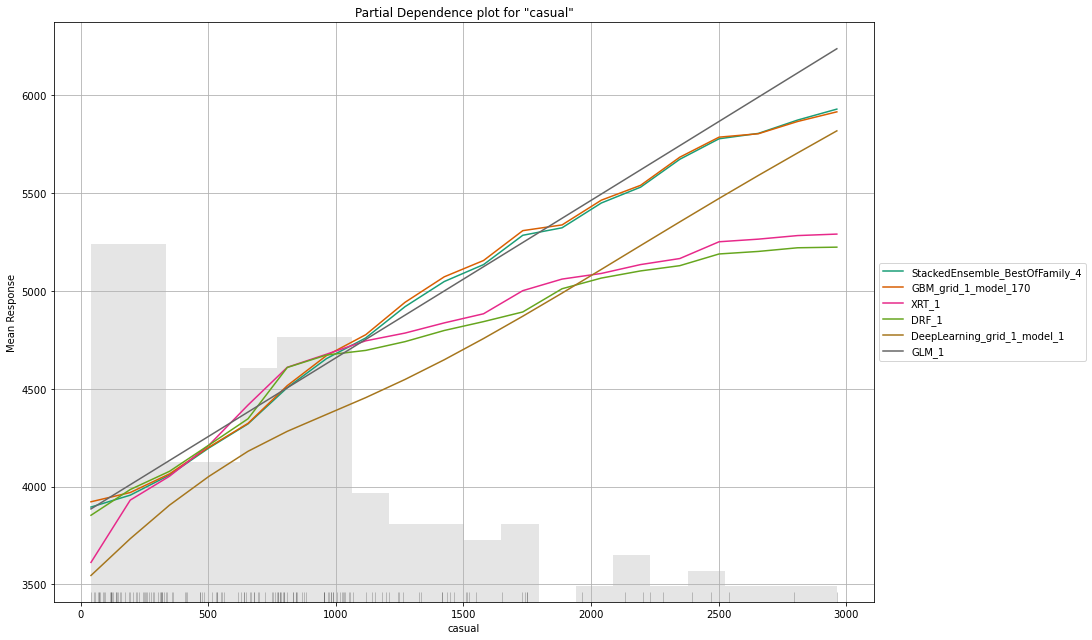

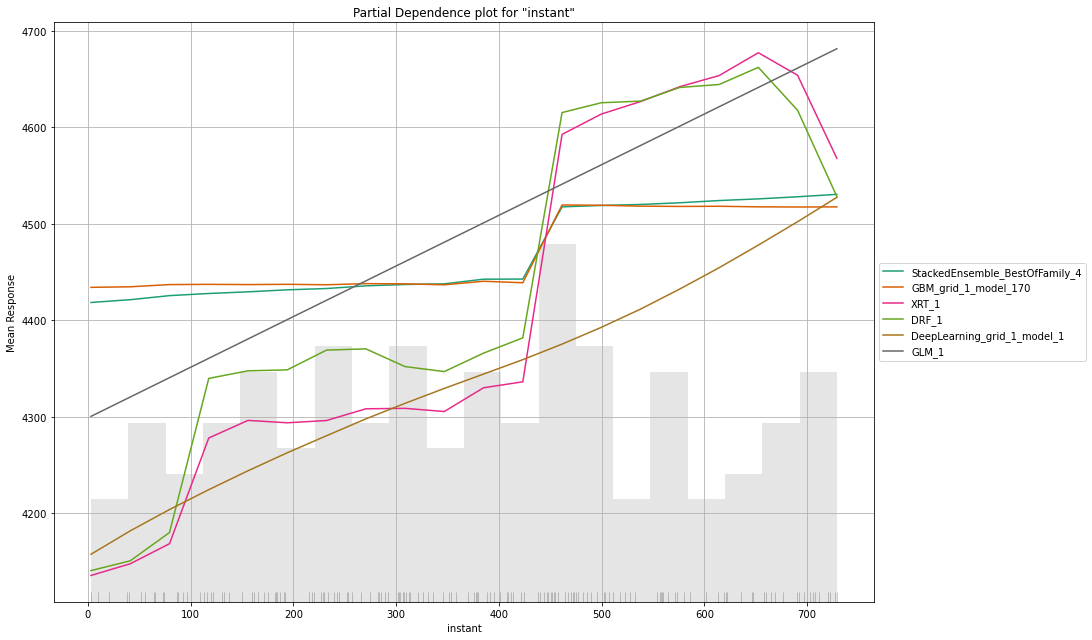

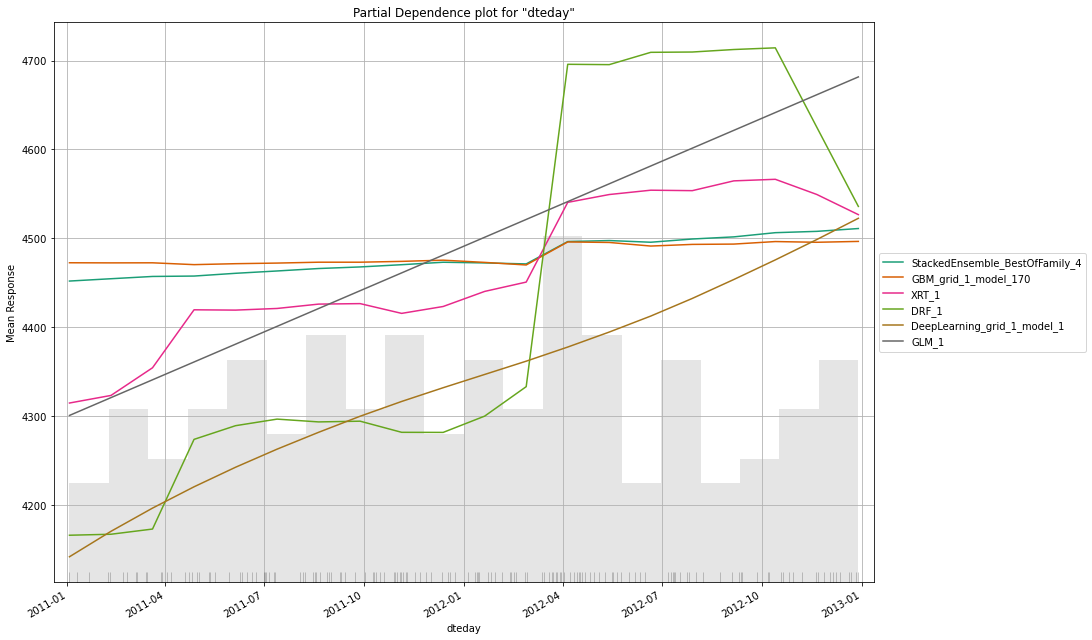

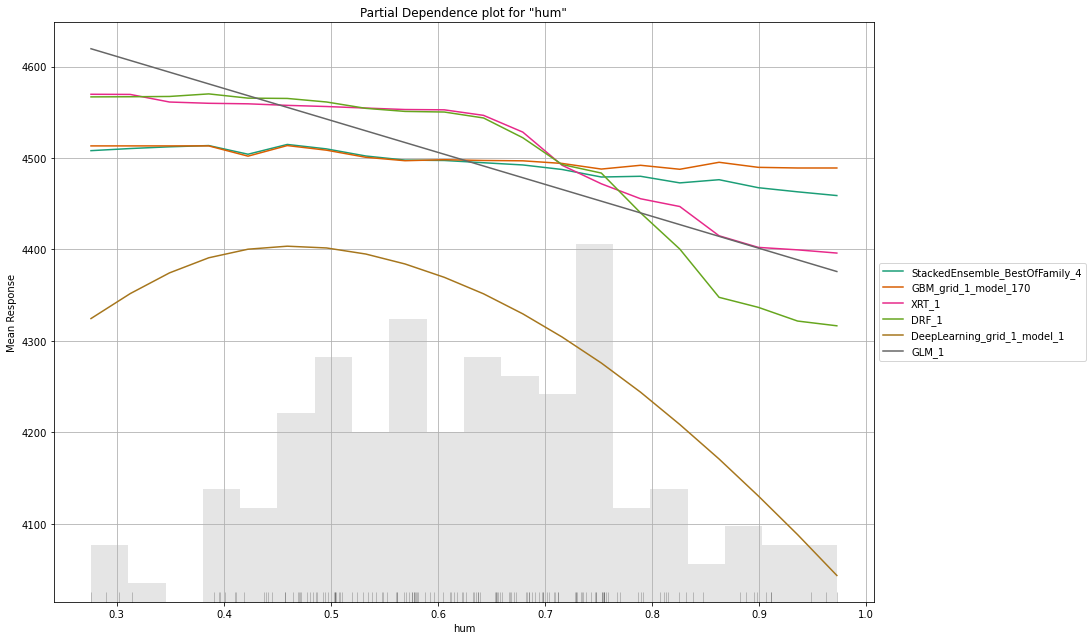

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

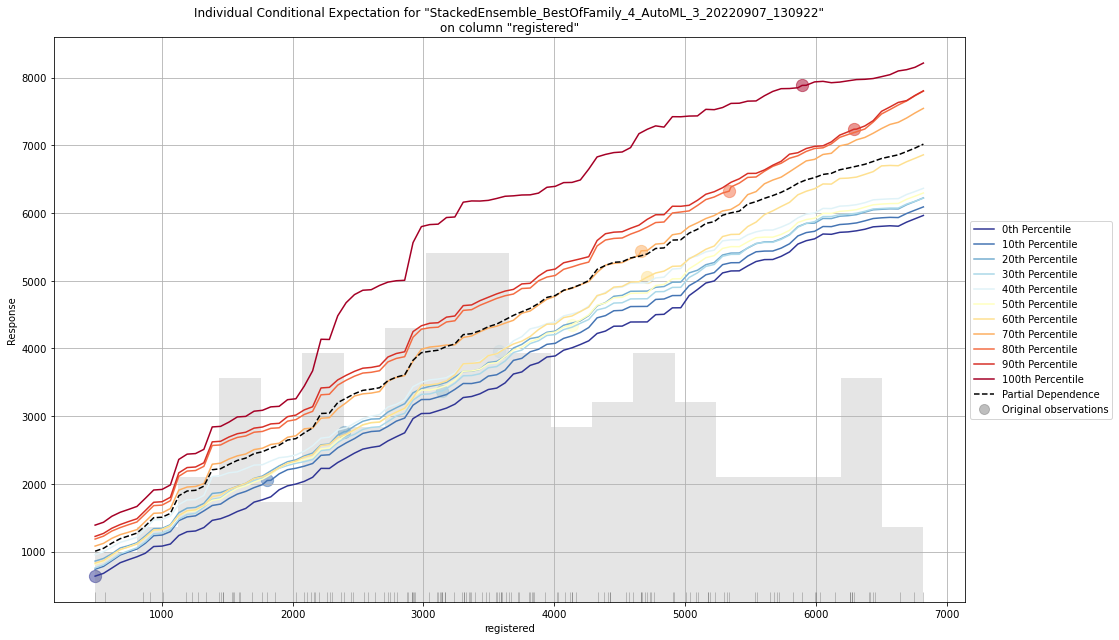

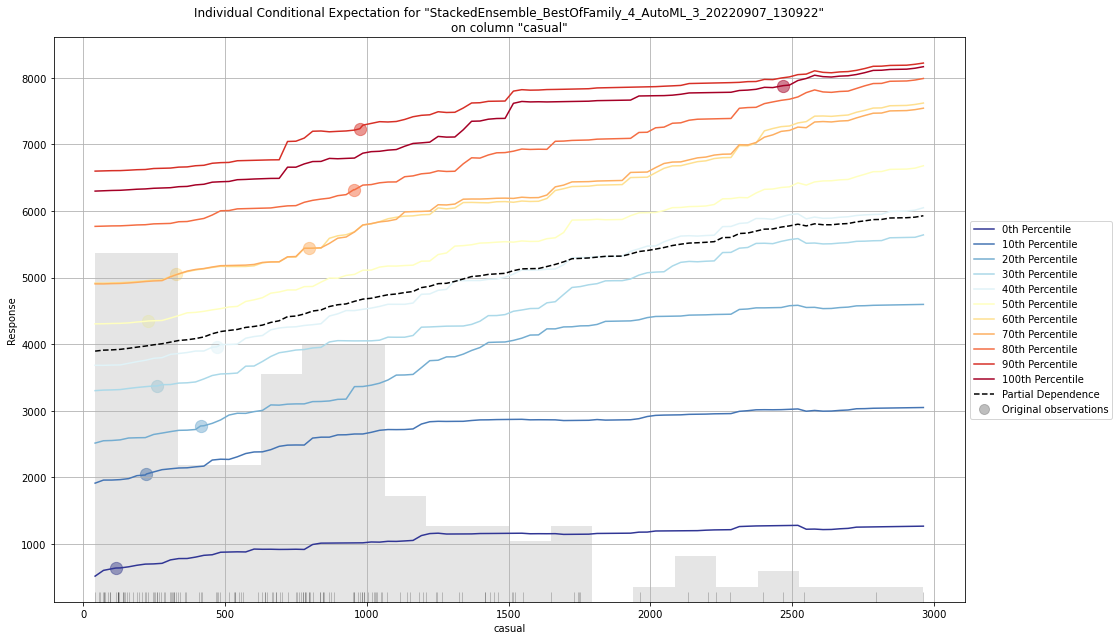

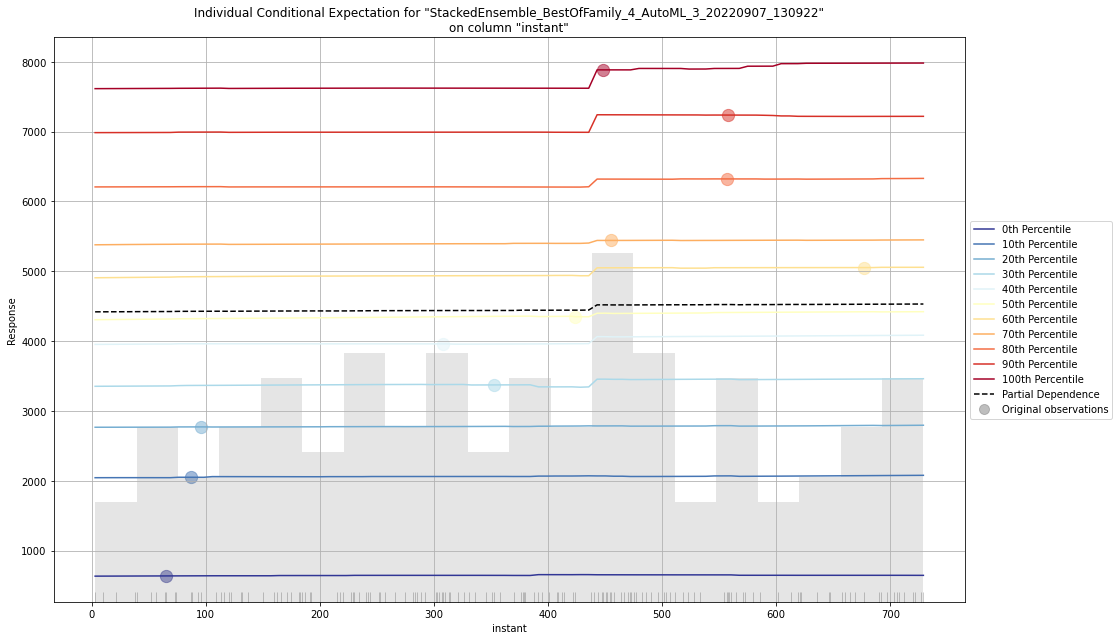

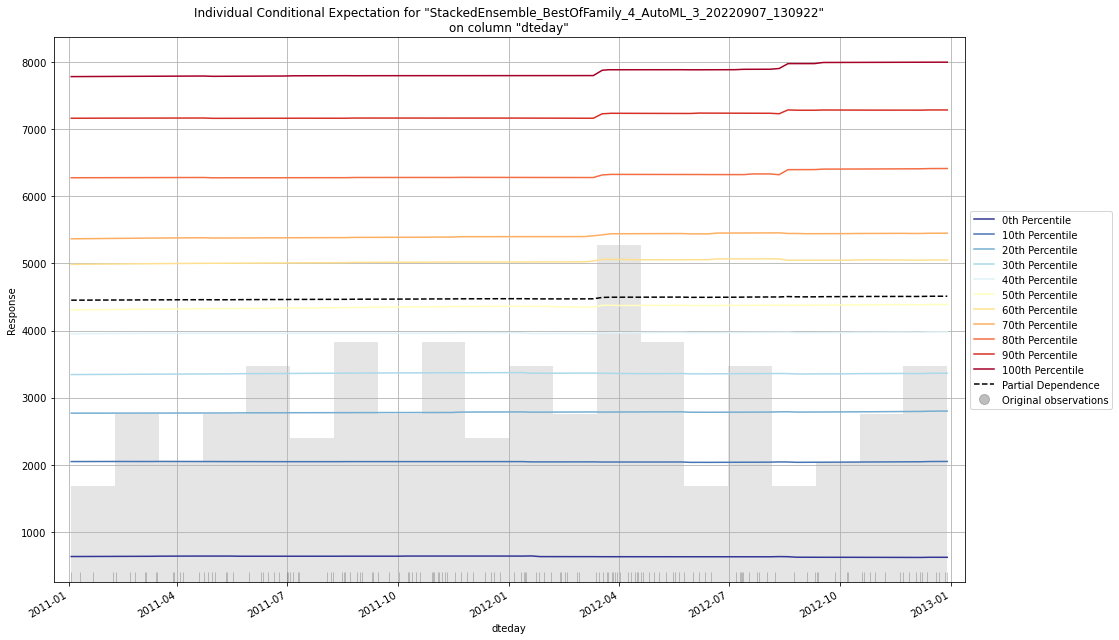

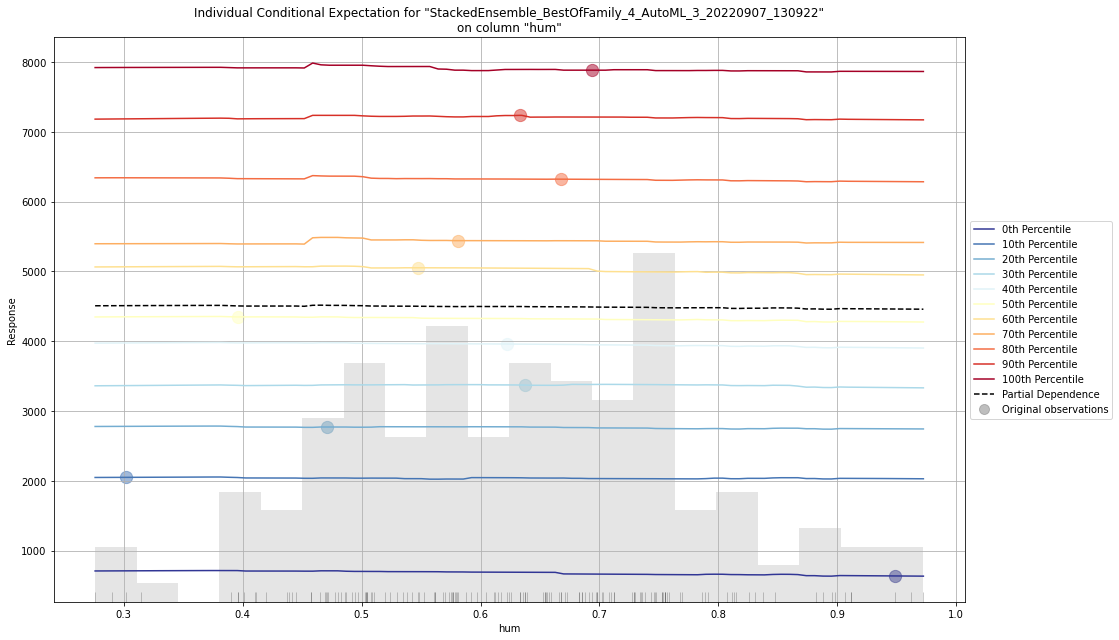

In [25]:
# Explain leader model & compare with all AutoML models
exa1 = aml1.explain(test_hour)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

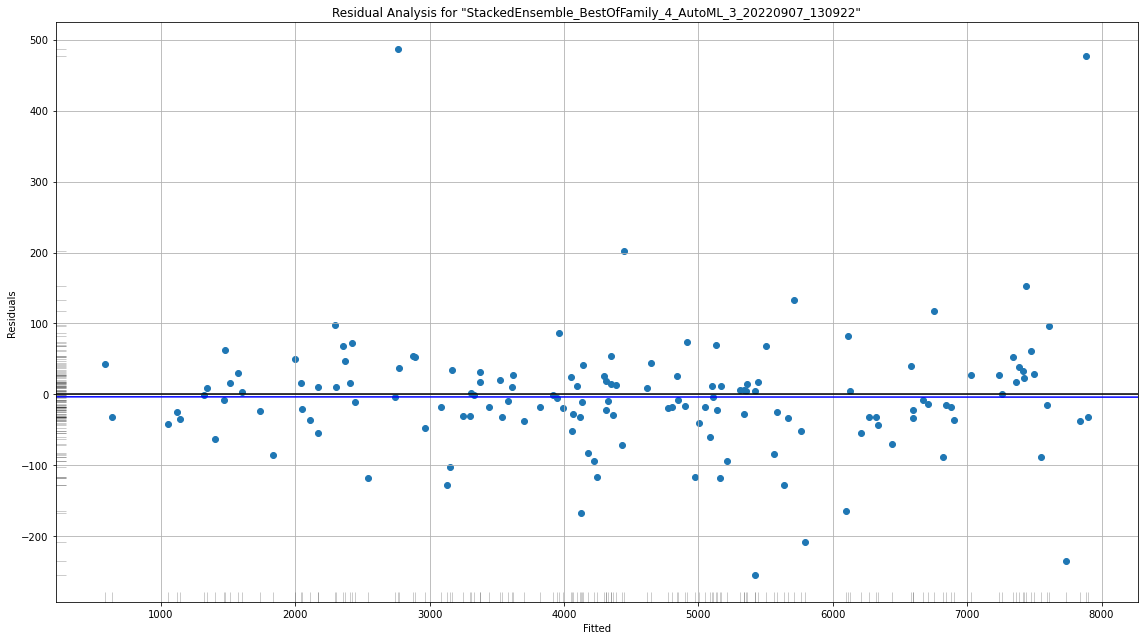

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

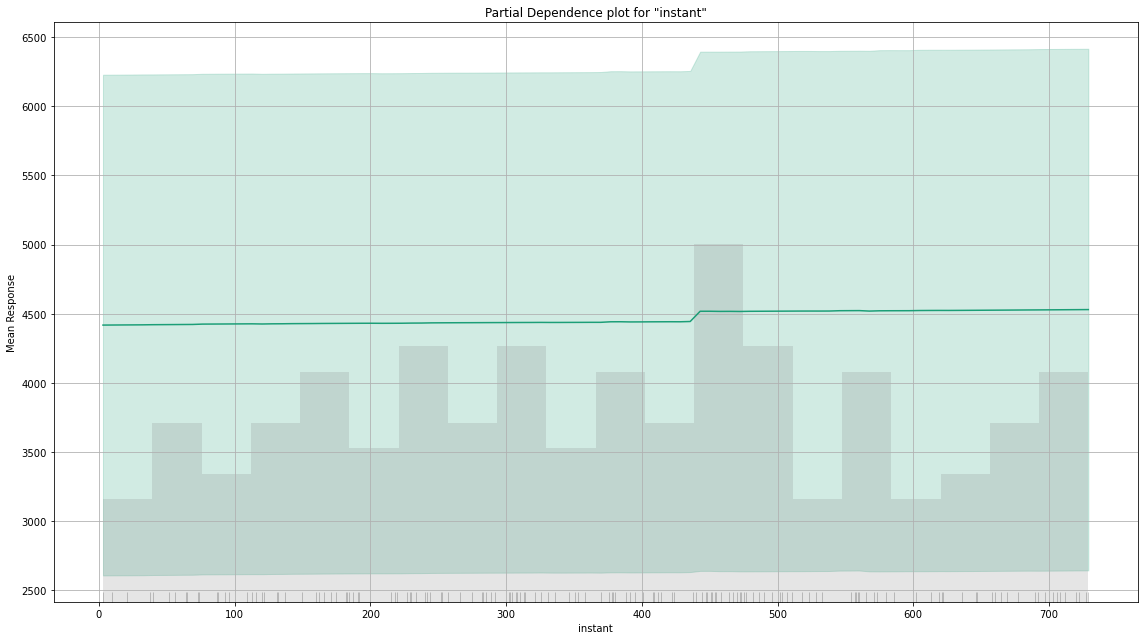

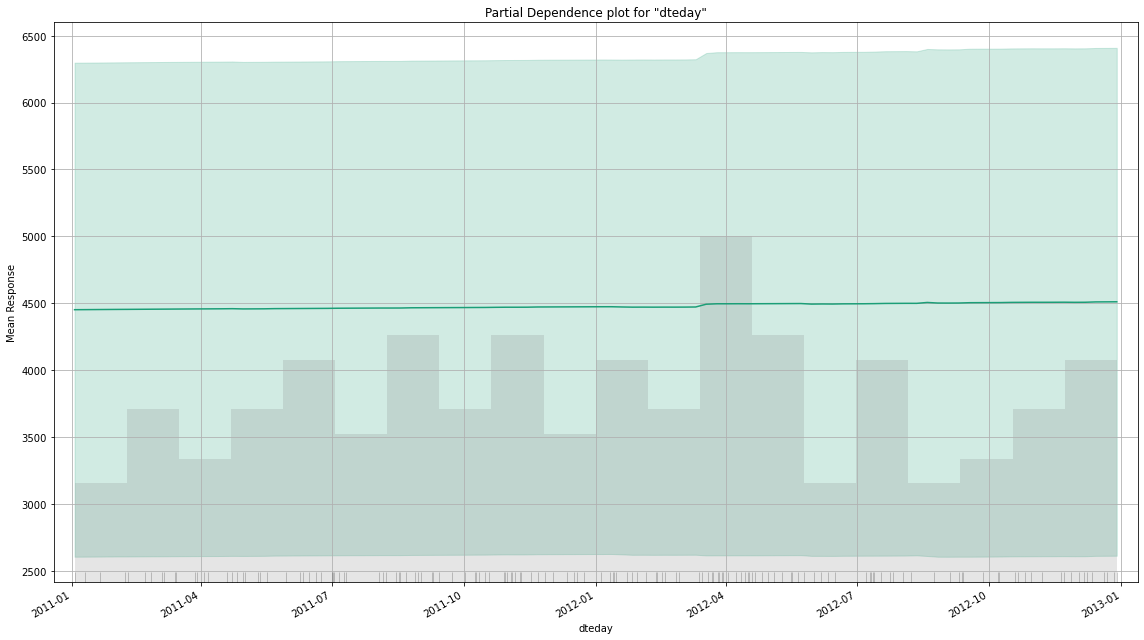

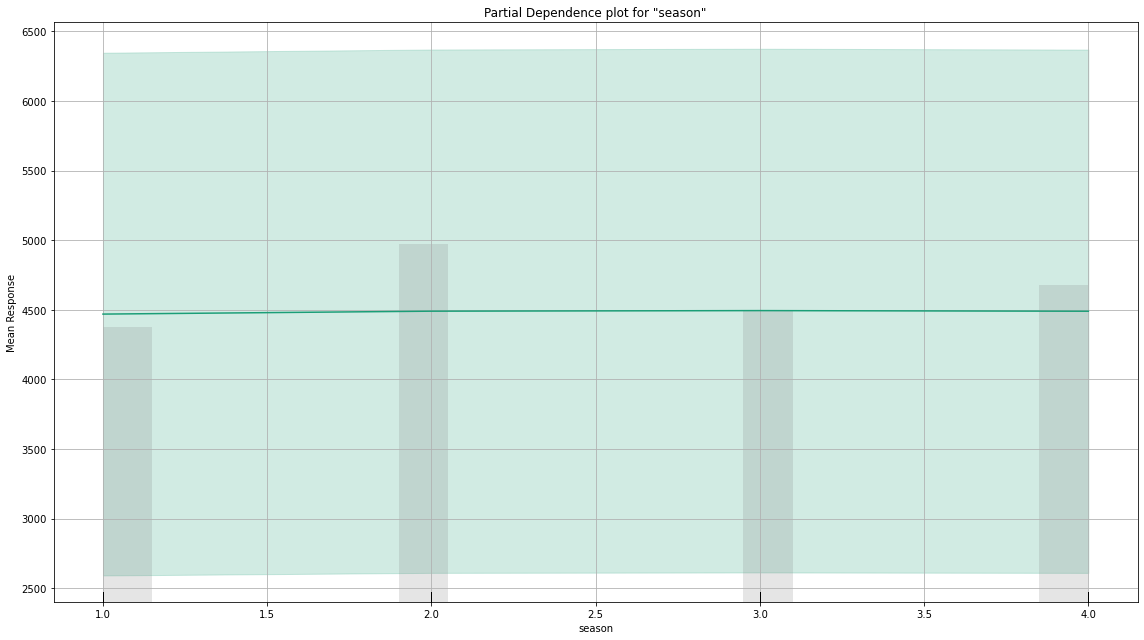

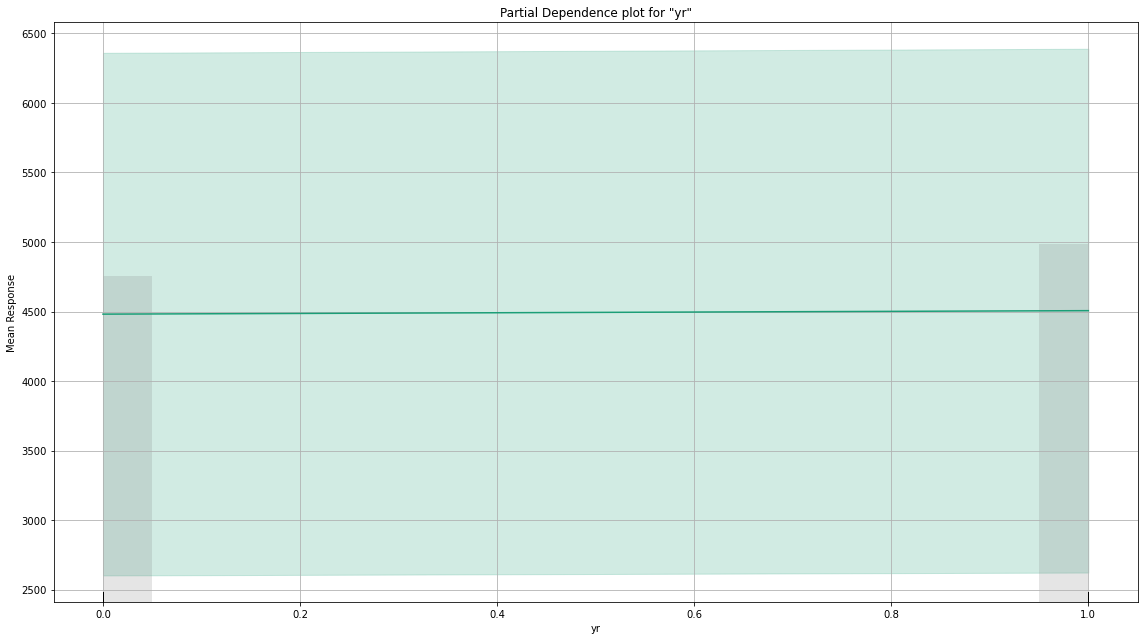

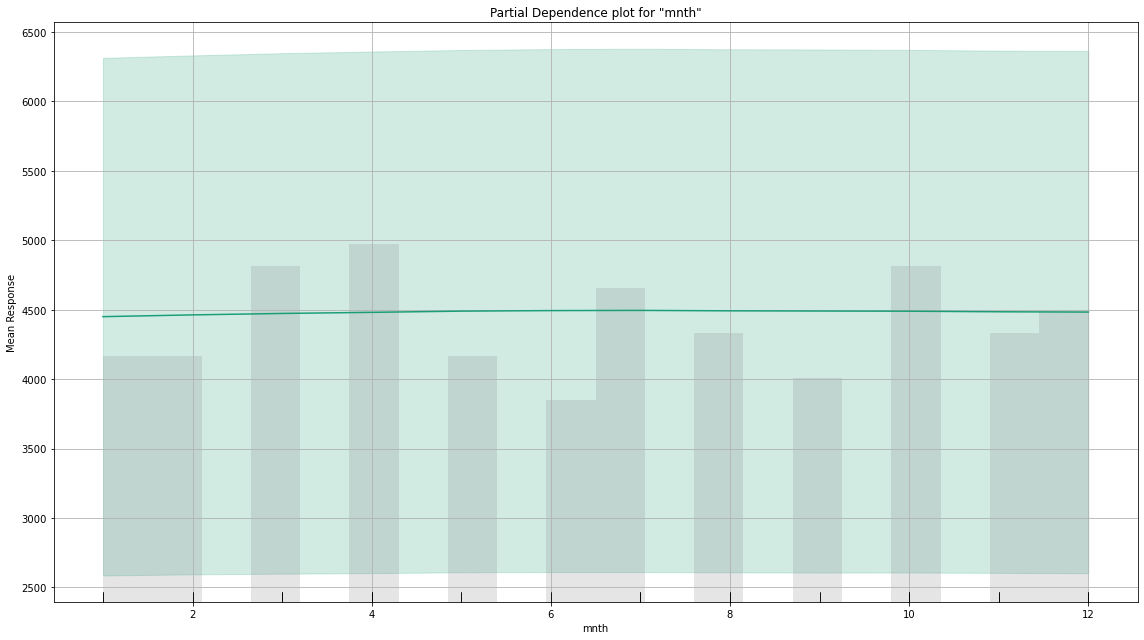

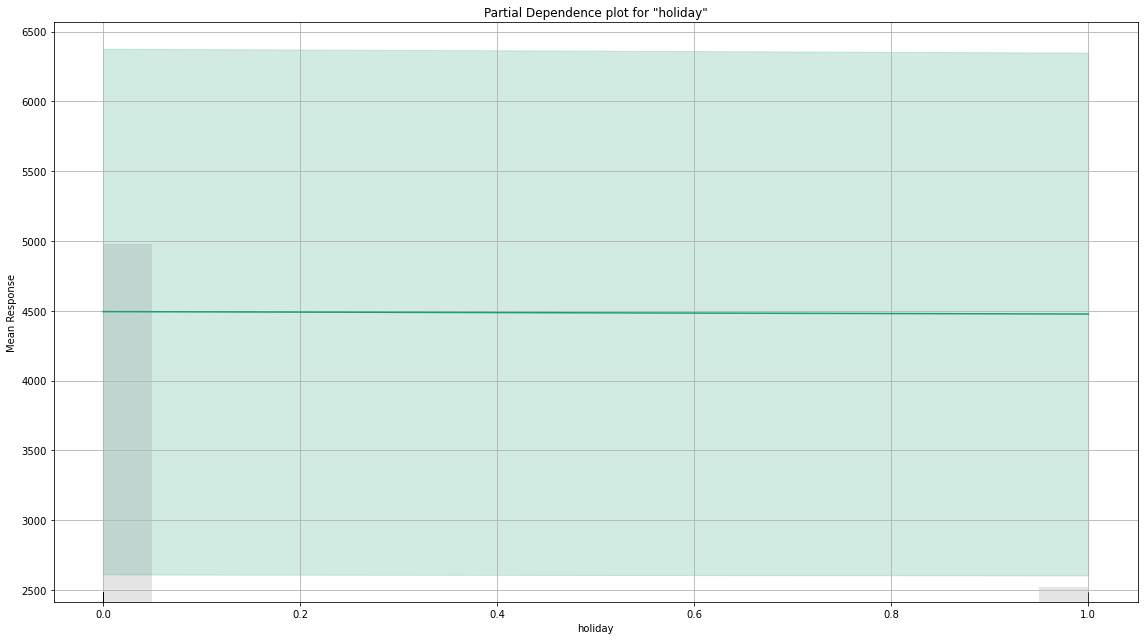

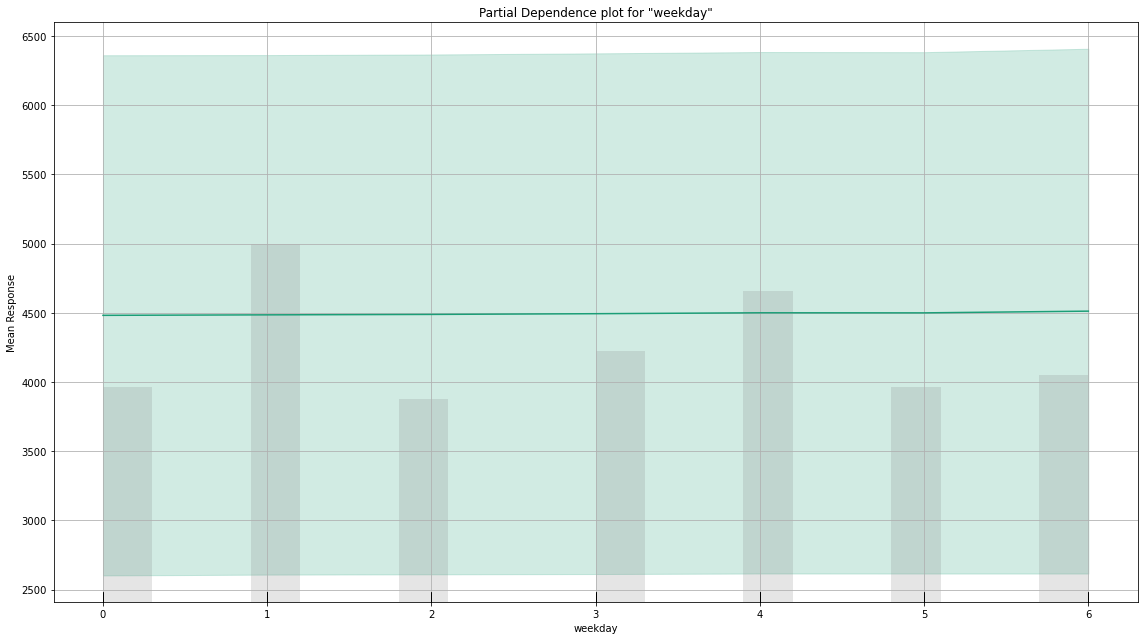

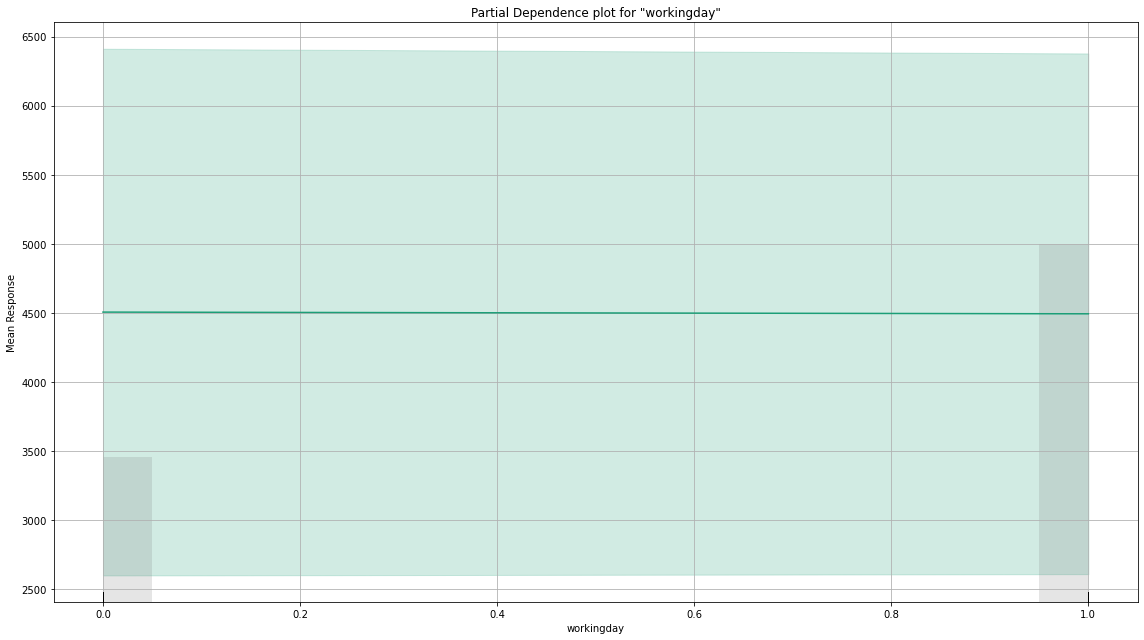

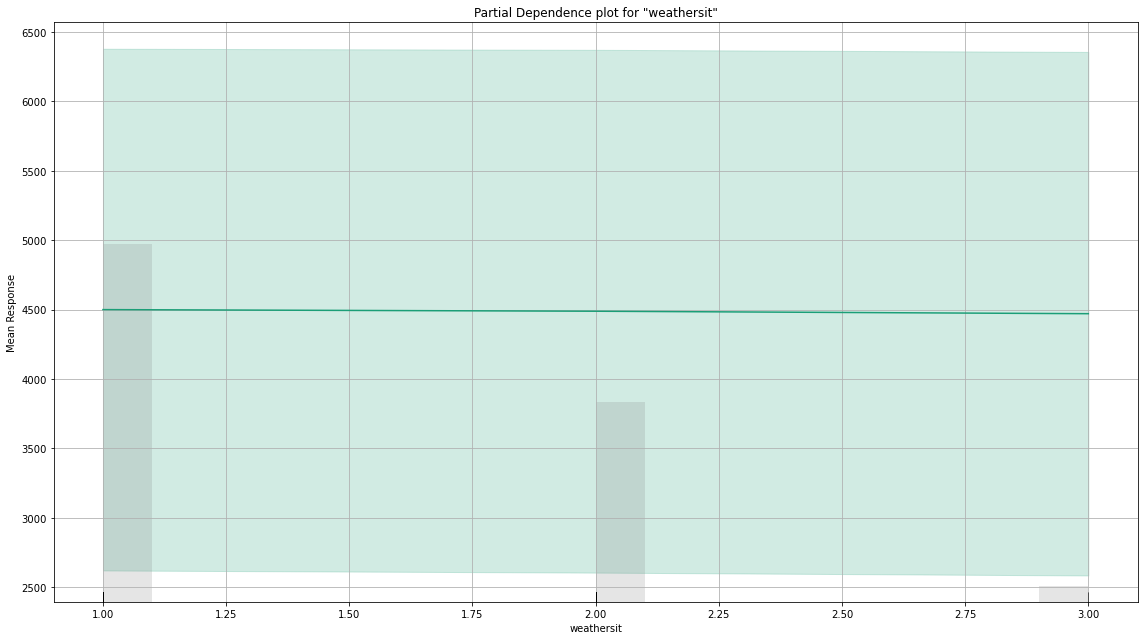

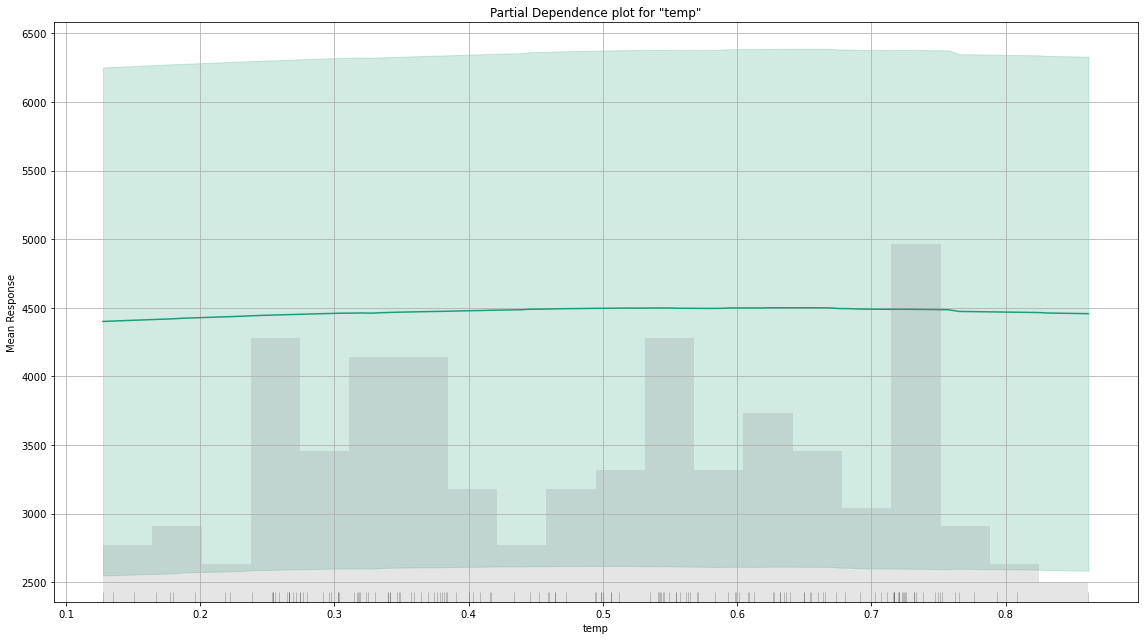

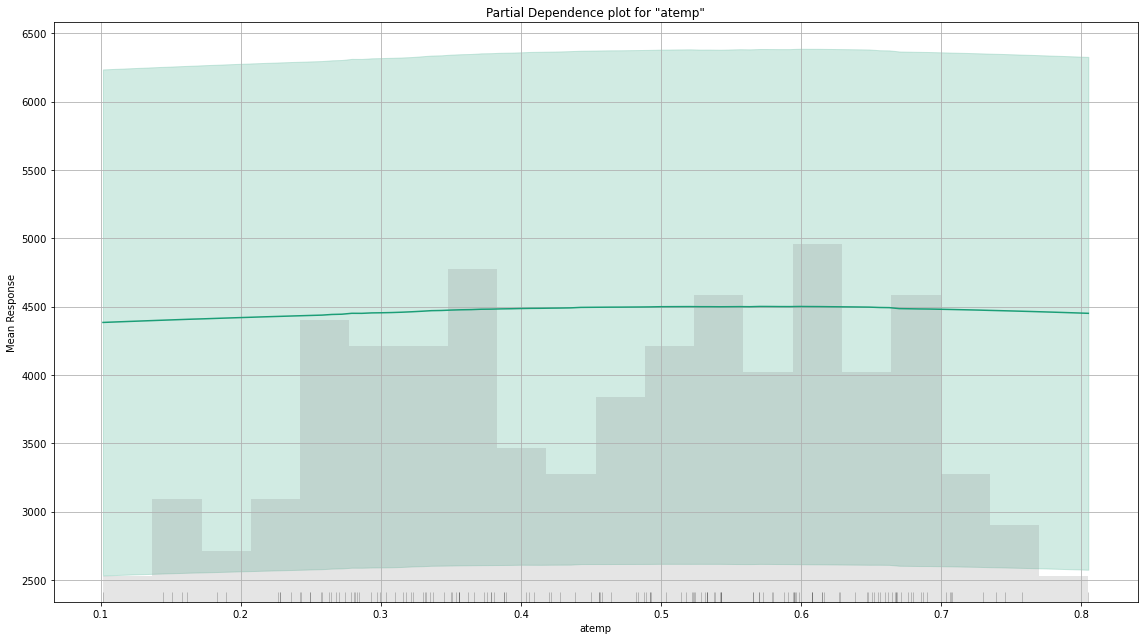

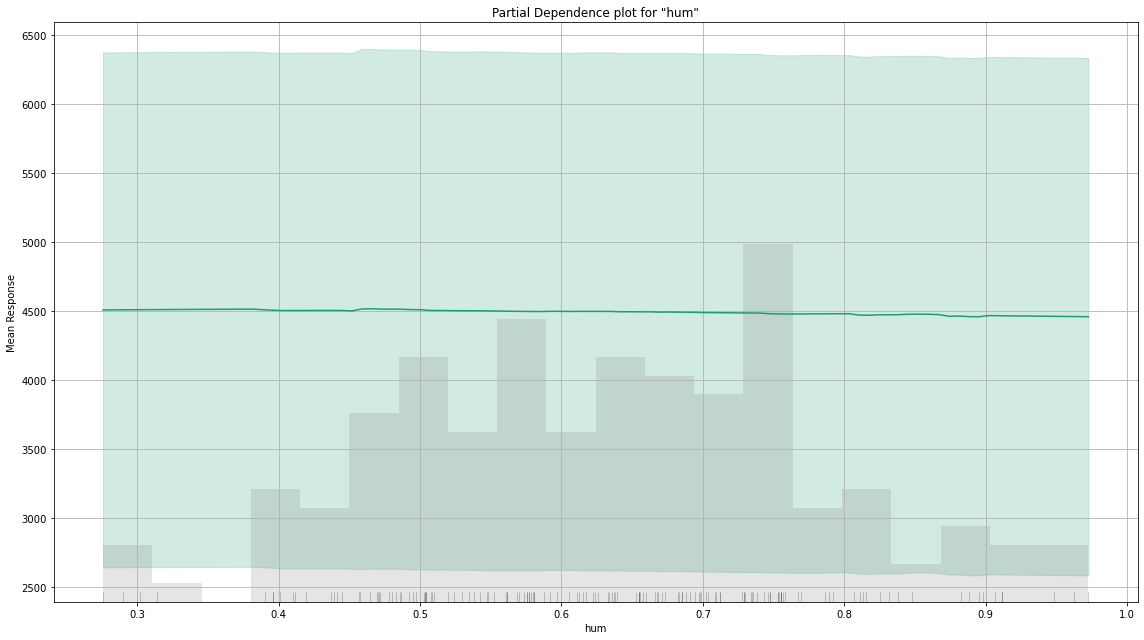

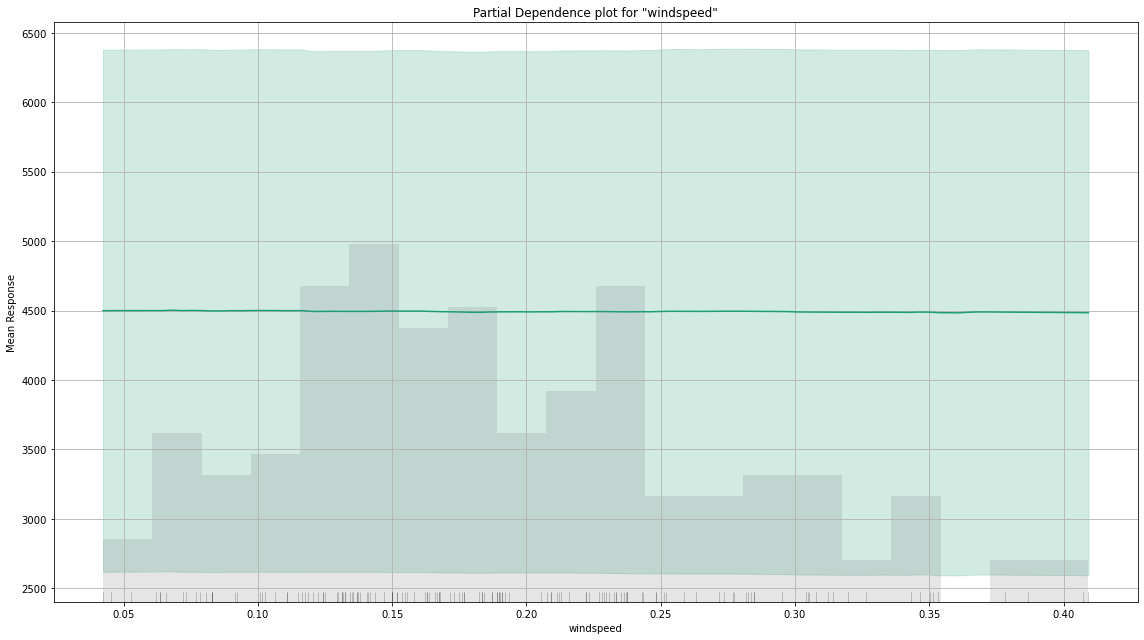

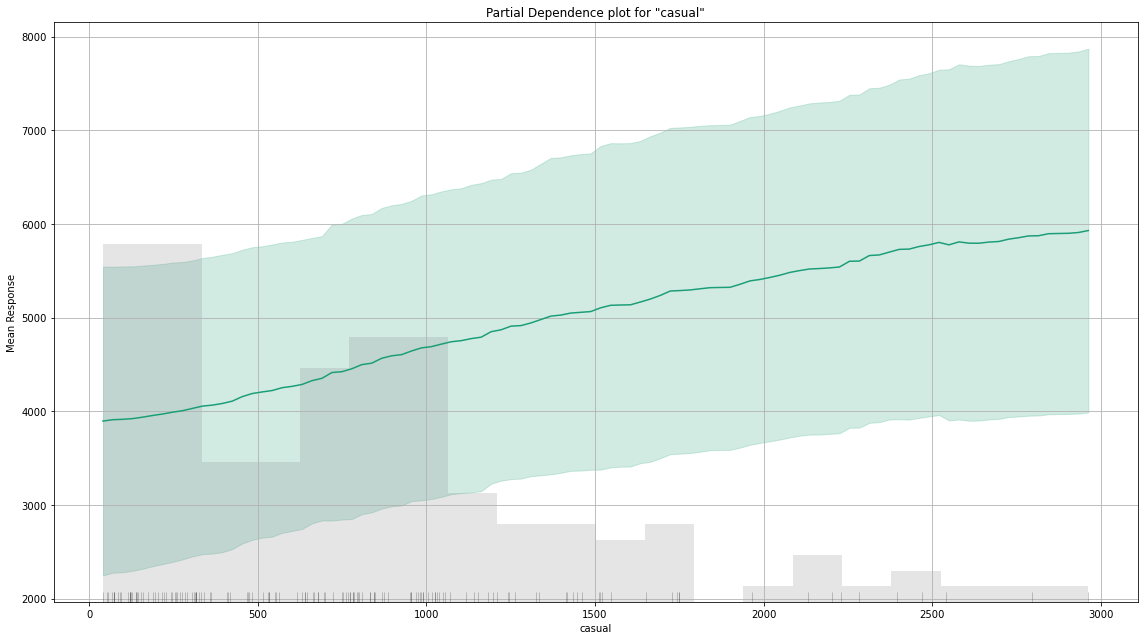

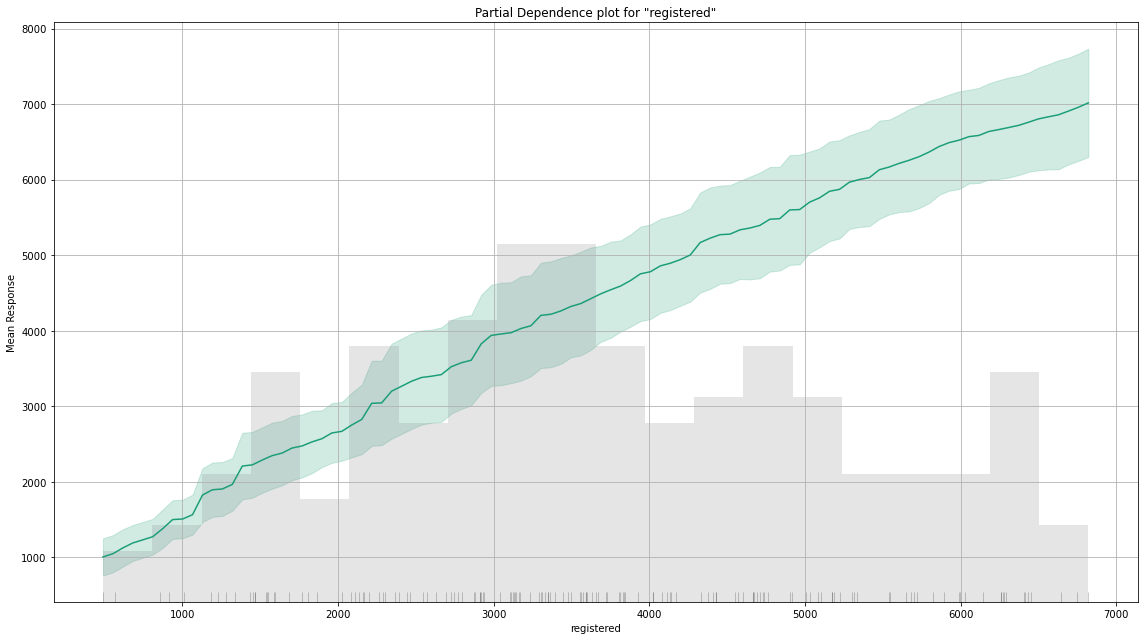

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

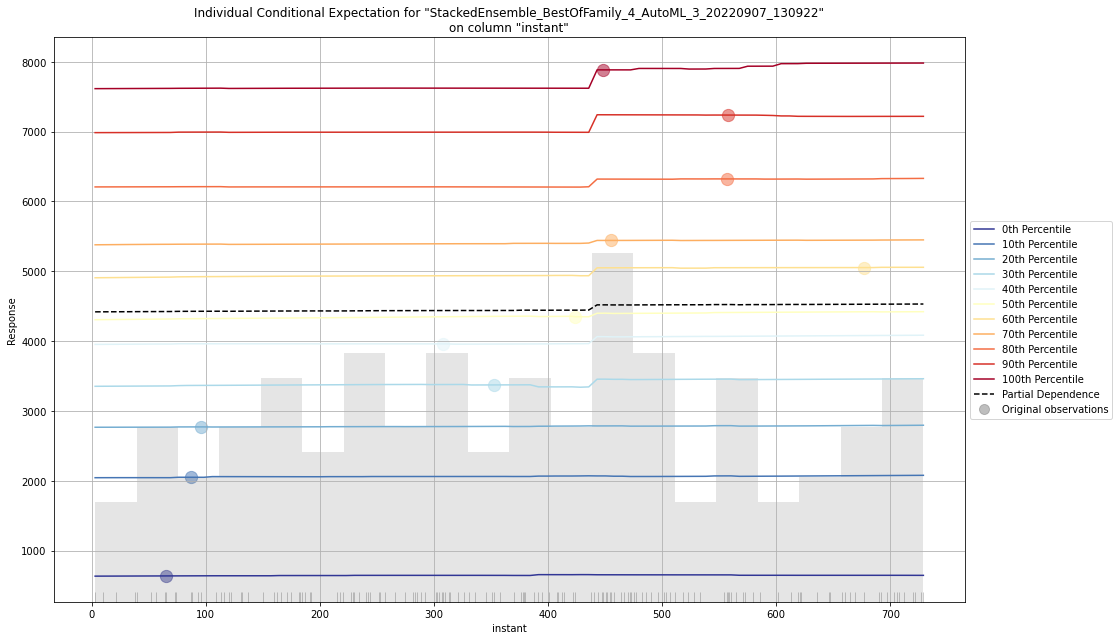

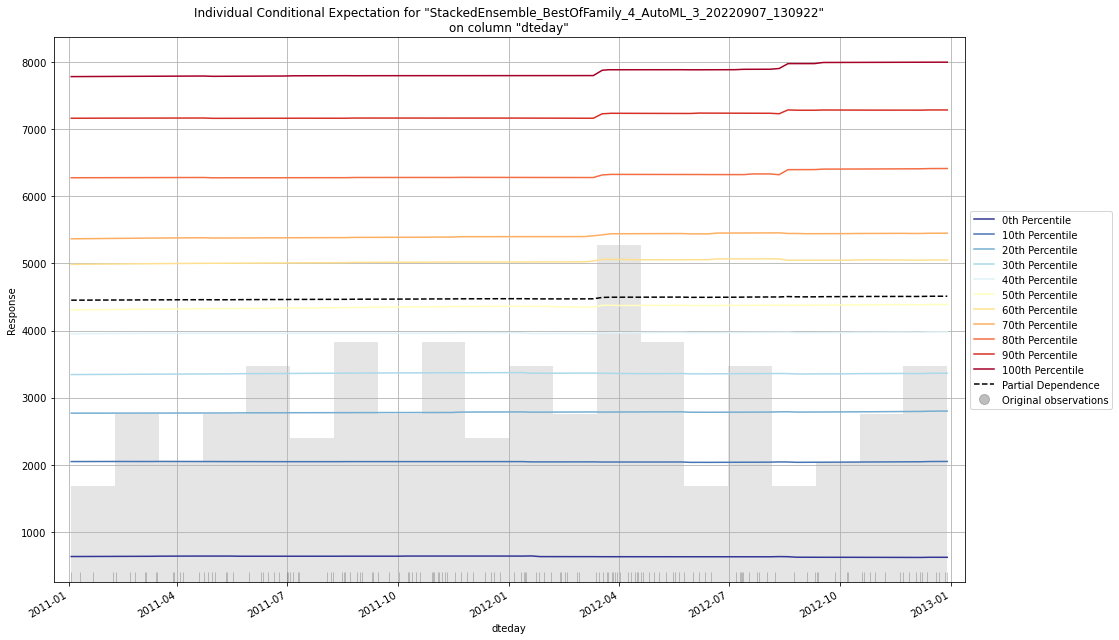

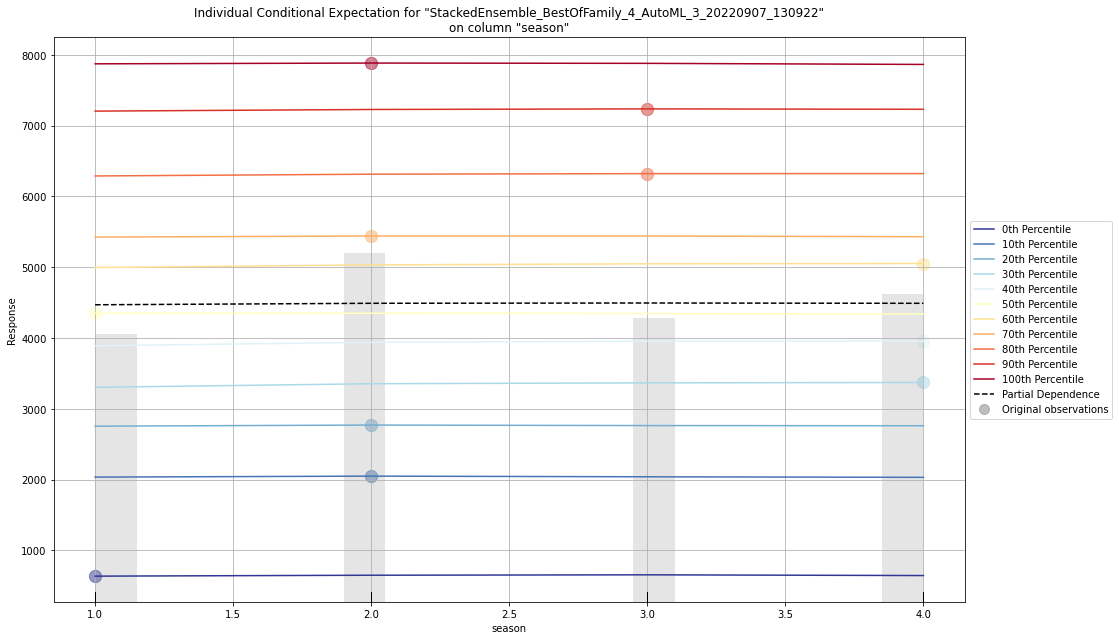

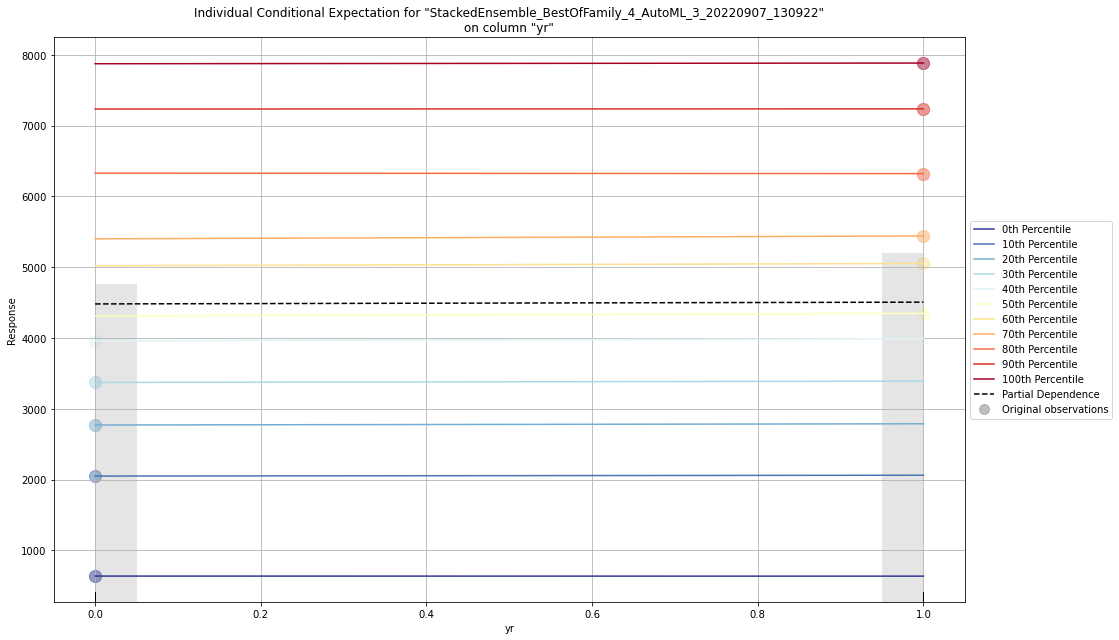

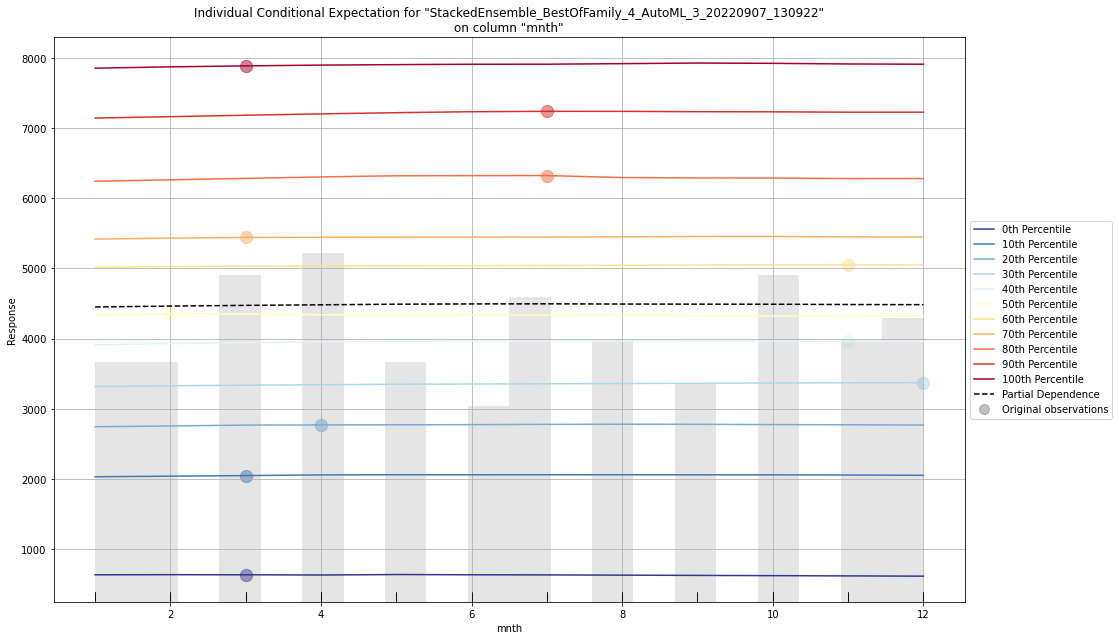

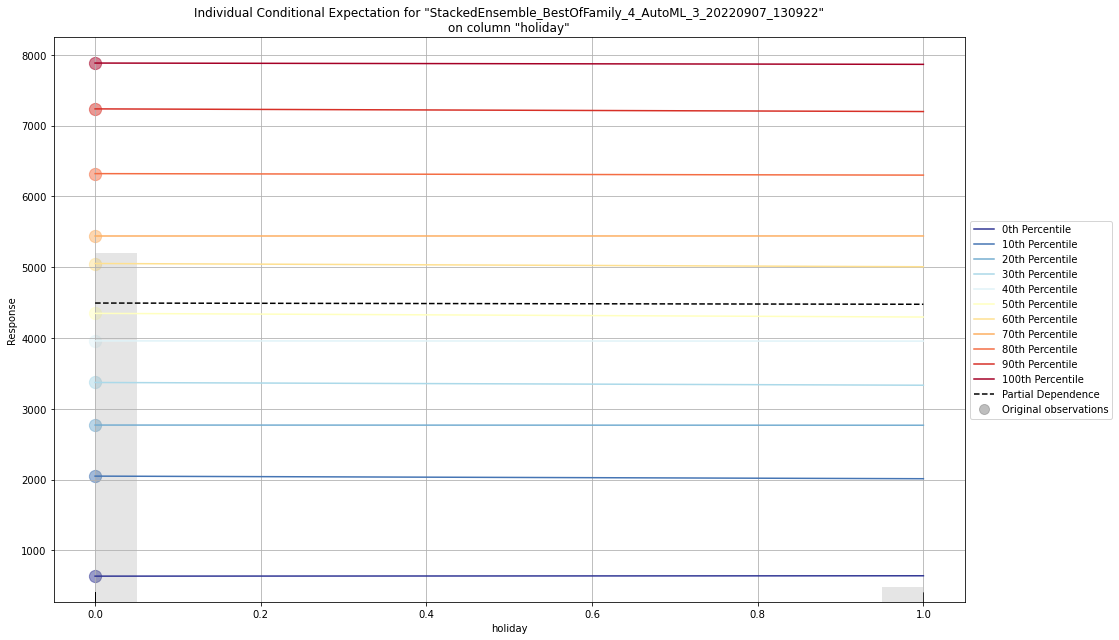

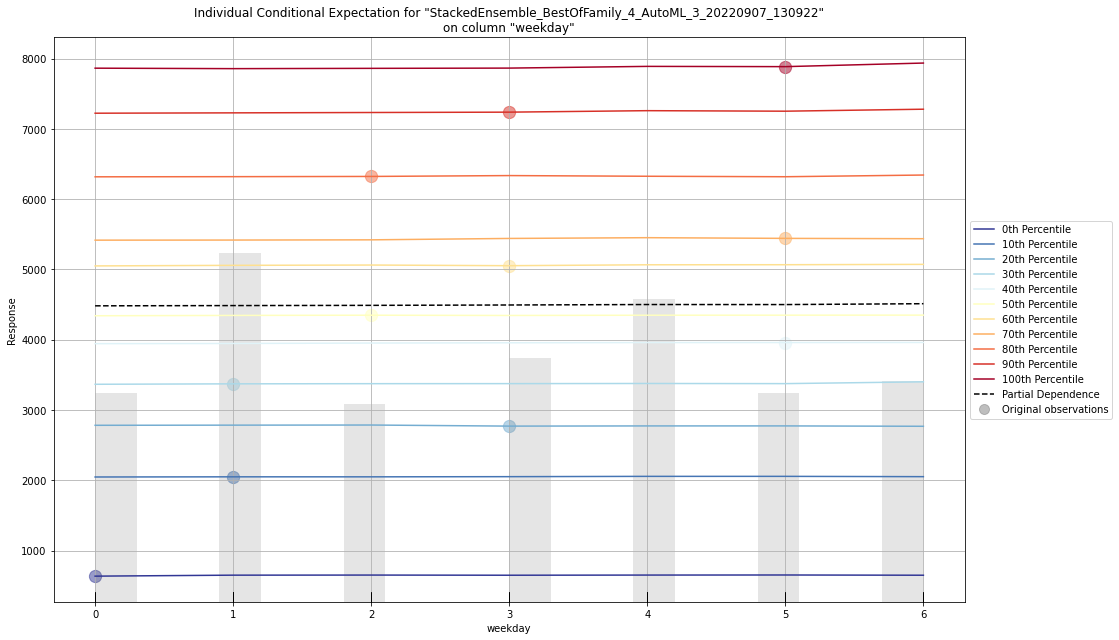

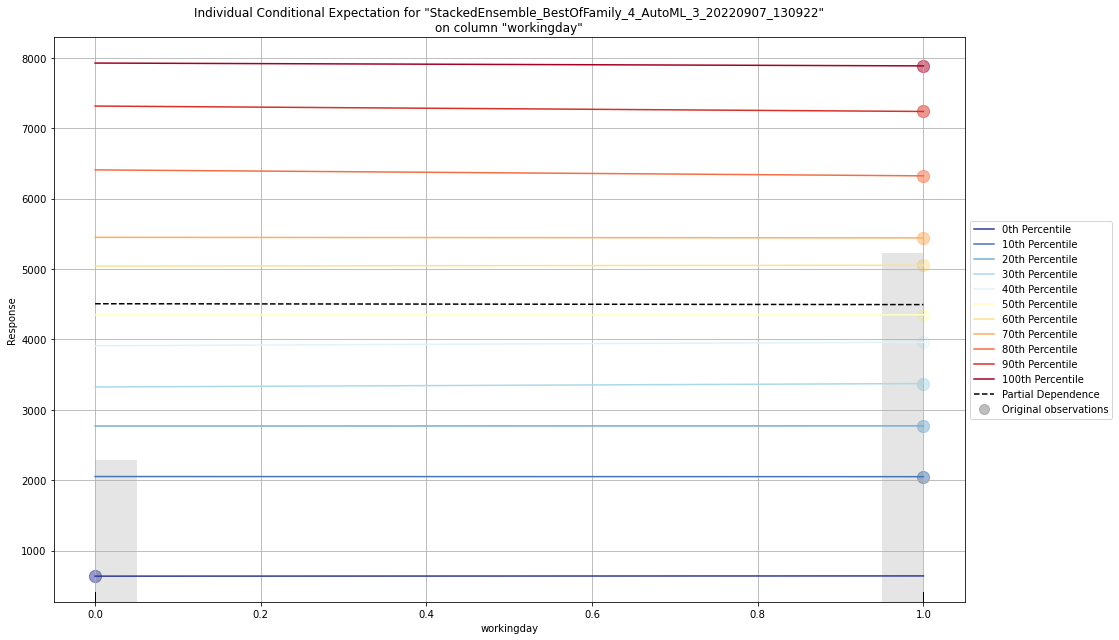

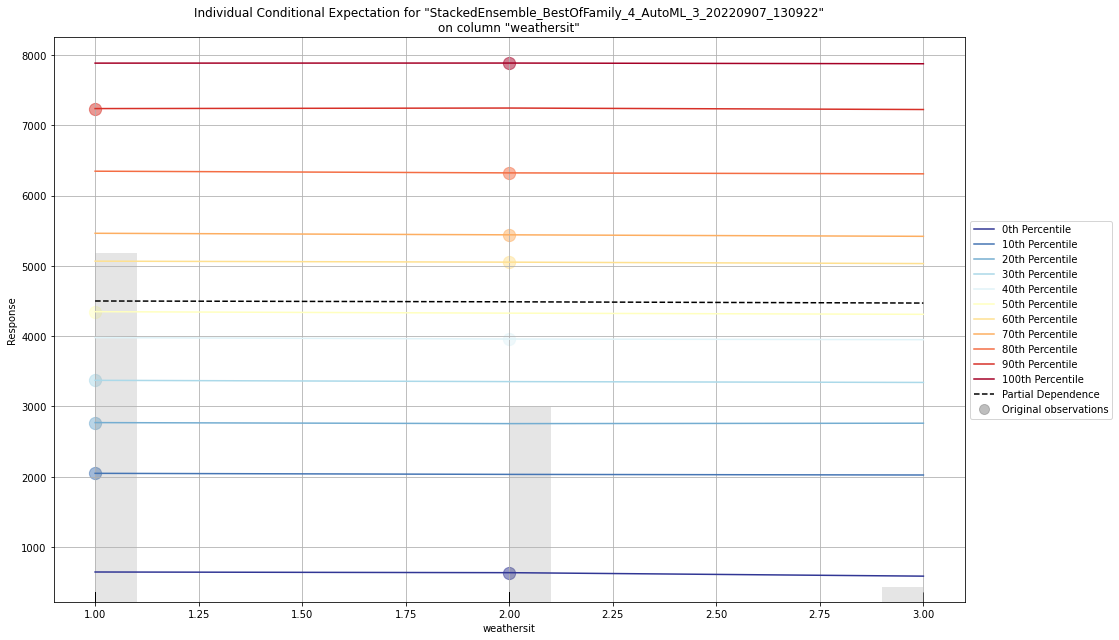

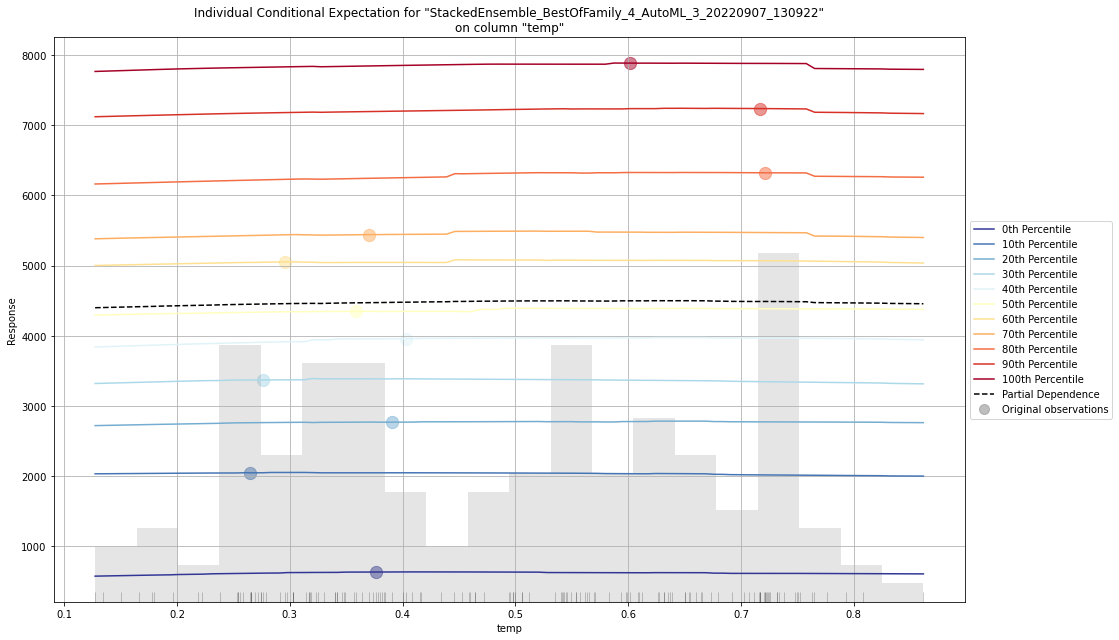

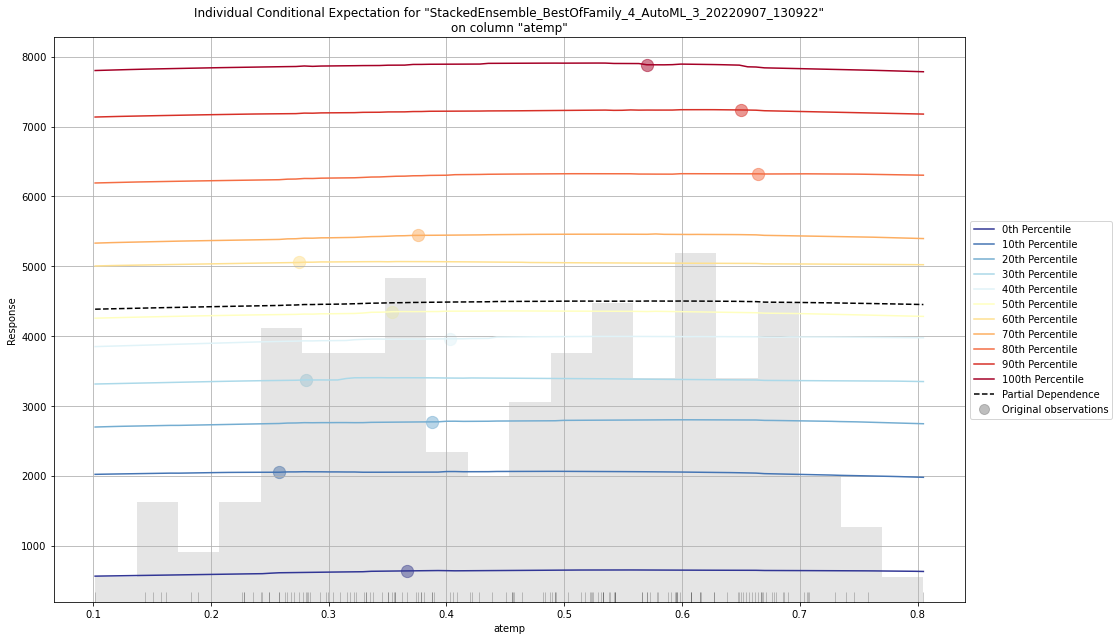

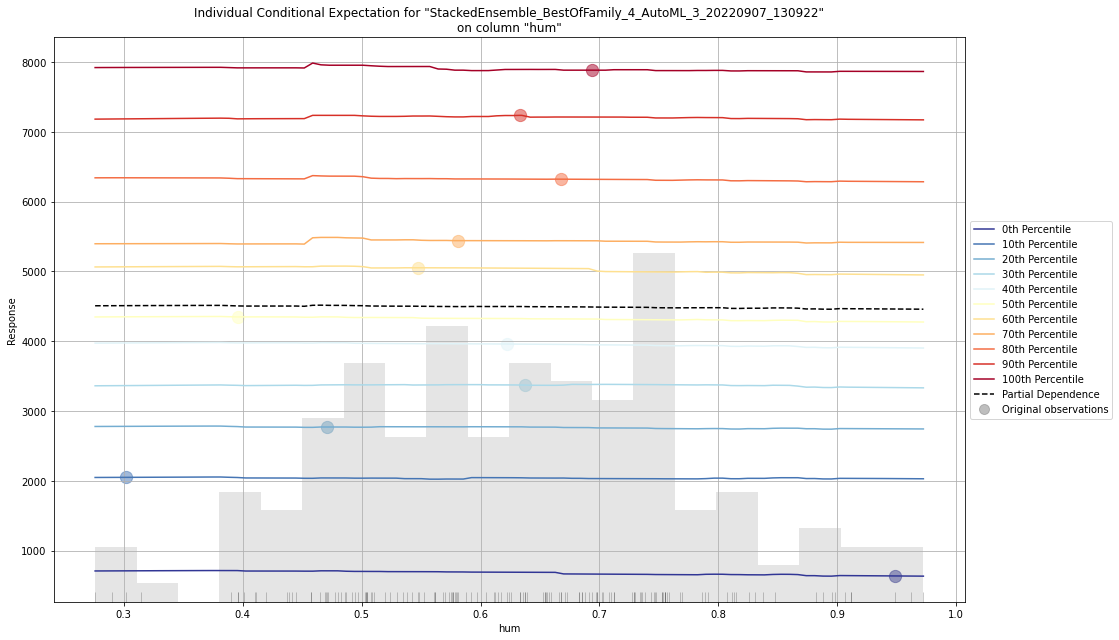

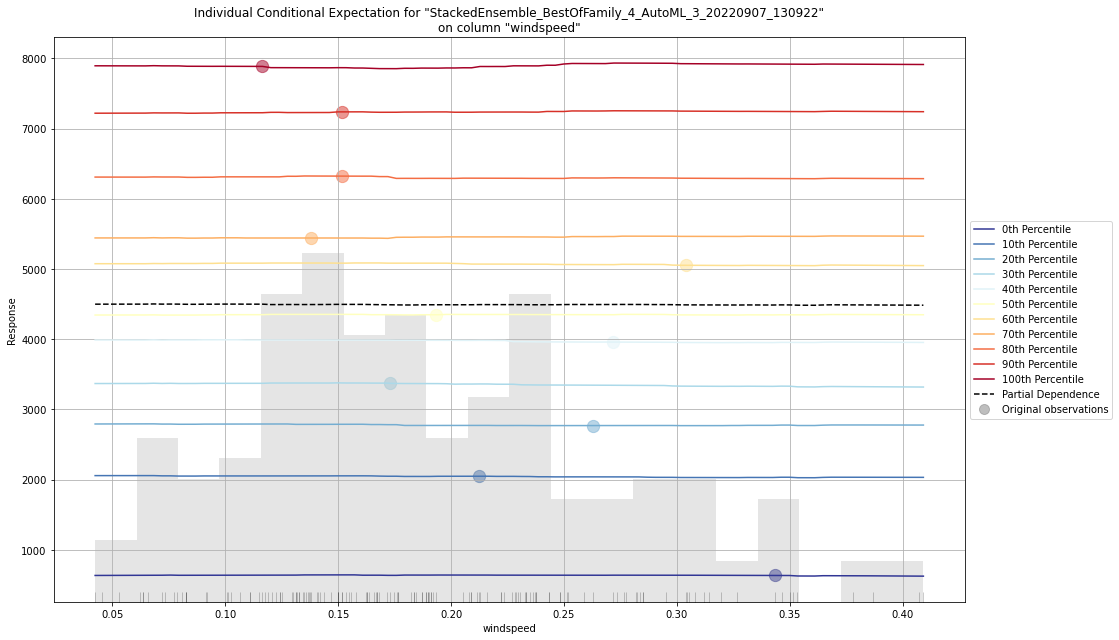

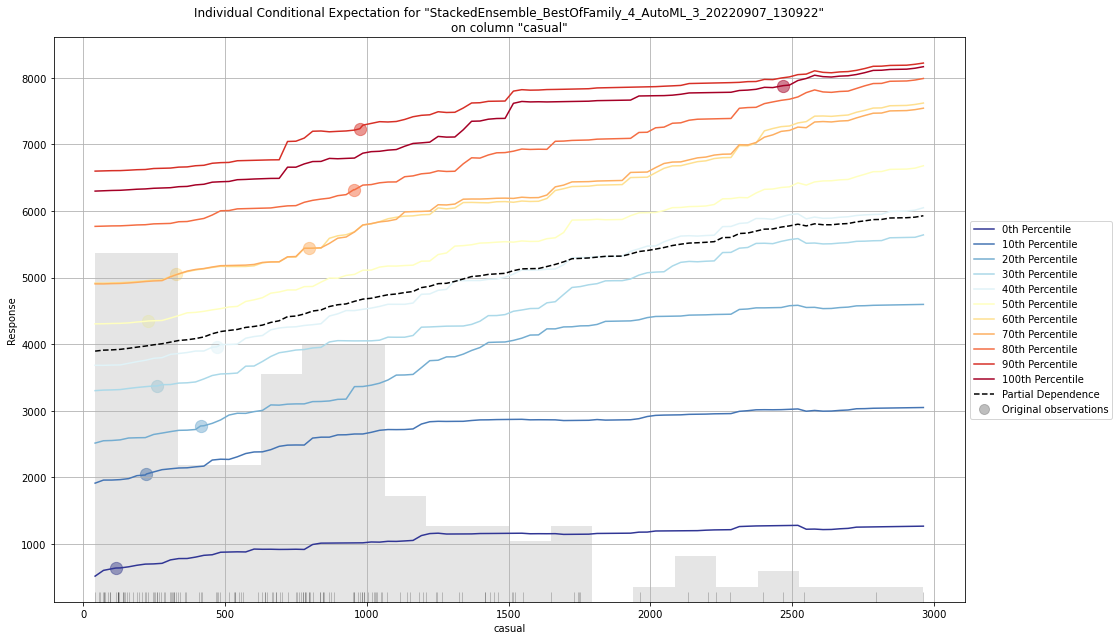

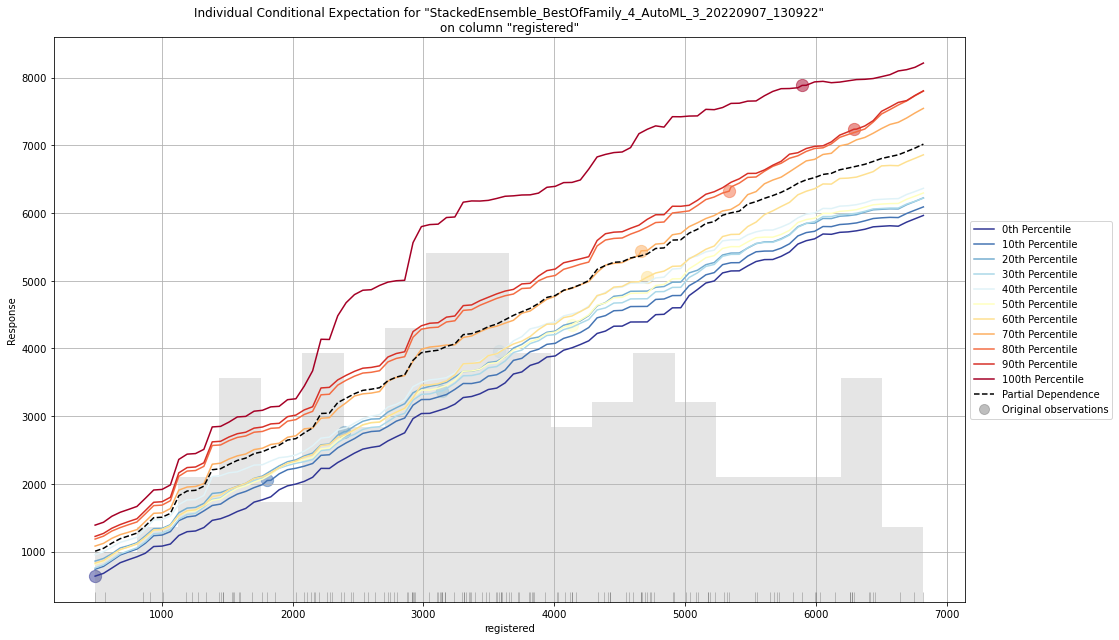

In [26]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm1 = aml1.leader.explain(test_hour)

In [27]:
pred2 = aml1.predict(test_day)

pred2

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict 
 
 
 1340.39 
 1321.32 
 1480.84 
 1735.76 
 1574.51 
 1141.98 
 1468.79 
 2112.92 
 636.315 
 1995.98